In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

In [2]:
class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, img_dim),
            nn.LeakyReLU(0.1),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.gen(x)

In [3]:
class Discriminator(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128,1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.disc(x)

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 1e-4
z_dim = 64
image_dim = 28*28*1
batch_size = 128
num_epochs = 100

In [5]:
device

'cuda'

In [6]:
disc = Discriminator(image_dim).to(device)
gen = Generator(z_dim, image_dim).to(device)
fixed_noise = torch.randn((batch_size, z_dim)).to(device)
transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)


In [7]:
dataset = datasets.MNIST(root="dataset/", transform = transforms, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6647666.78it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 469229.02it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4431249.77it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2725397.53it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [8]:
opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()

Epoch [1/100]
Loss D 0.2819
Loss G 0.9204


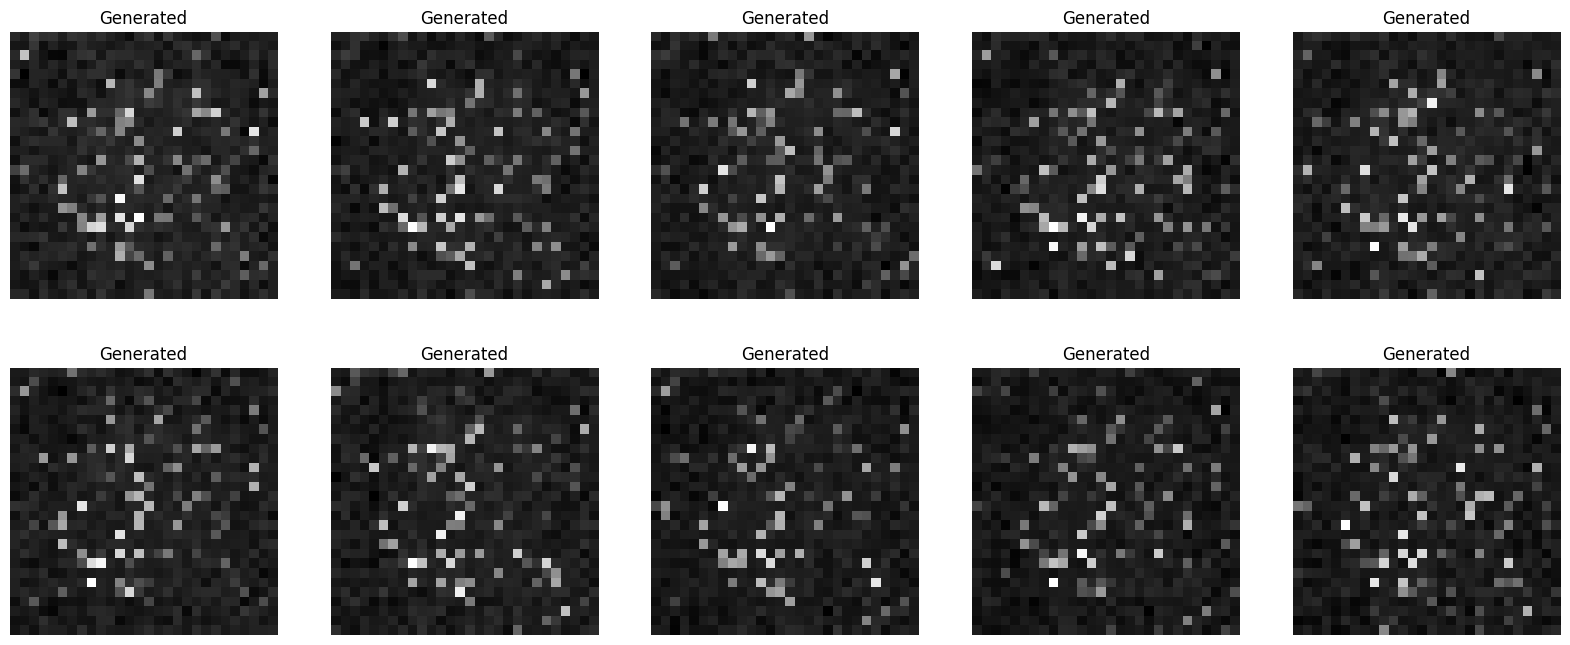

Epoch [2/100]
Loss D 0.1382
Loss G 1.5012


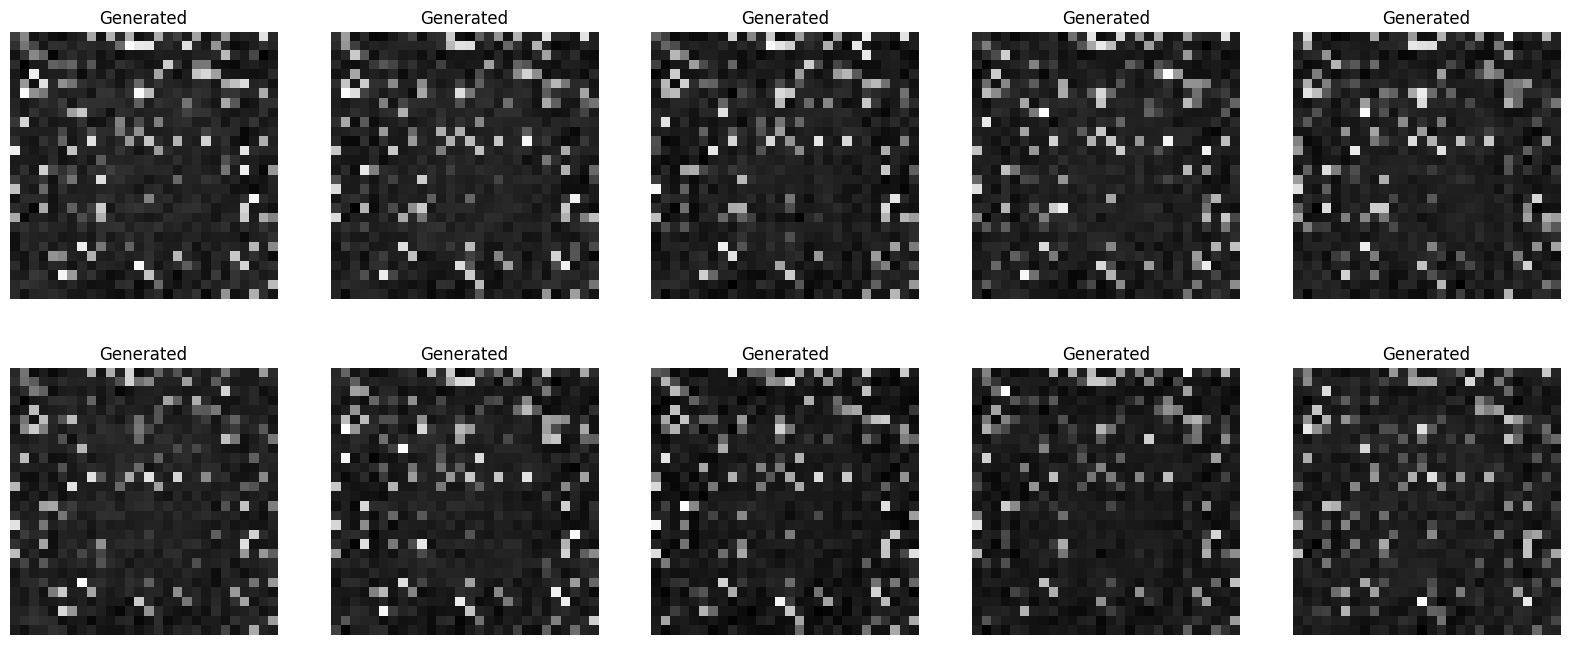

Epoch [3/100]
Loss D 0.1131
Loss G 1.6786


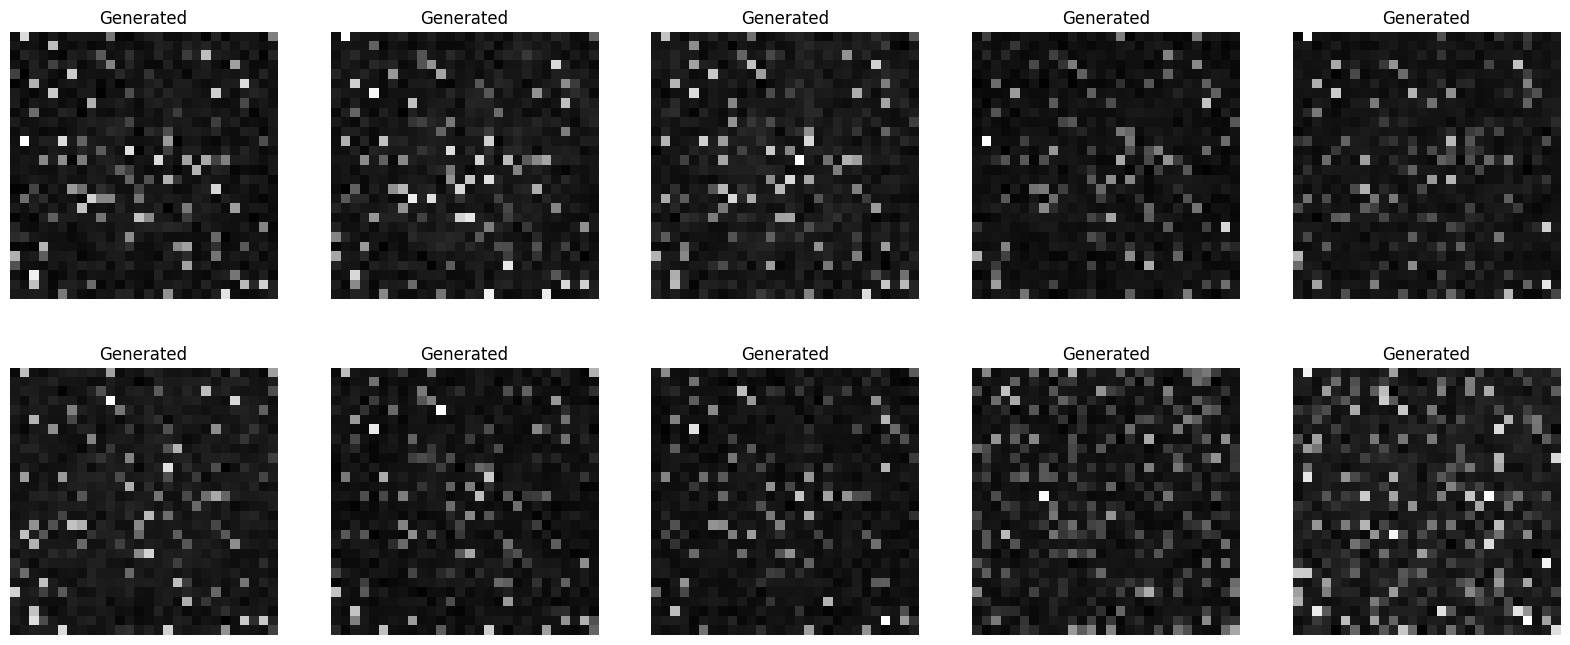

Epoch [4/100]
Loss D 0.0877
Loss G 1.9131


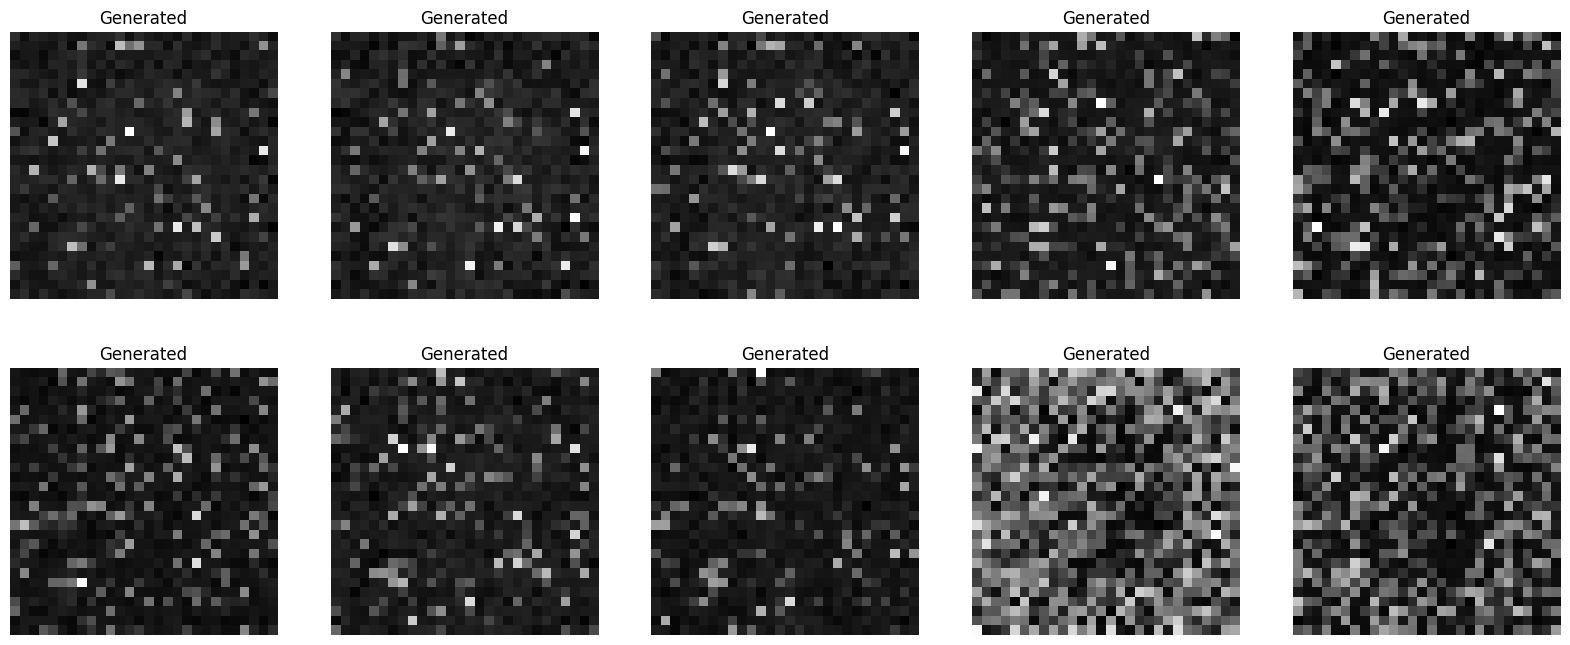

Epoch [5/100]
Loss D 0.0670
Loss G 2.3767


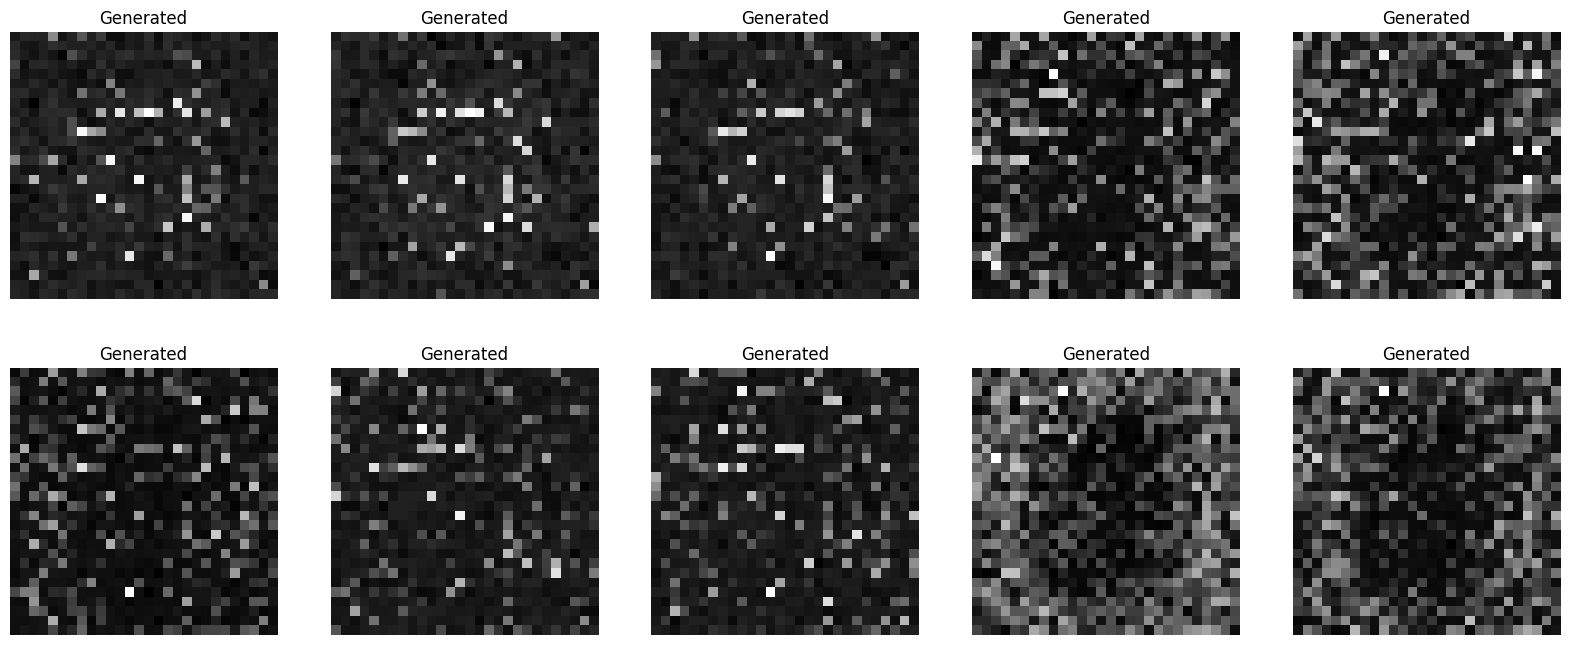

Epoch [6/100]
Loss D 0.0571
Loss G 2.7031


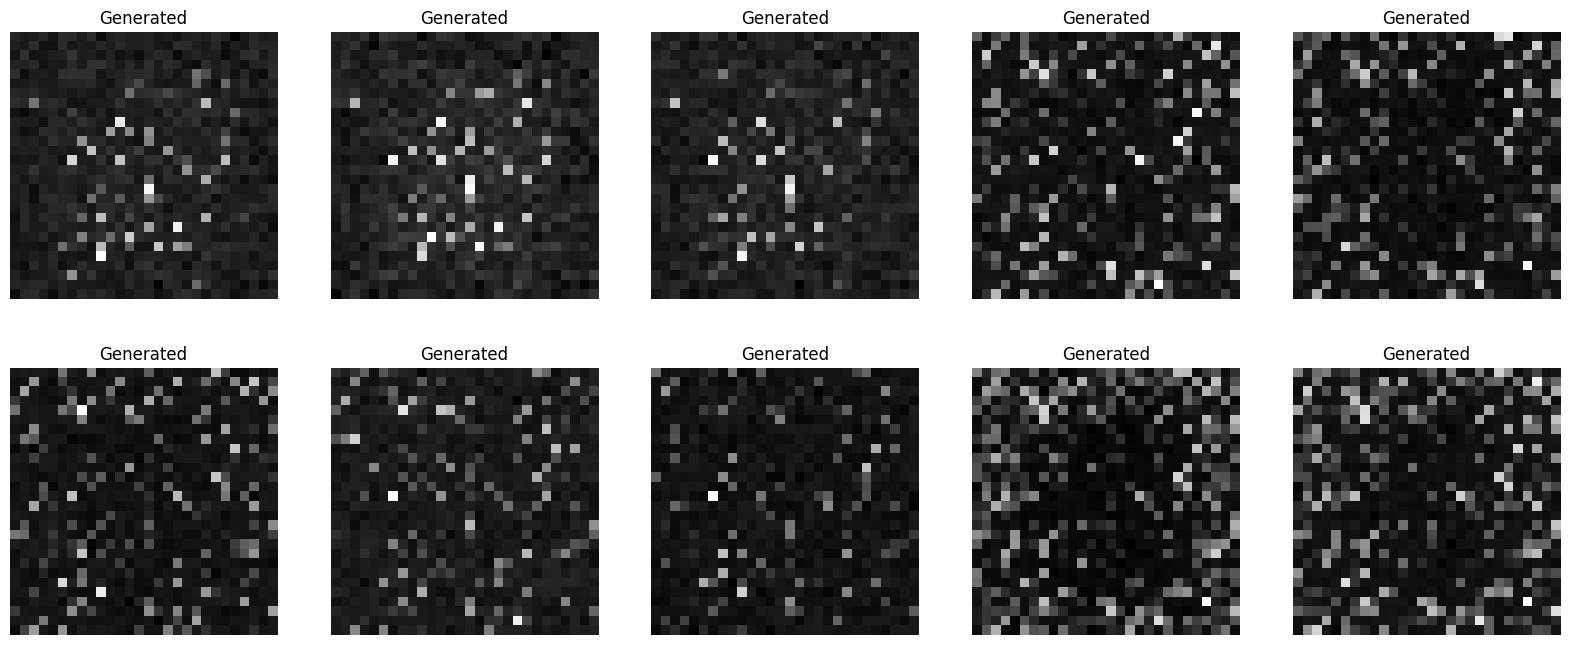

Epoch [7/100]
Loss D 0.0312
Loss G 3.4332


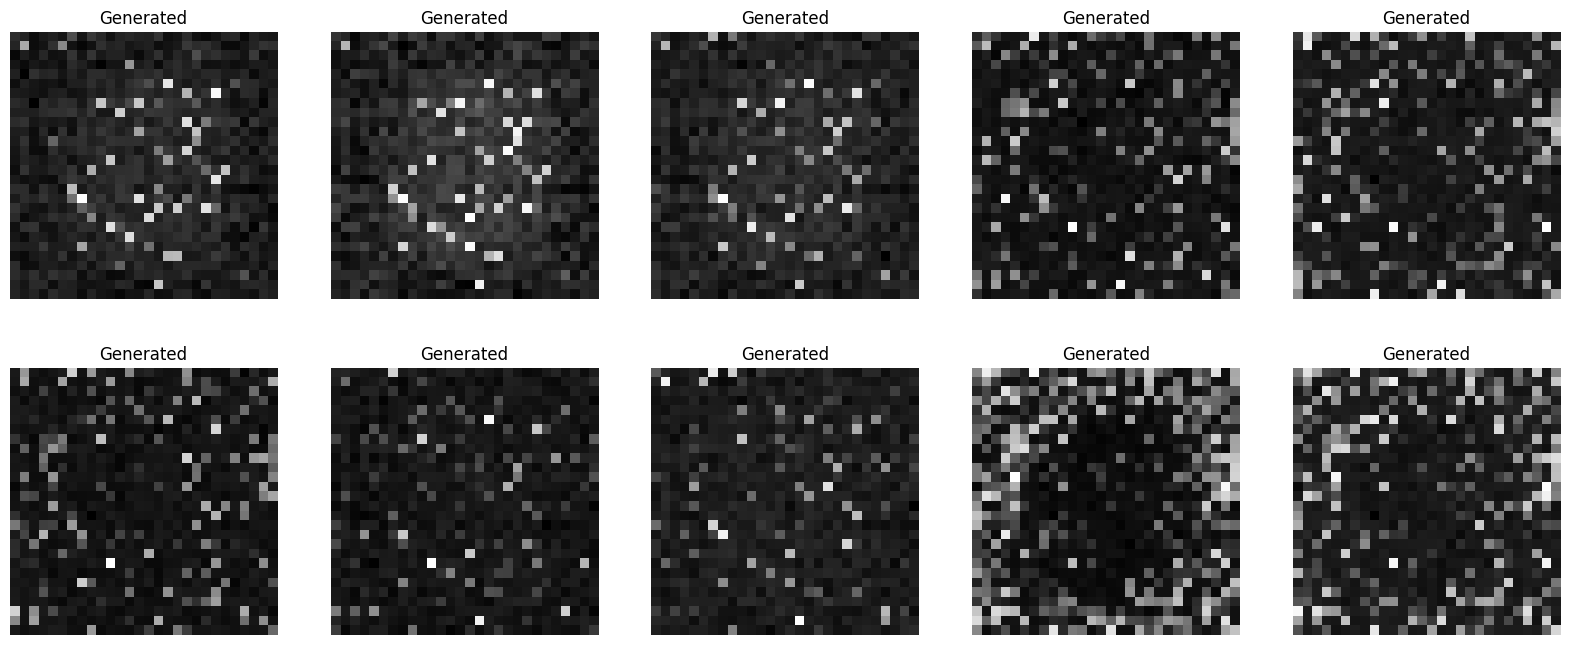

Epoch [8/100]
Loss D 0.0266
Loss G 3.8902


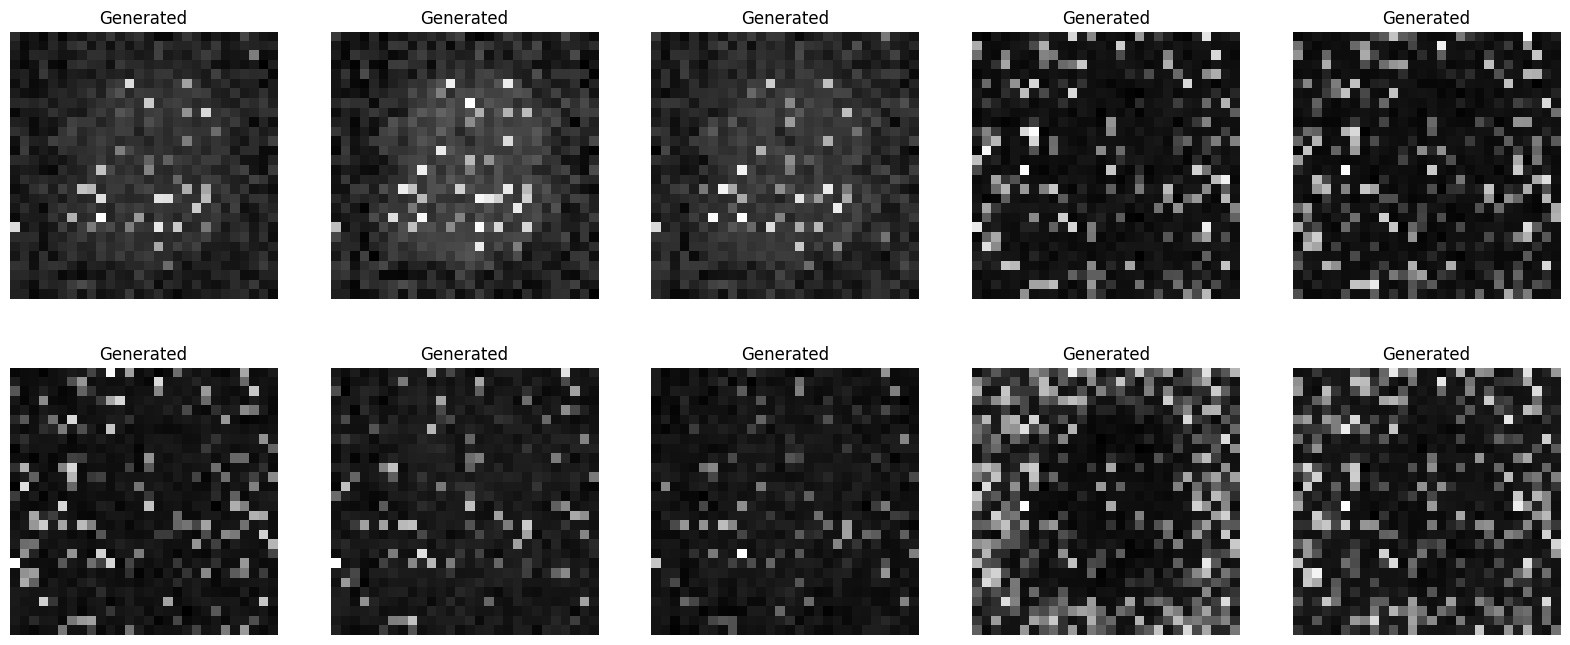

Epoch [9/100]
Loss D 0.0251
Loss G 4.2654


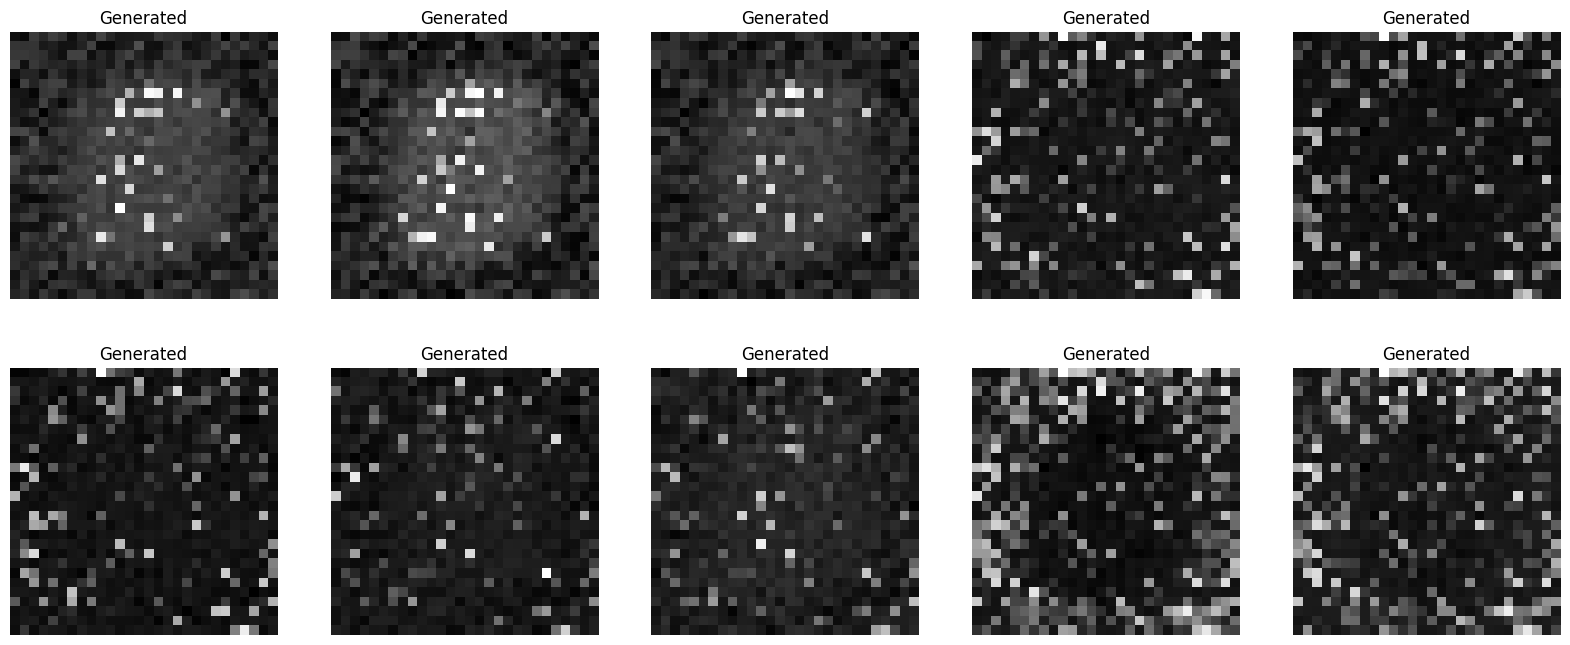

Epoch [10/100]
Loss D 0.0385
Loss G 4.2466


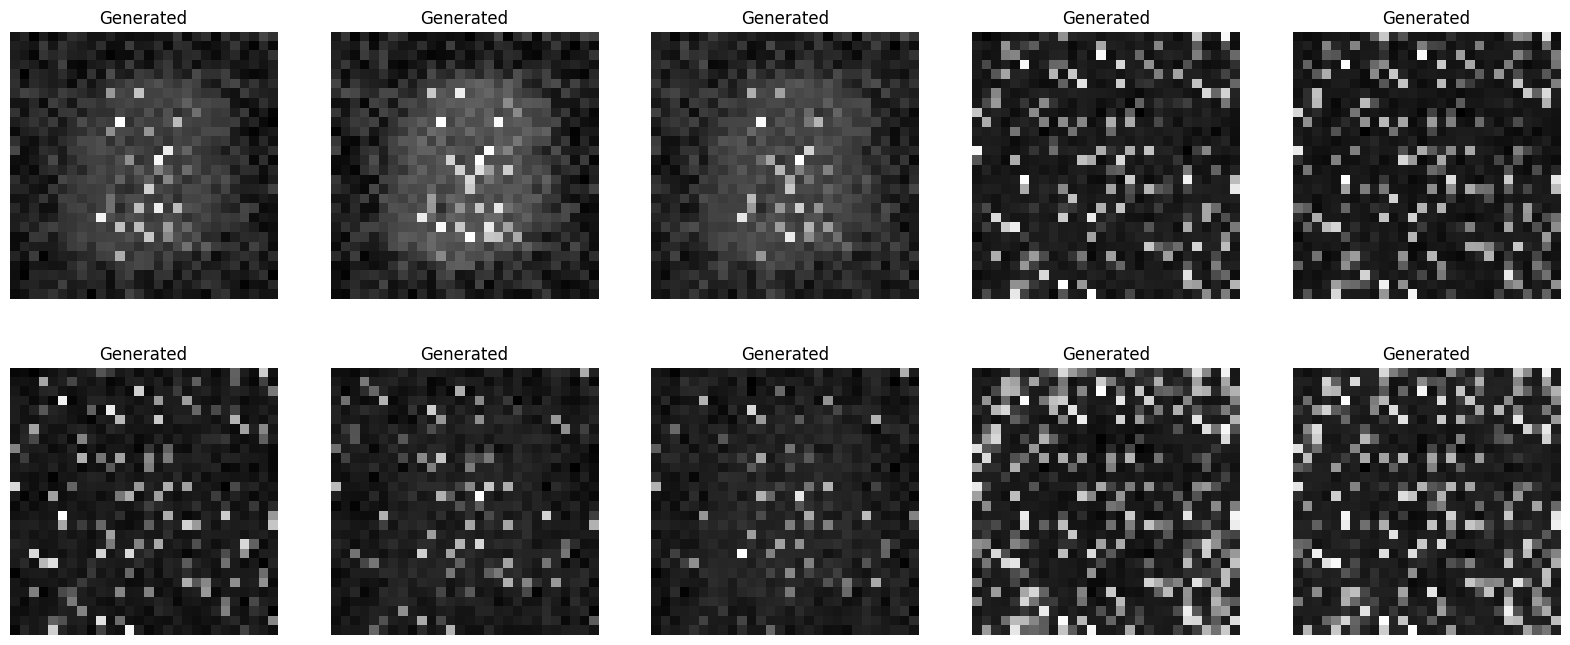

Epoch [11/100]
Loss D 0.0717
Loss G 4.4216


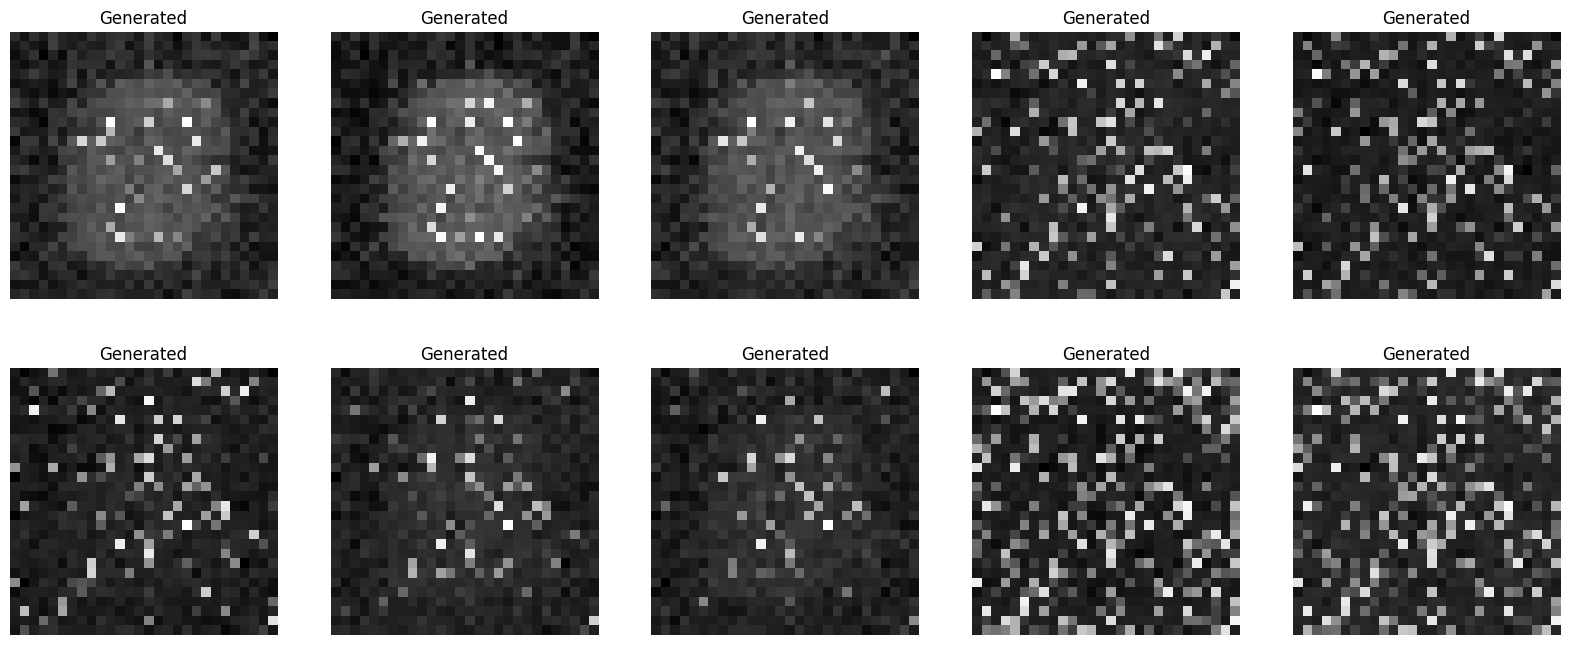

Epoch [12/100]
Loss D 0.1025
Loss G 4.2158


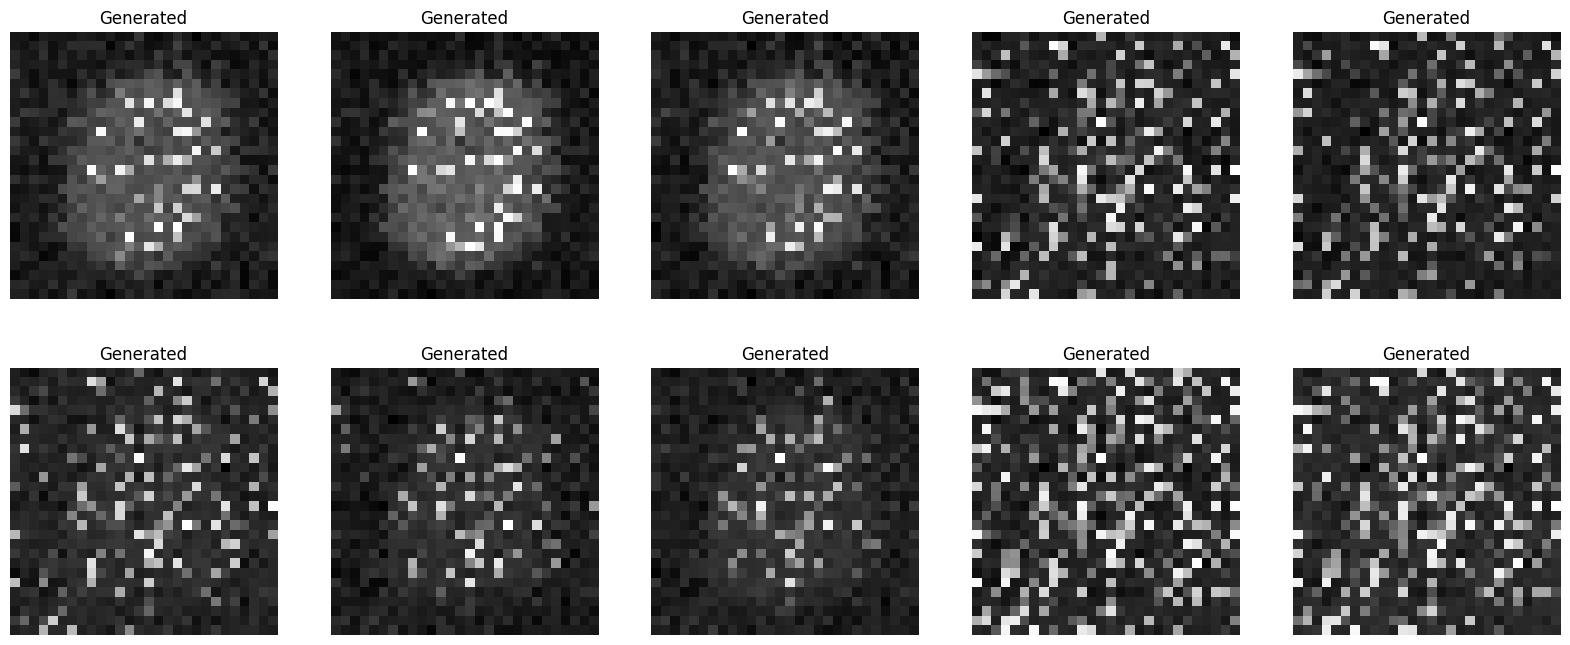

Epoch [13/100]
Loss D 0.0838
Loss G 3.9991


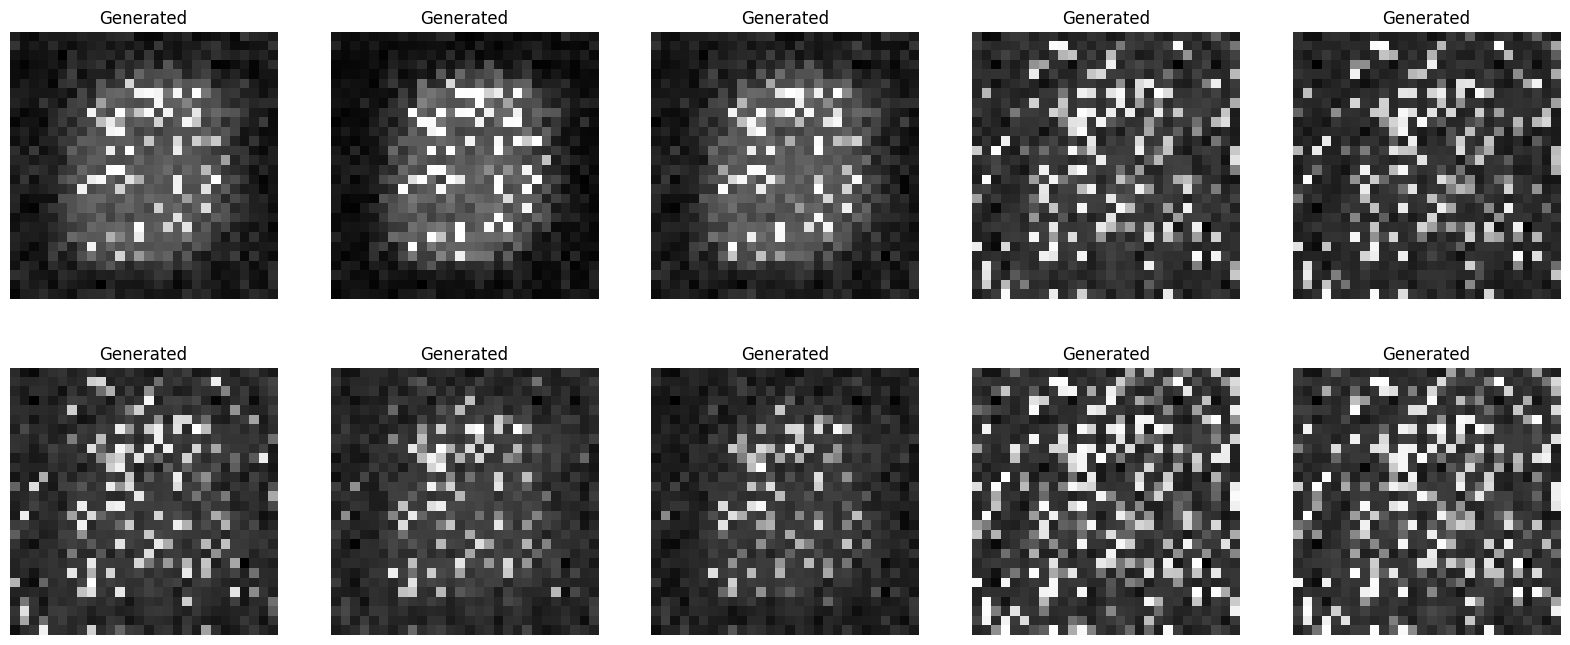

Epoch [14/100]
Loss D 0.0637
Loss G 4.8383


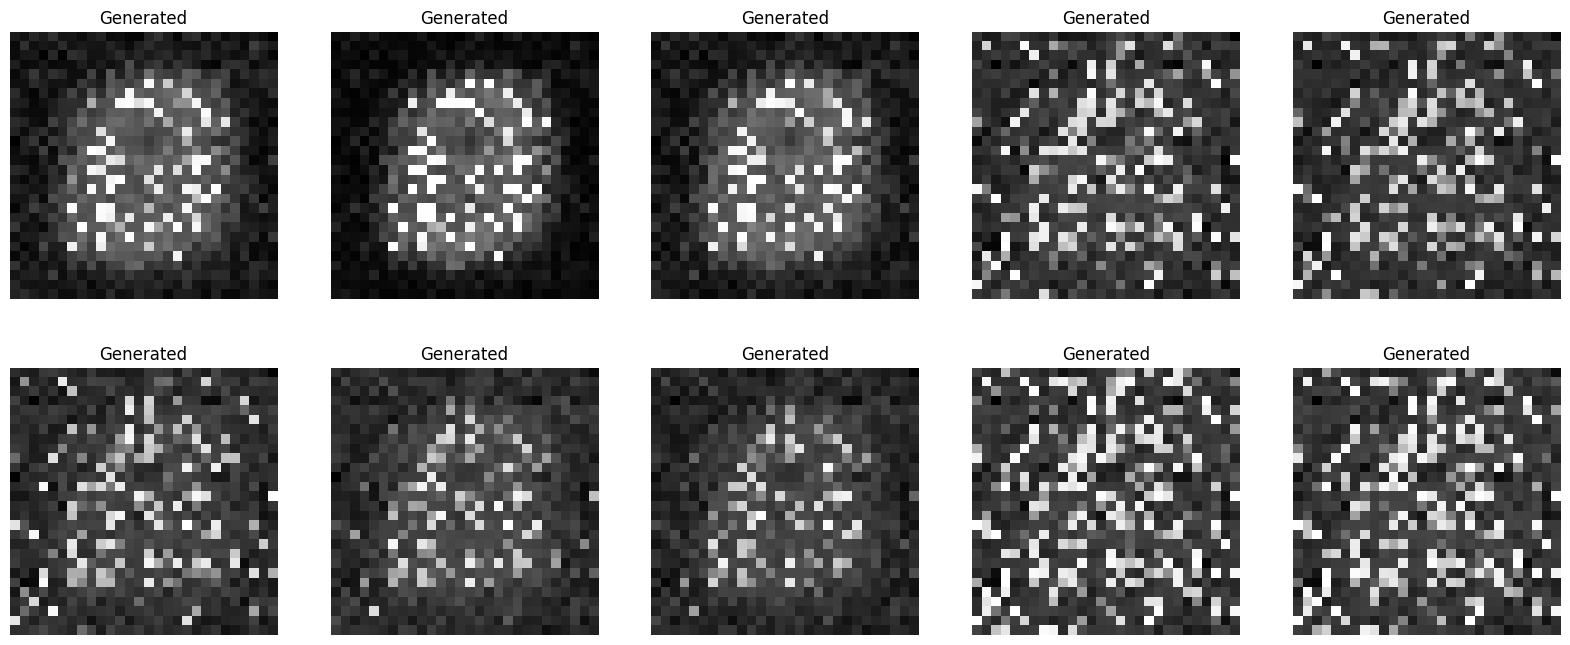

Epoch [15/100]
Loss D 0.0621
Loss G 4.6486


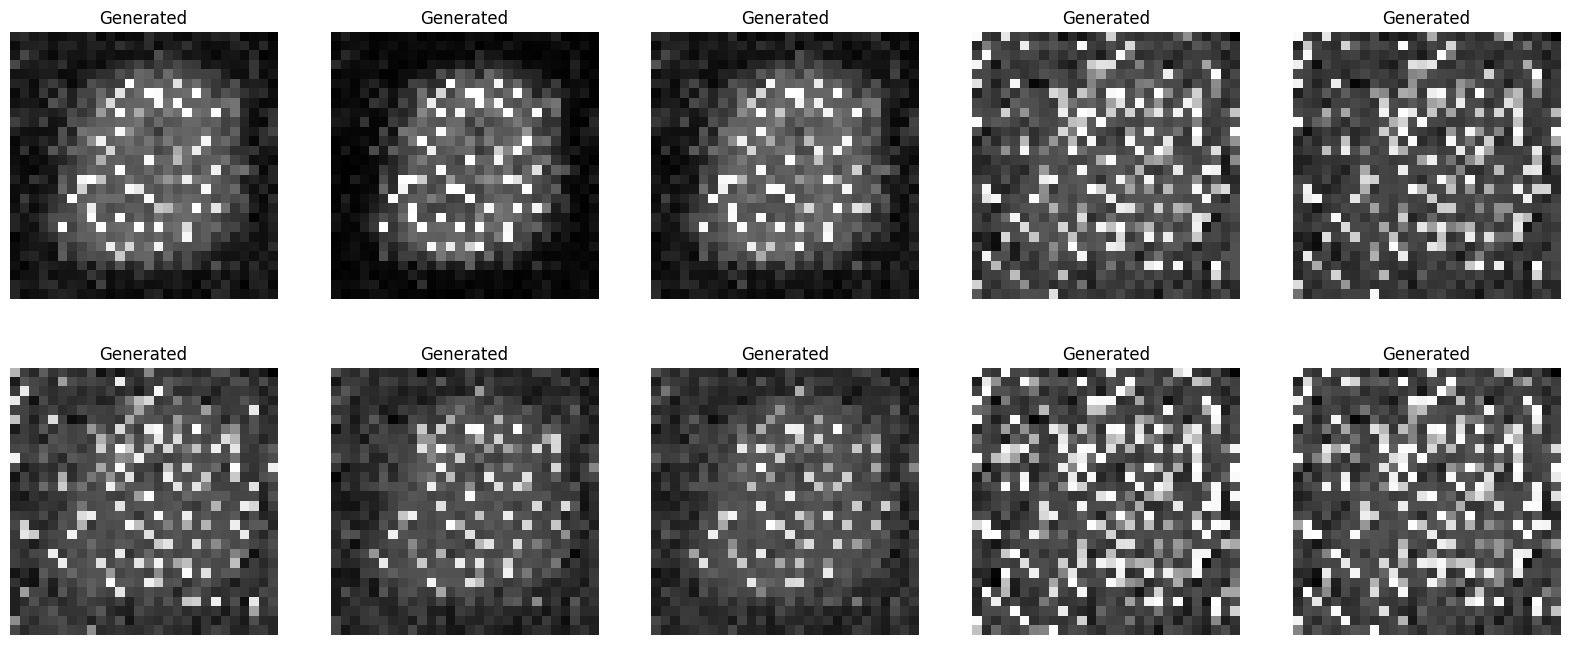

Epoch [16/100]
Loss D 0.0839
Loss G 4.8259


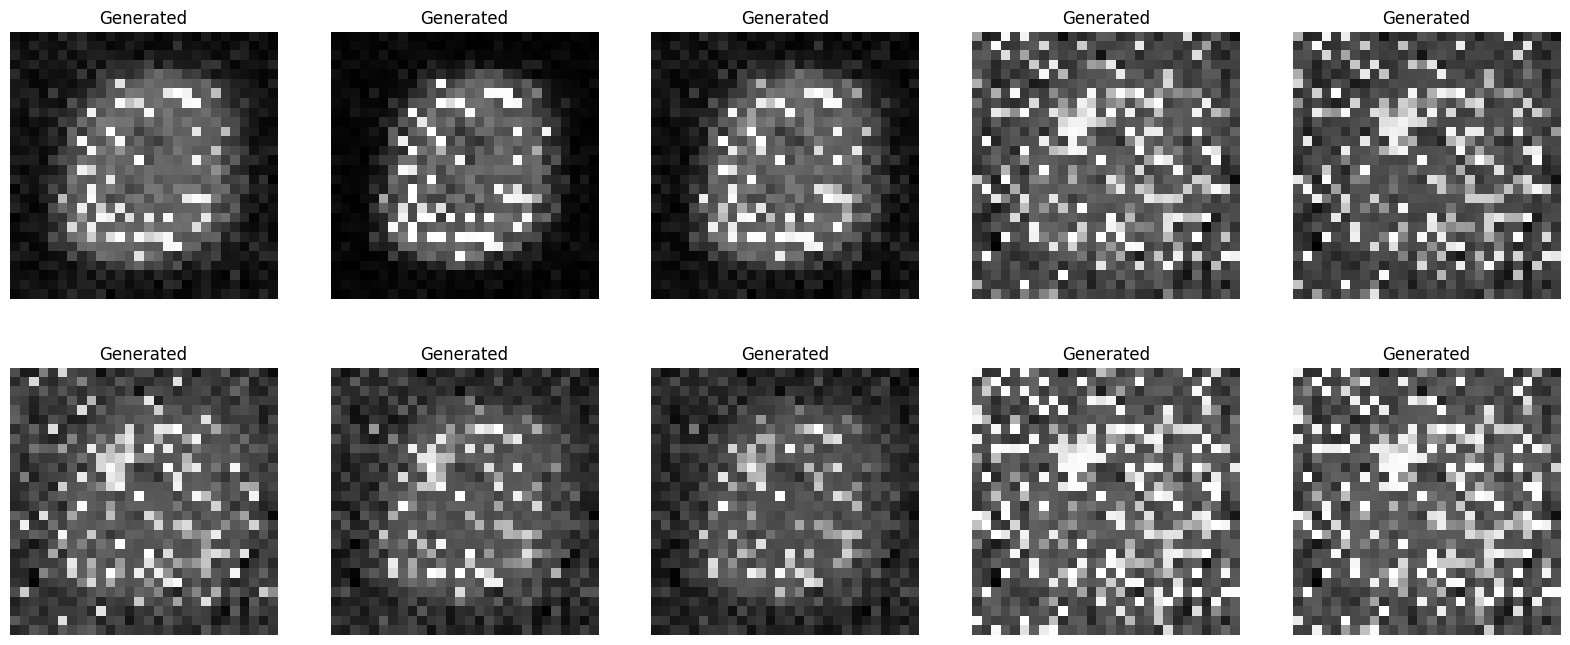

Epoch [17/100]
Loss D 0.1154
Loss G 3.7576


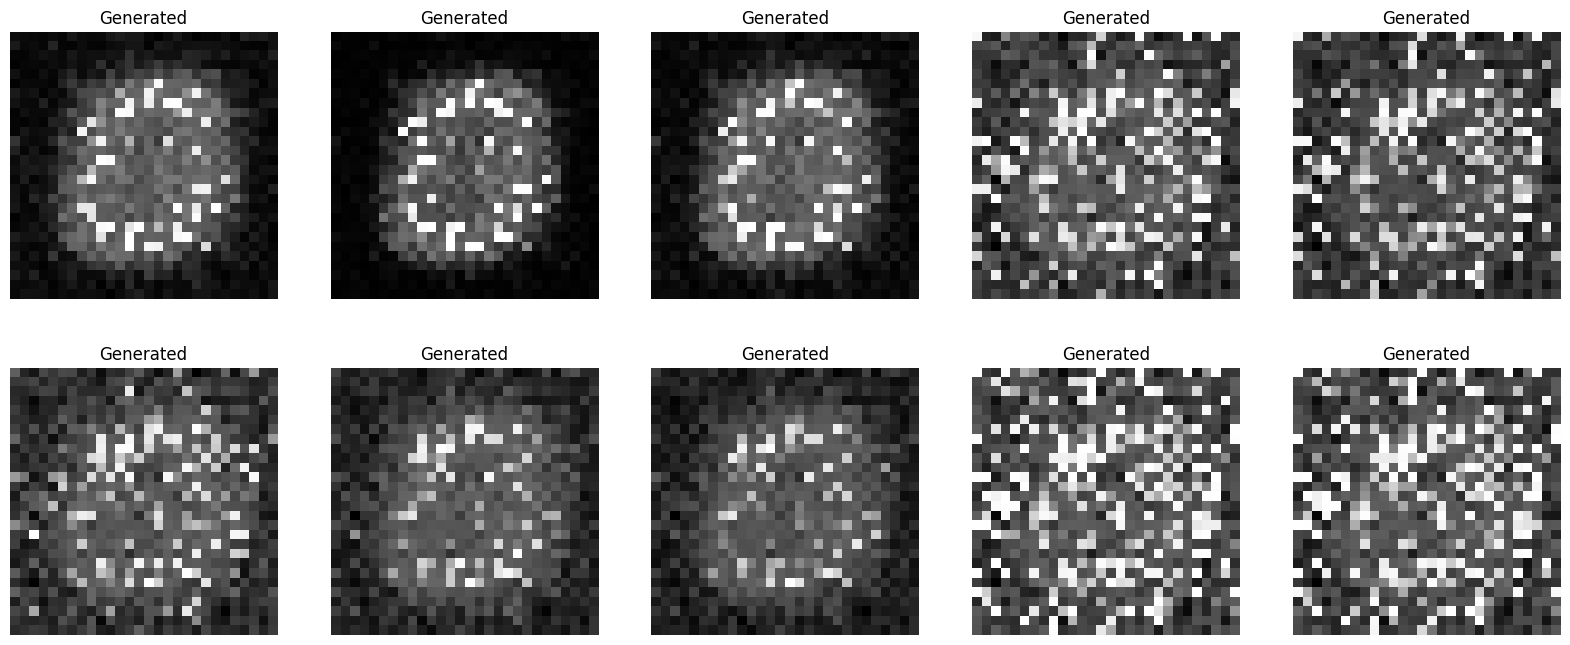

Epoch [18/100]
Loss D 0.0536
Loss G 3.8975


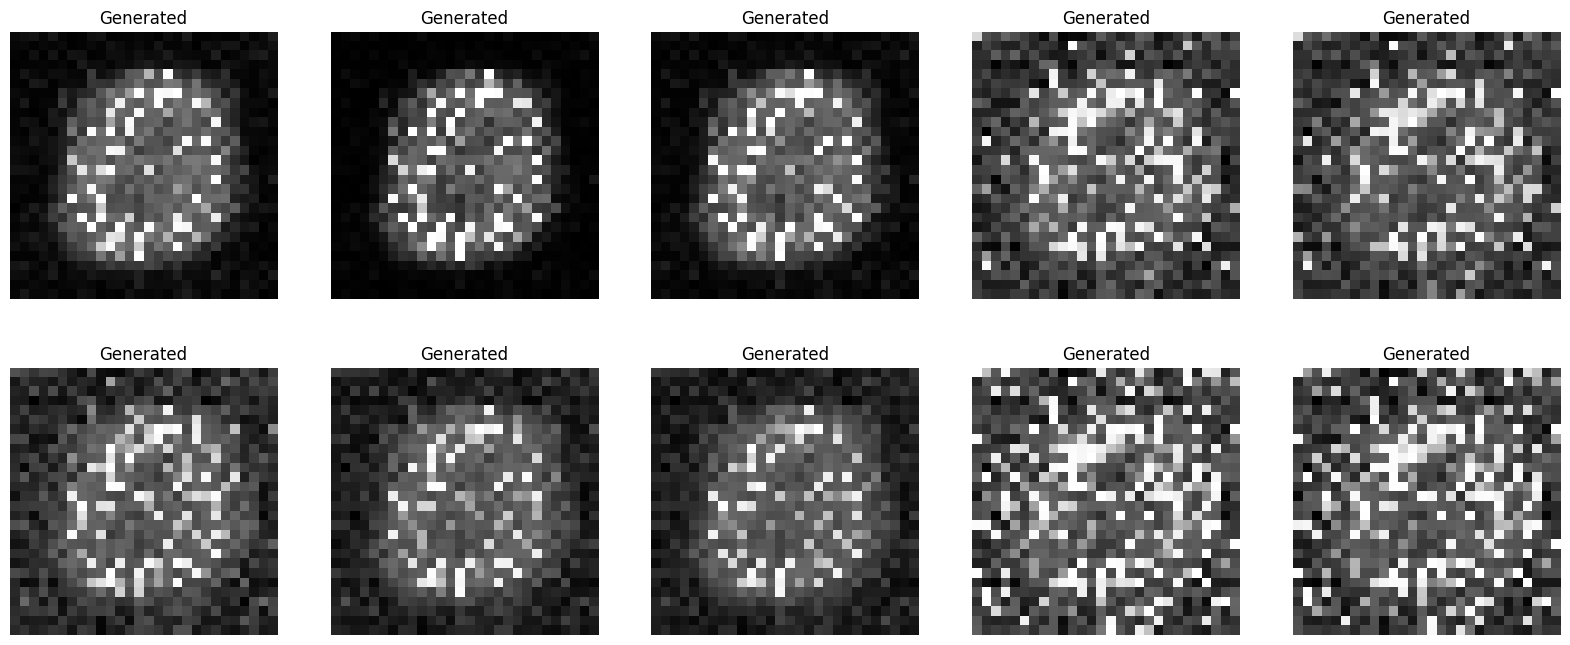

Epoch [19/100]
Loss D 0.1142
Loss G 4.3902


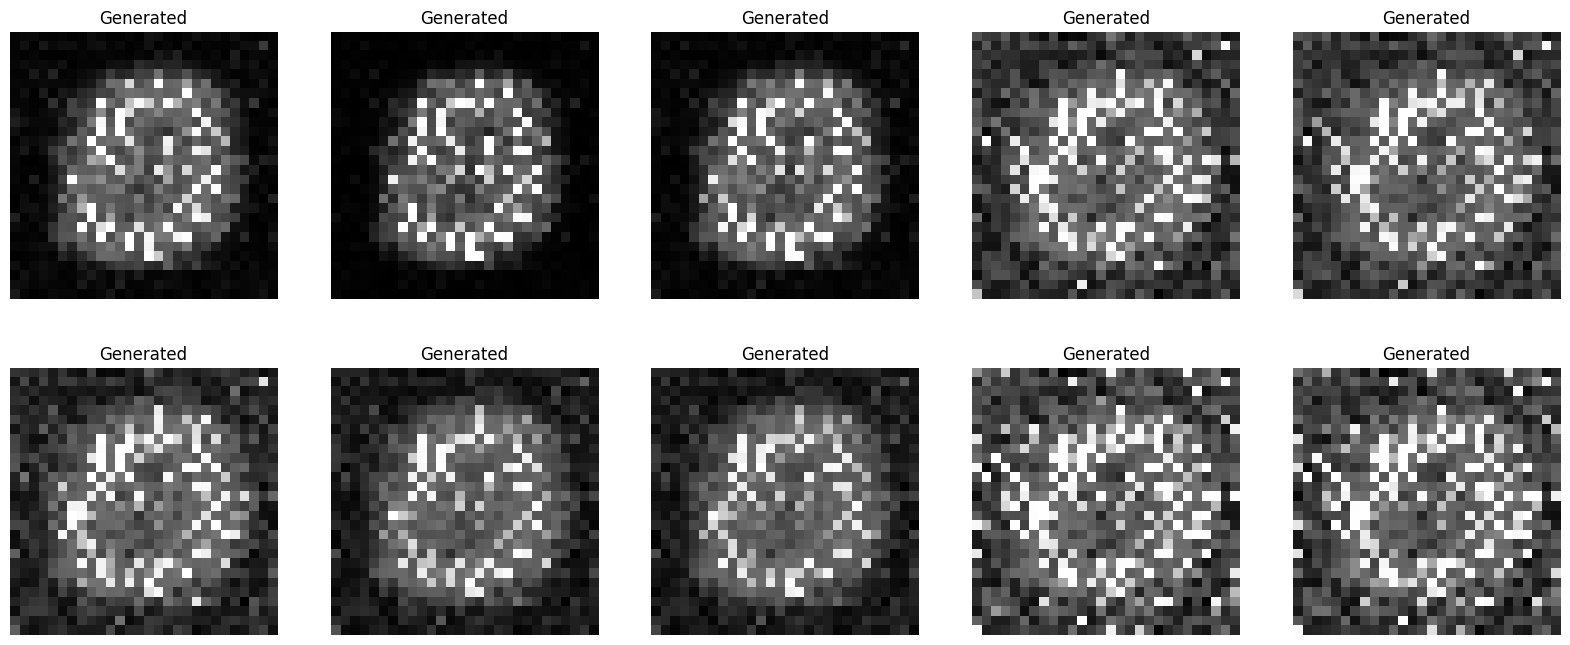

Epoch [20/100]
Loss D 0.0534
Loss G 3.2552


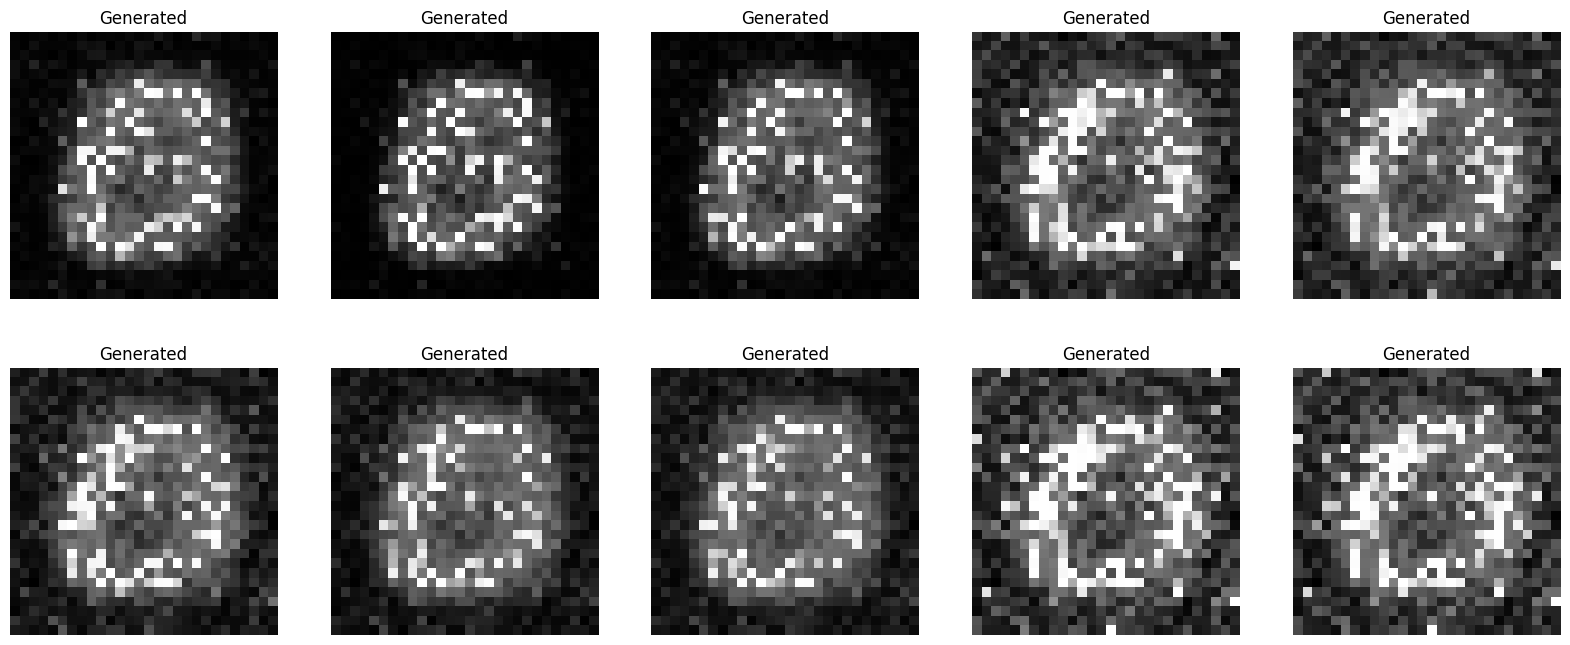

Epoch [21/100]
Loss D 0.0856
Loss G 3.3679


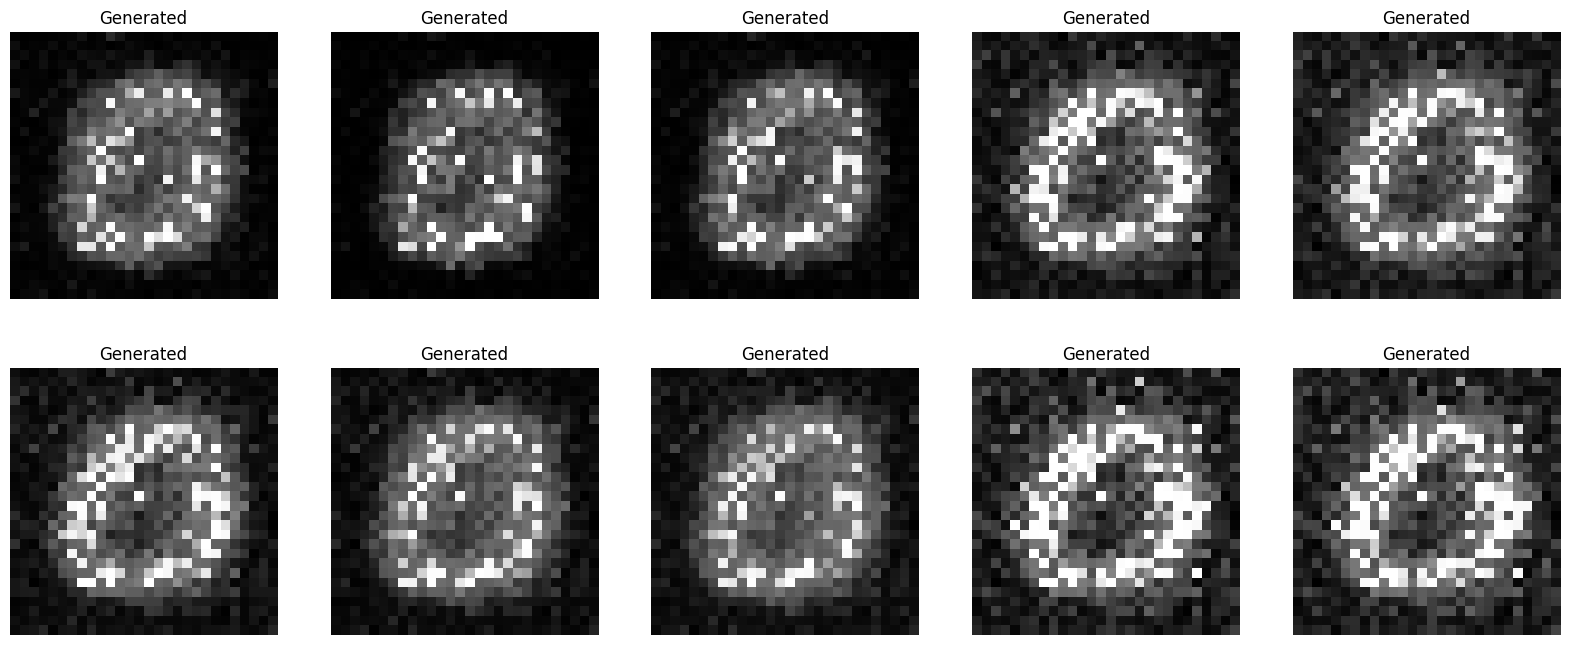

Epoch [22/100]
Loss D 0.1322
Loss G 3.2407


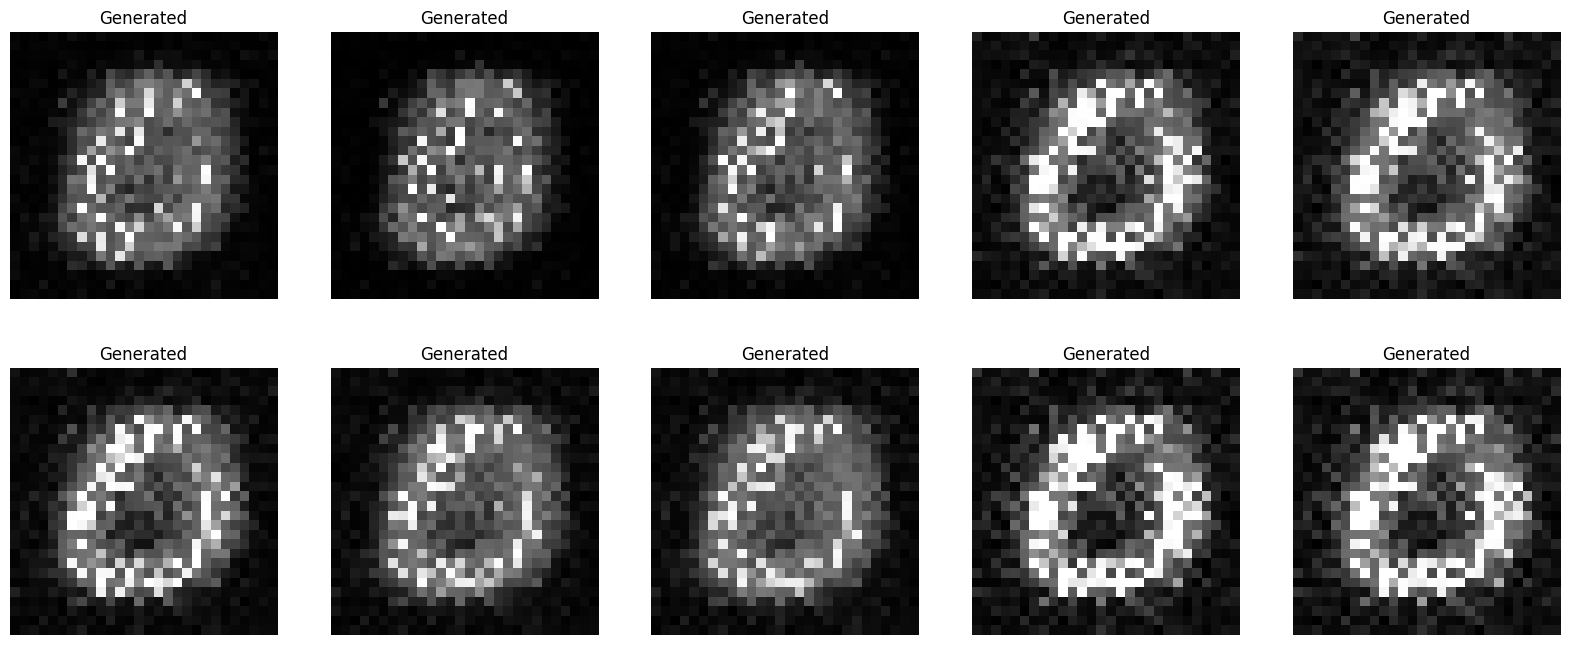

Epoch [23/100]
Loss D 0.1722
Loss G 2.2478


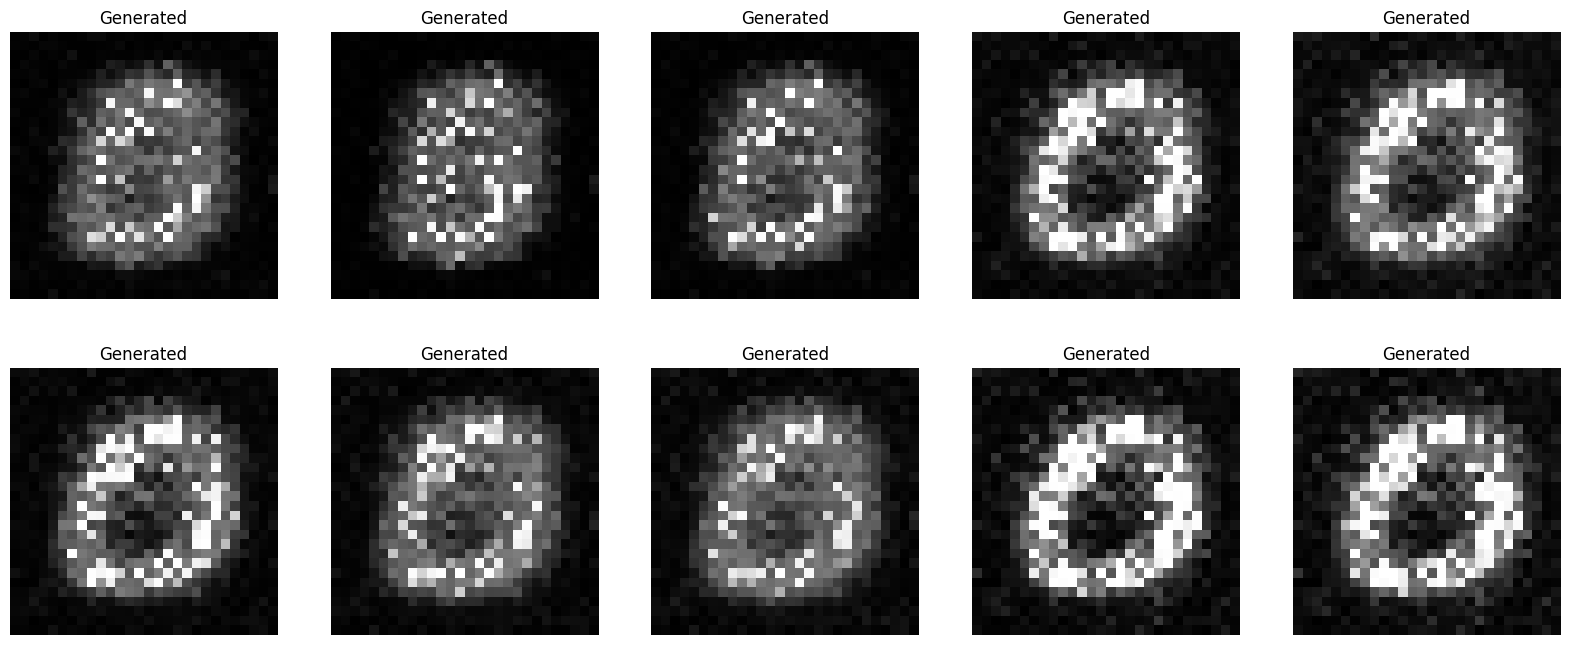

Epoch [24/100]
Loss D 0.2592
Loss G 2.0230


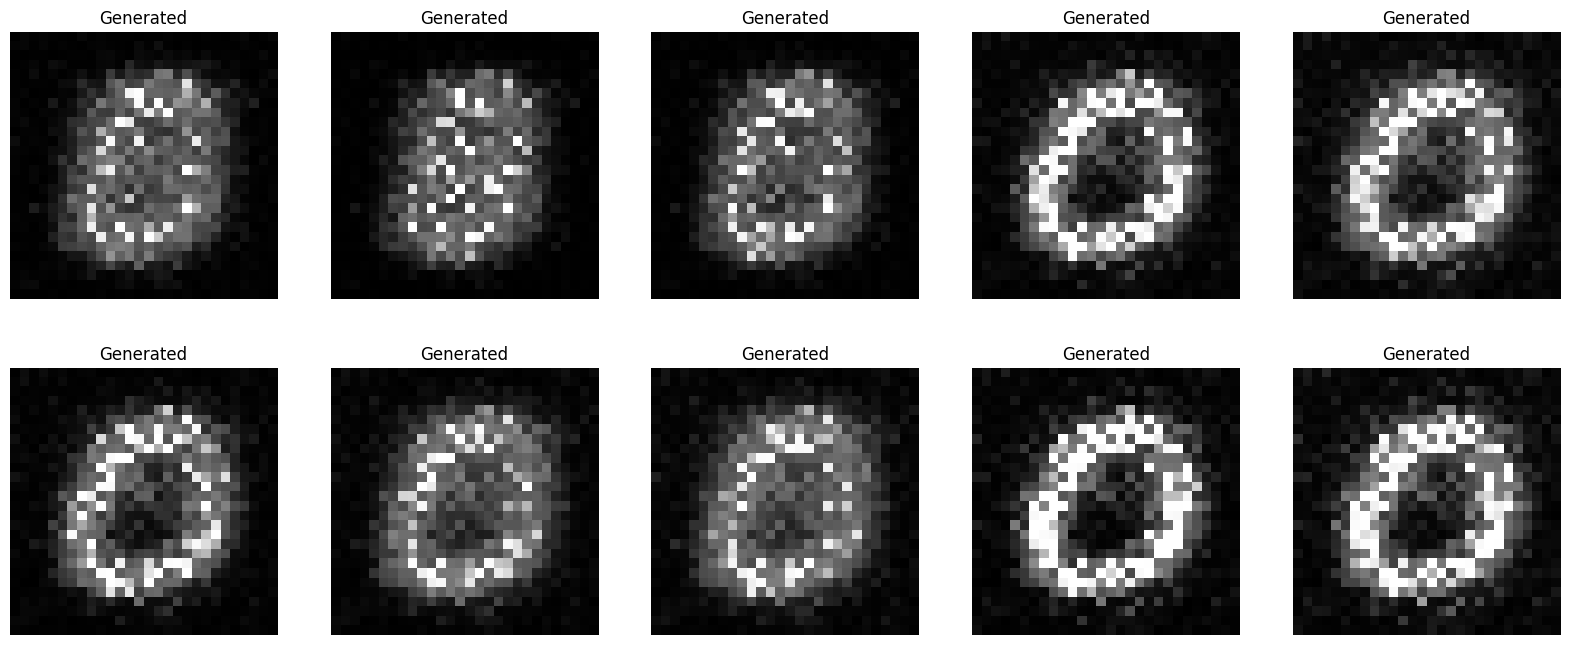

Epoch [25/100]
Loss D 0.2589
Loss G 2.8952


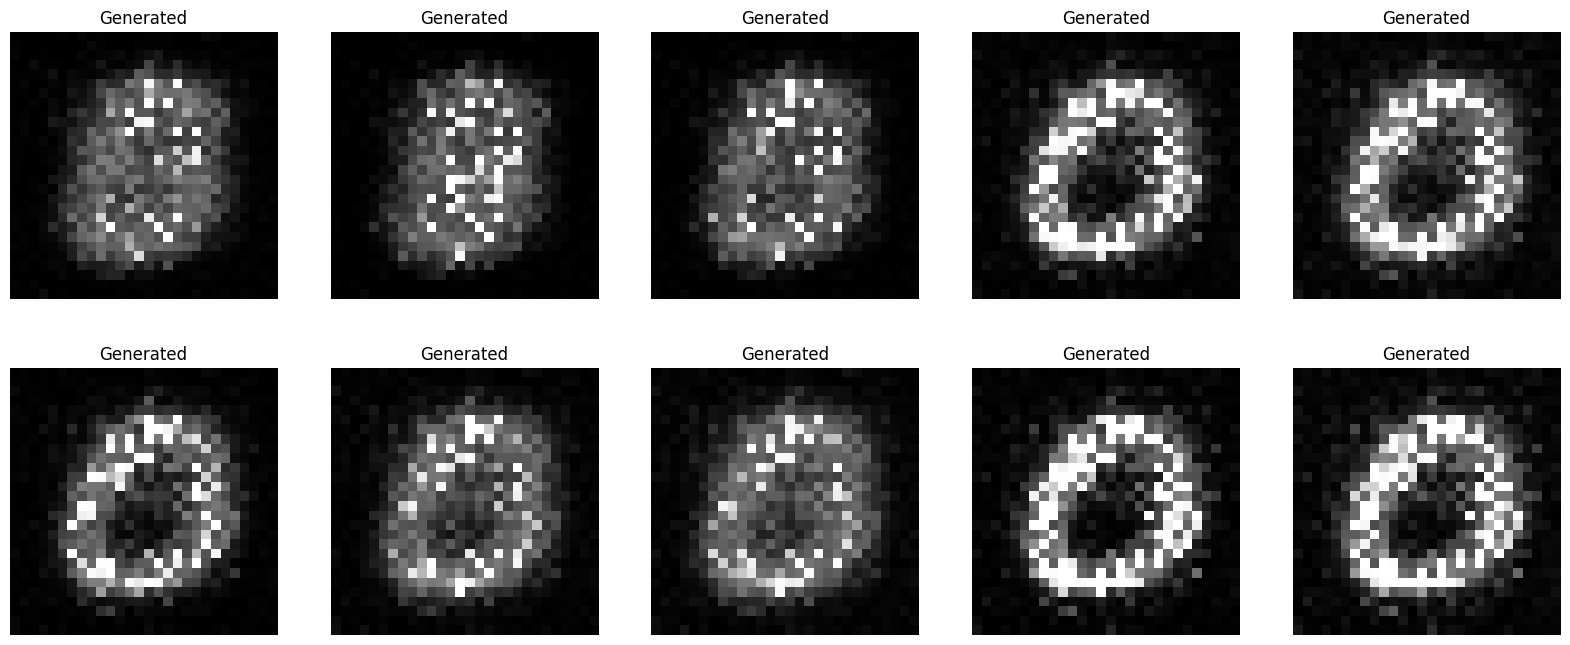

Epoch [26/100]
Loss D 0.2732
Loss G 2.3519


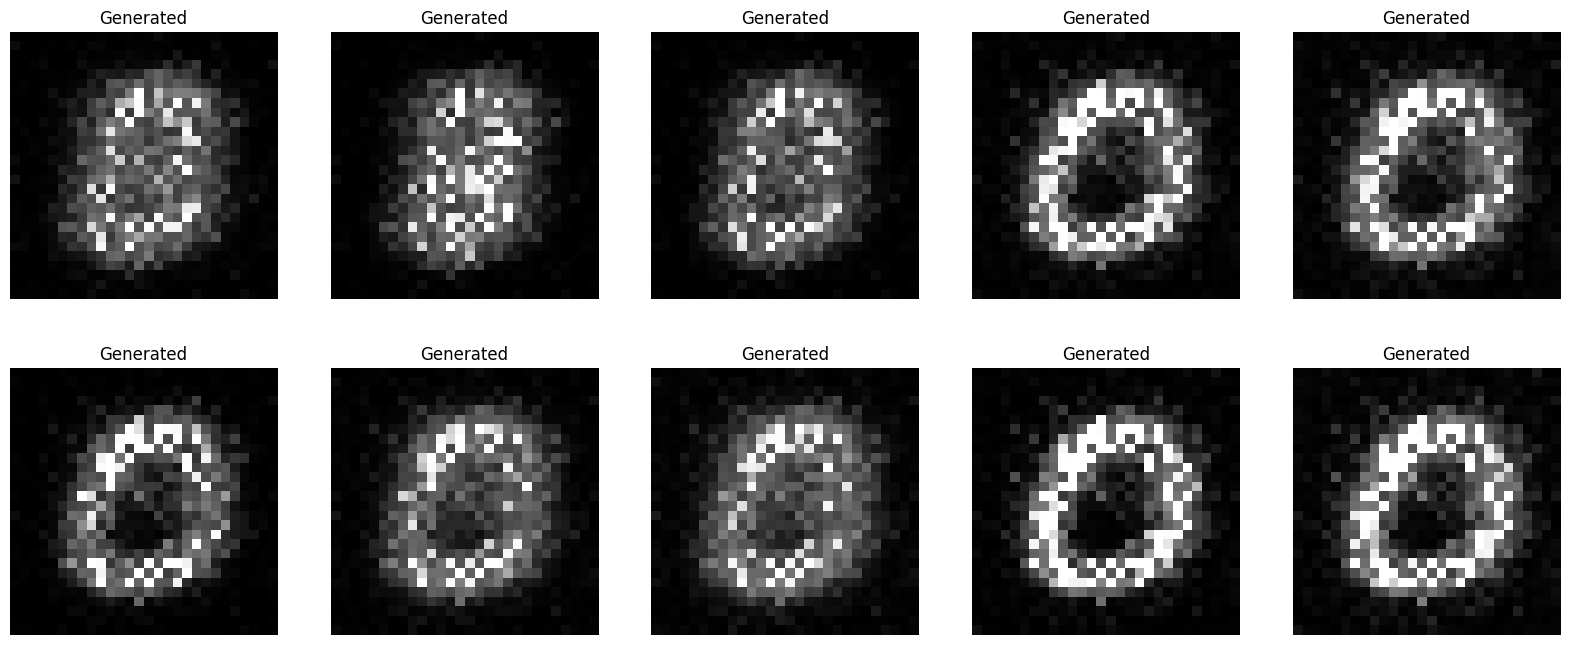

Epoch [27/100]
Loss D 0.1475
Loss G 2.4286


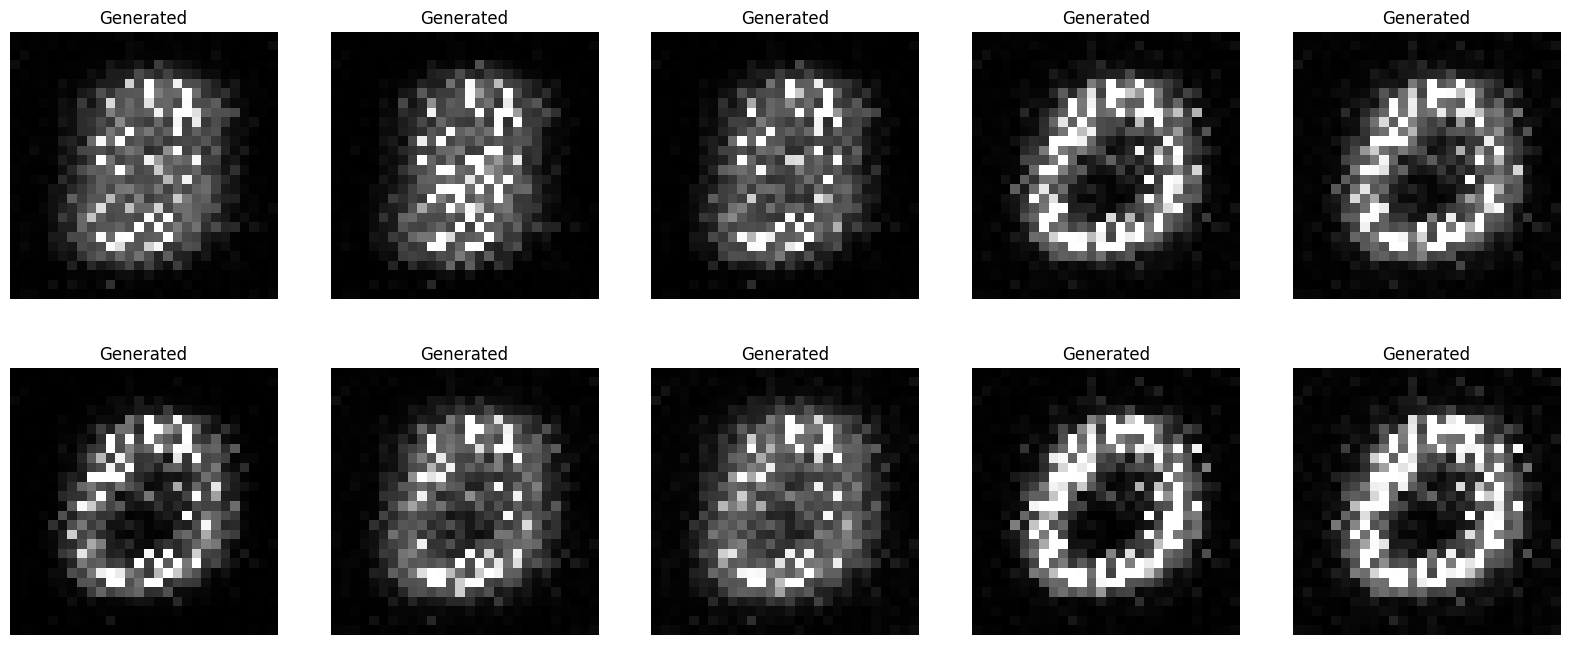

Epoch [28/100]
Loss D 0.1757
Loss G 2.6521


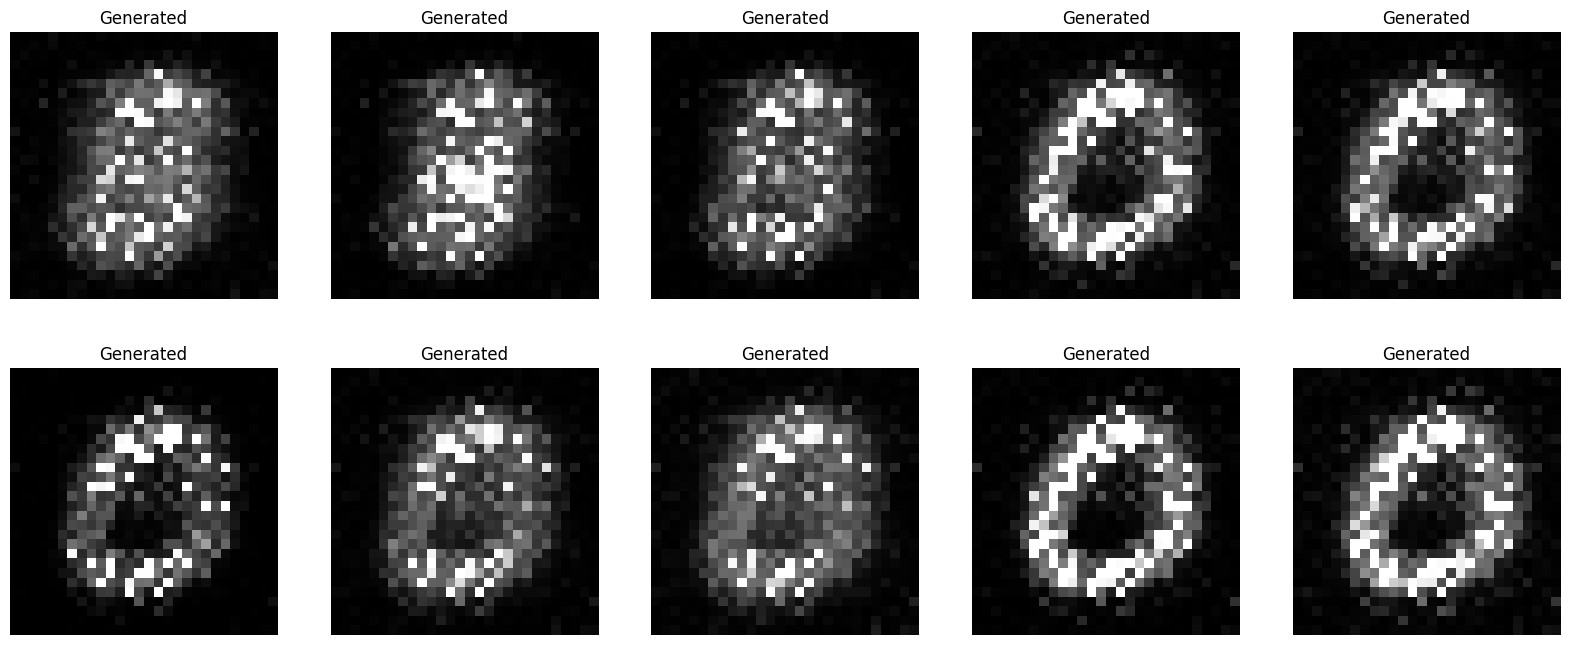

Epoch [29/100]
Loss D 0.1528
Loss G 2.4877


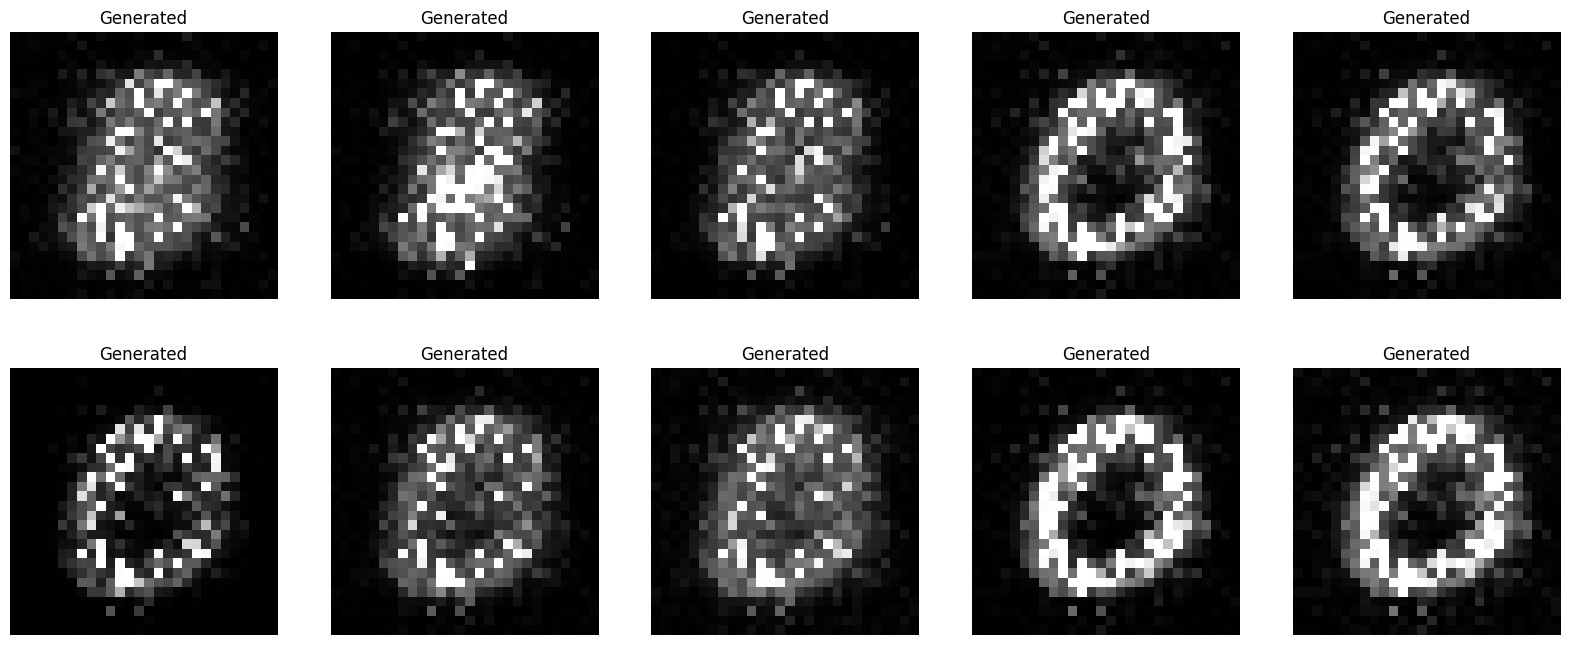

Epoch [30/100]
Loss D 0.1901
Loss G 2.6766


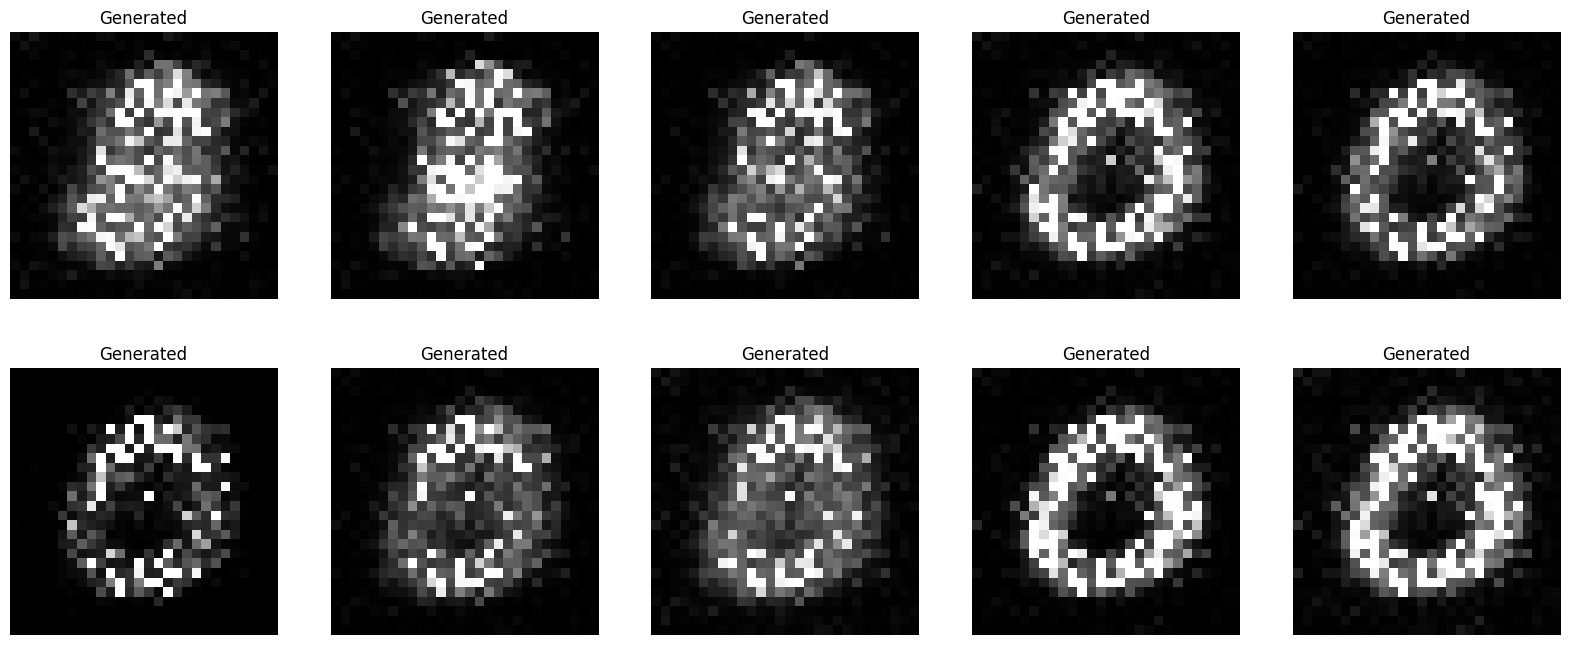

Epoch [31/100]
Loss D 0.1417
Loss G 2.7159


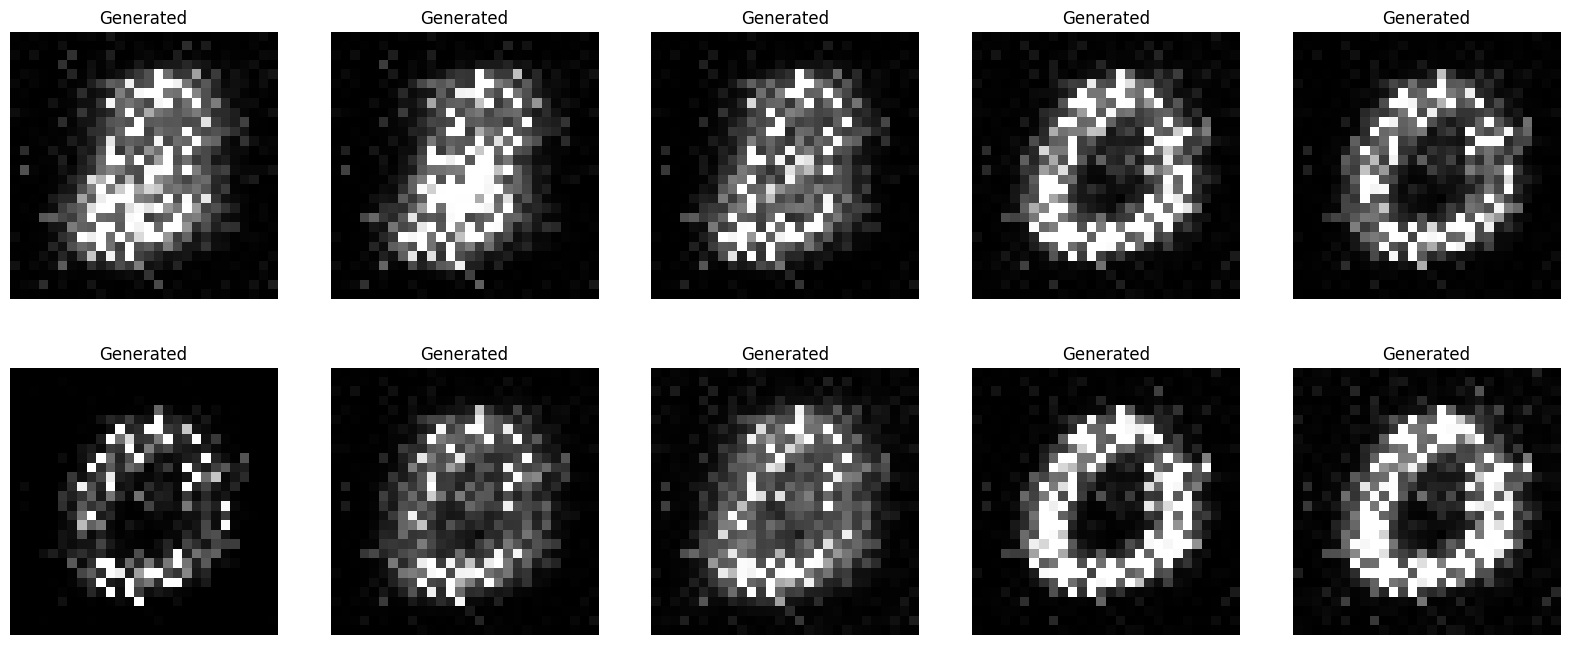

Epoch [32/100]
Loss D 0.1146
Loss G 2.8097


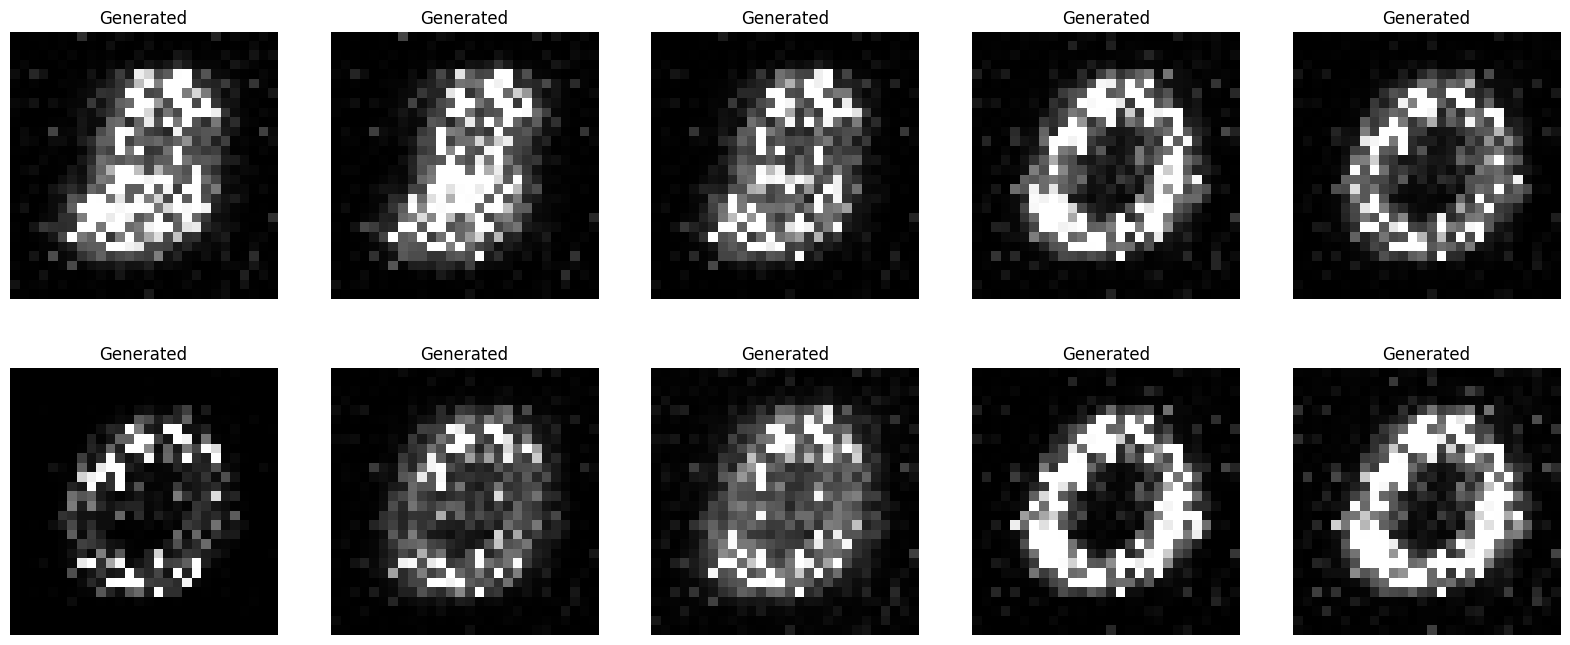

Epoch [33/100]
Loss D 0.1440
Loss G 2.9802


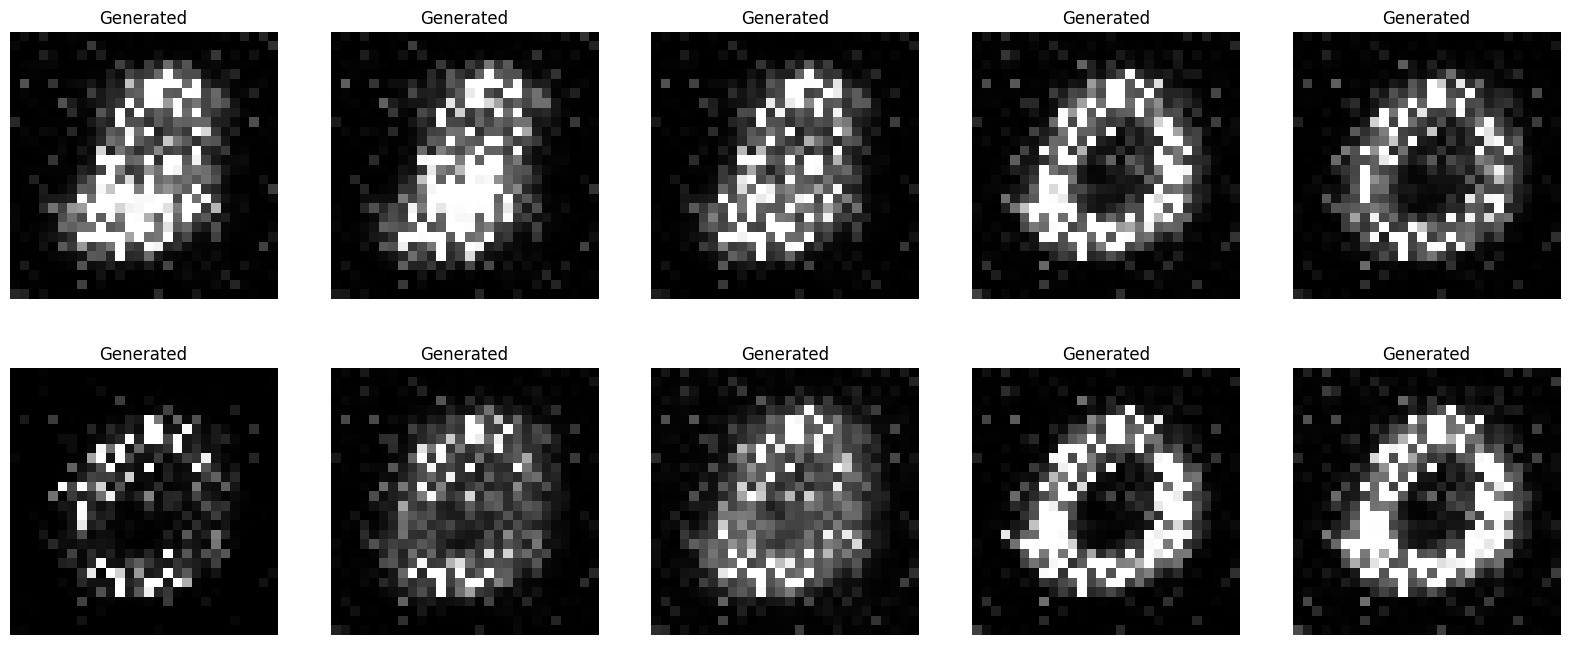

Epoch [34/100]
Loss D 0.1094
Loss G 3.0927


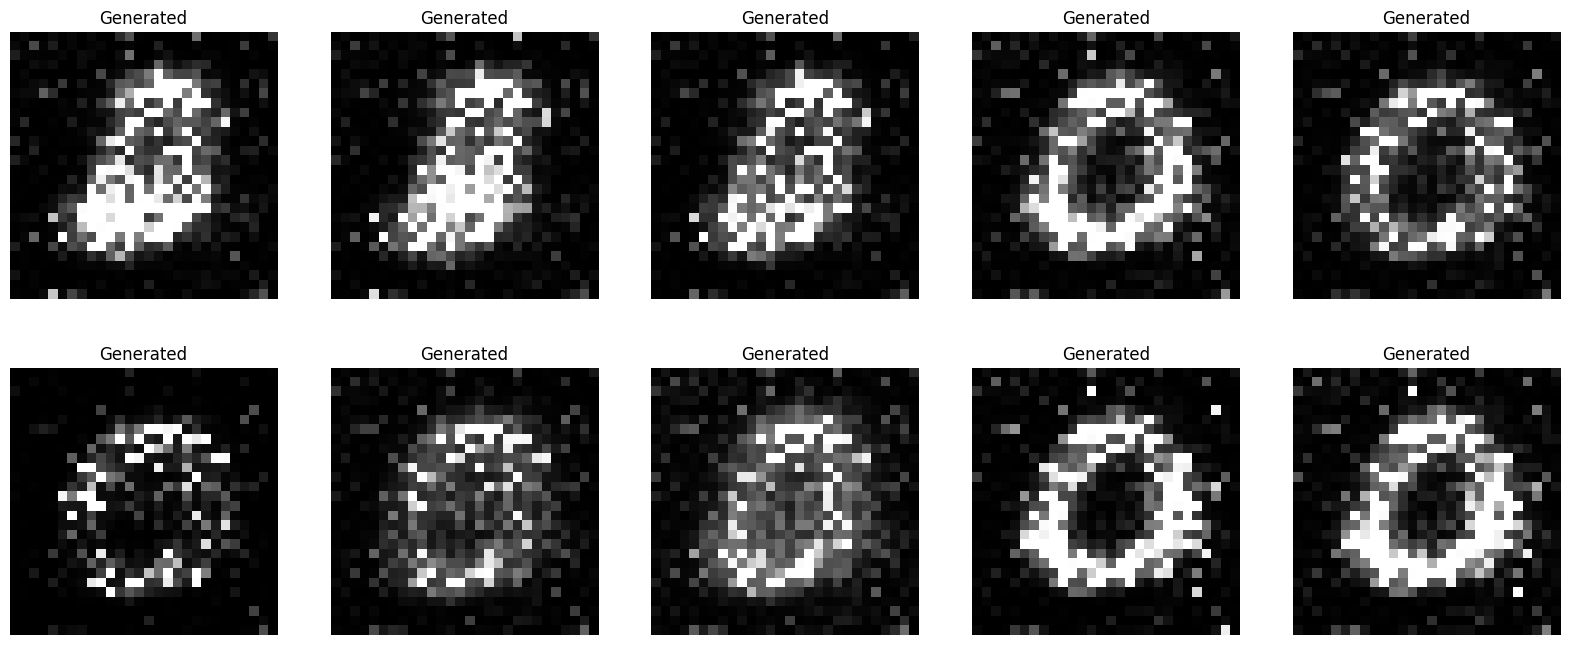

Epoch [35/100]
Loss D 0.1289
Loss G 3.2828


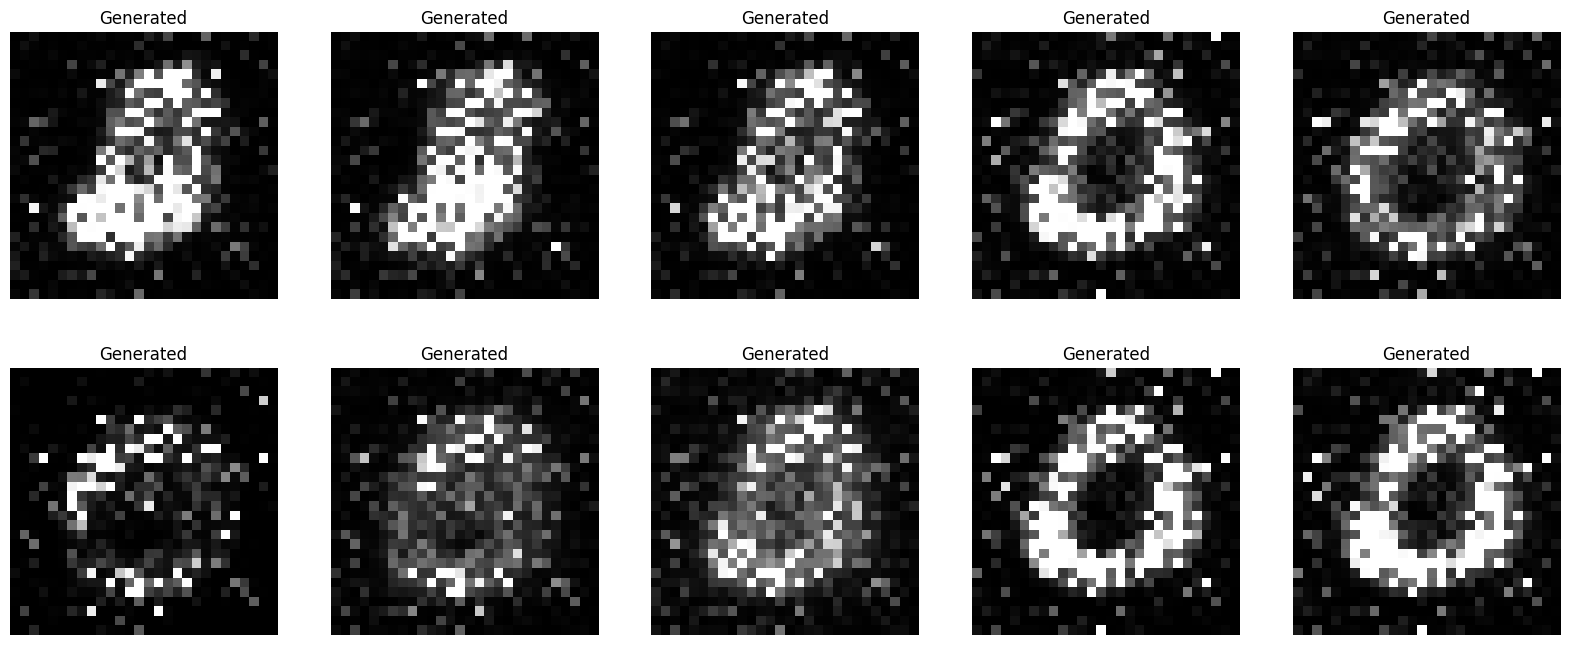

Epoch [36/100]
Loss D 0.0458
Loss G 4.0295


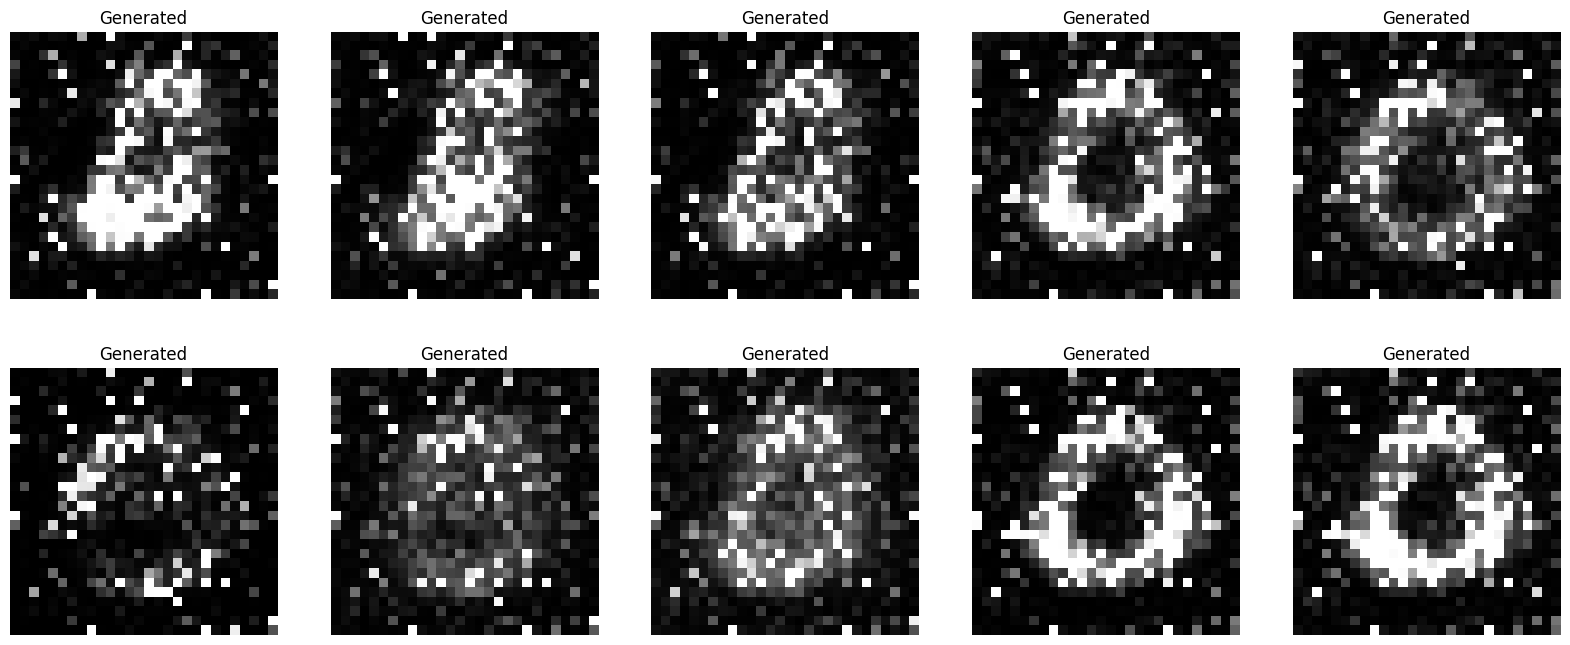

Epoch [37/100]
Loss D 0.0351
Loss G 4.7468


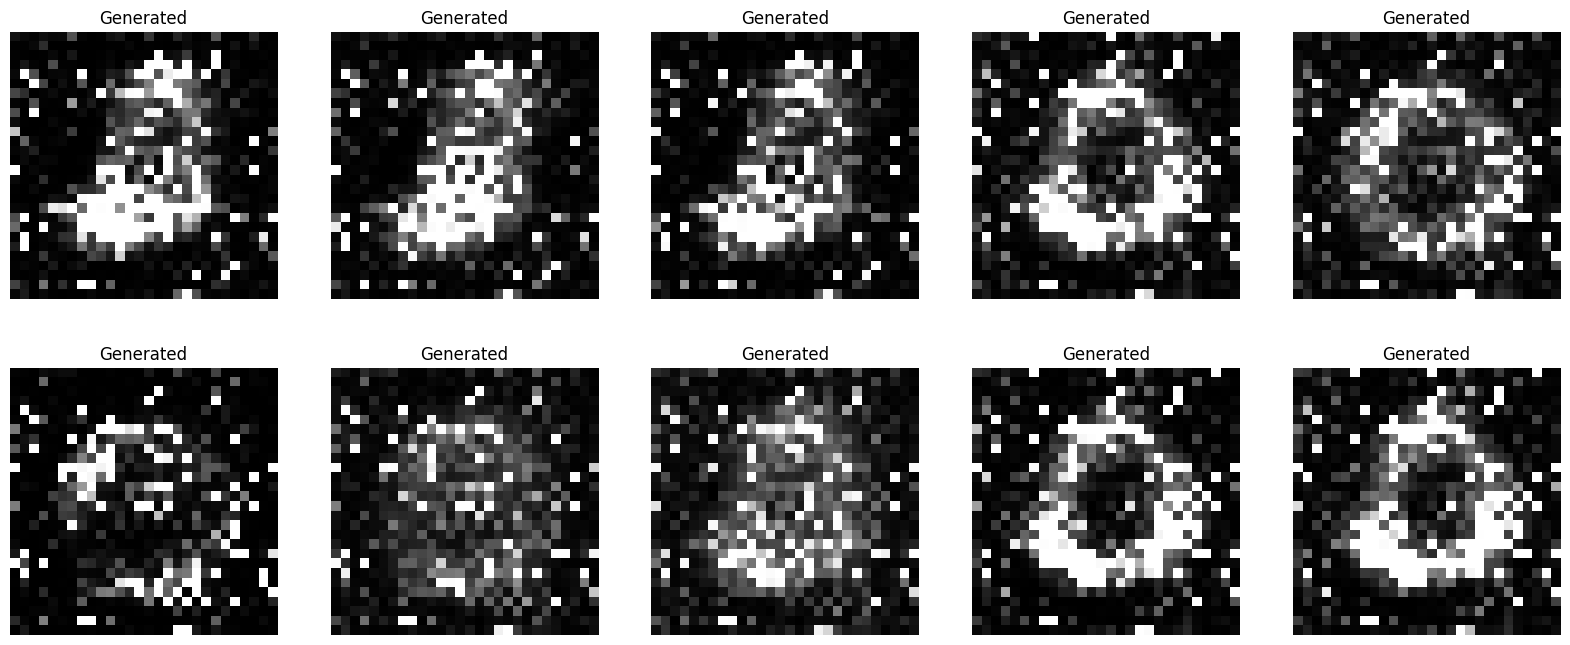

Epoch [38/100]
Loss D 0.0129
Loss G 5.4991


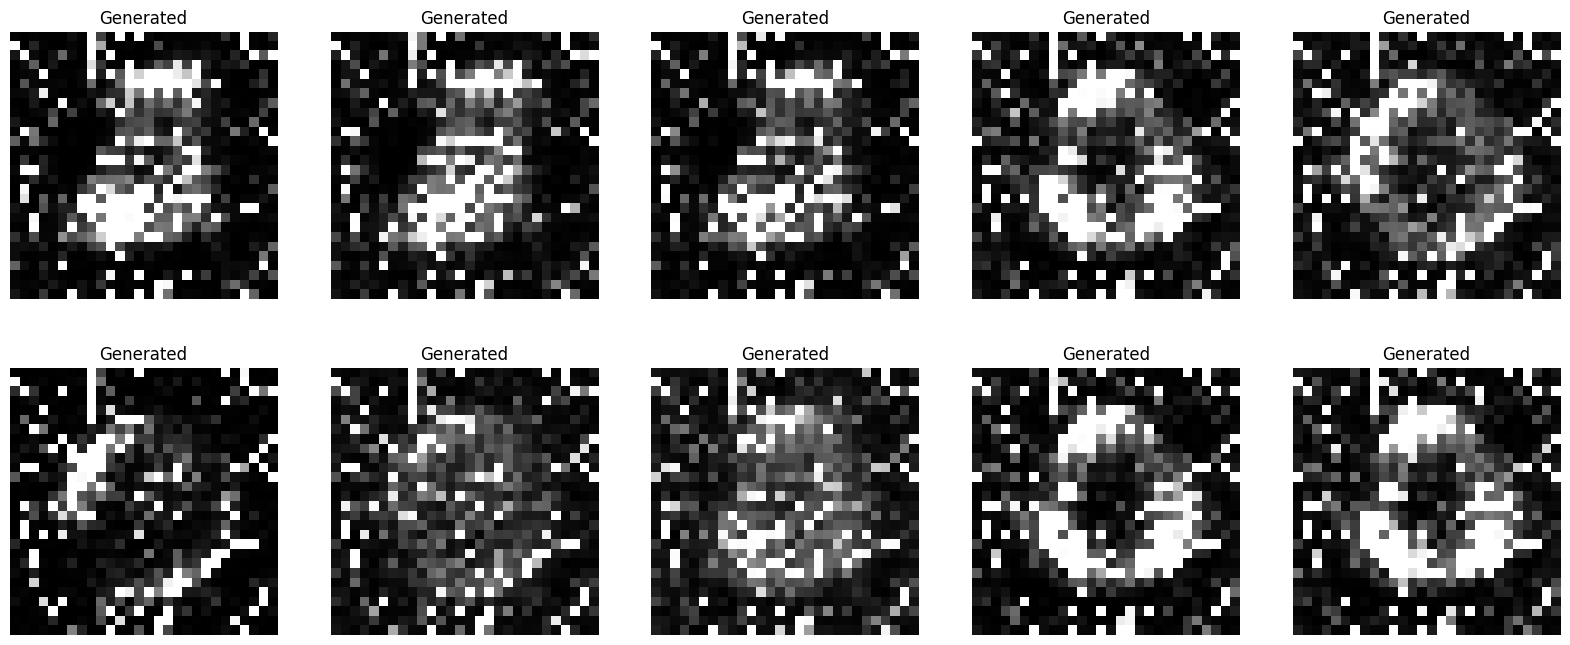

Epoch [39/100]
Loss D 0.0097
Loss G 6.2380


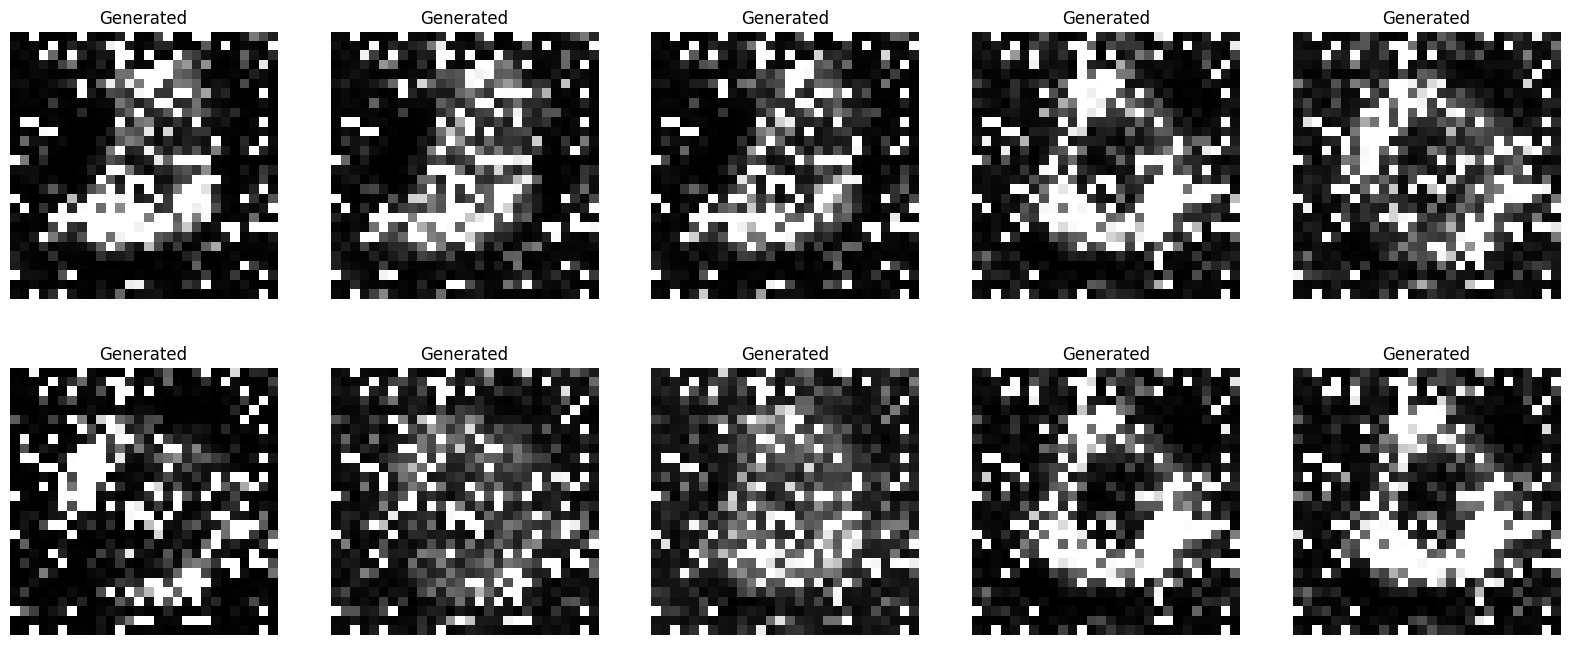

Epoch [40/100]
Loss D 0.0084
Loss G 5.8957


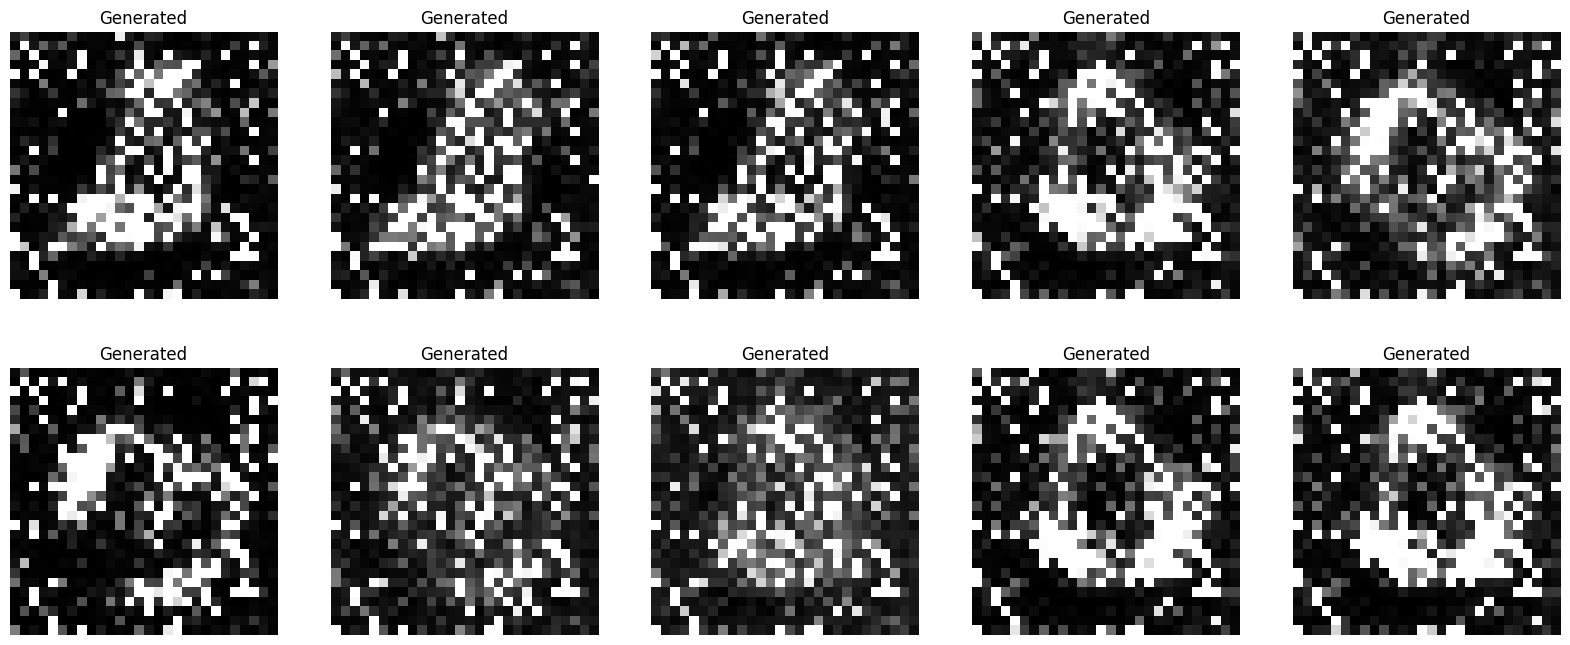

Epoch [41/100]
Loss D 0.0069
Loss G 5.5799


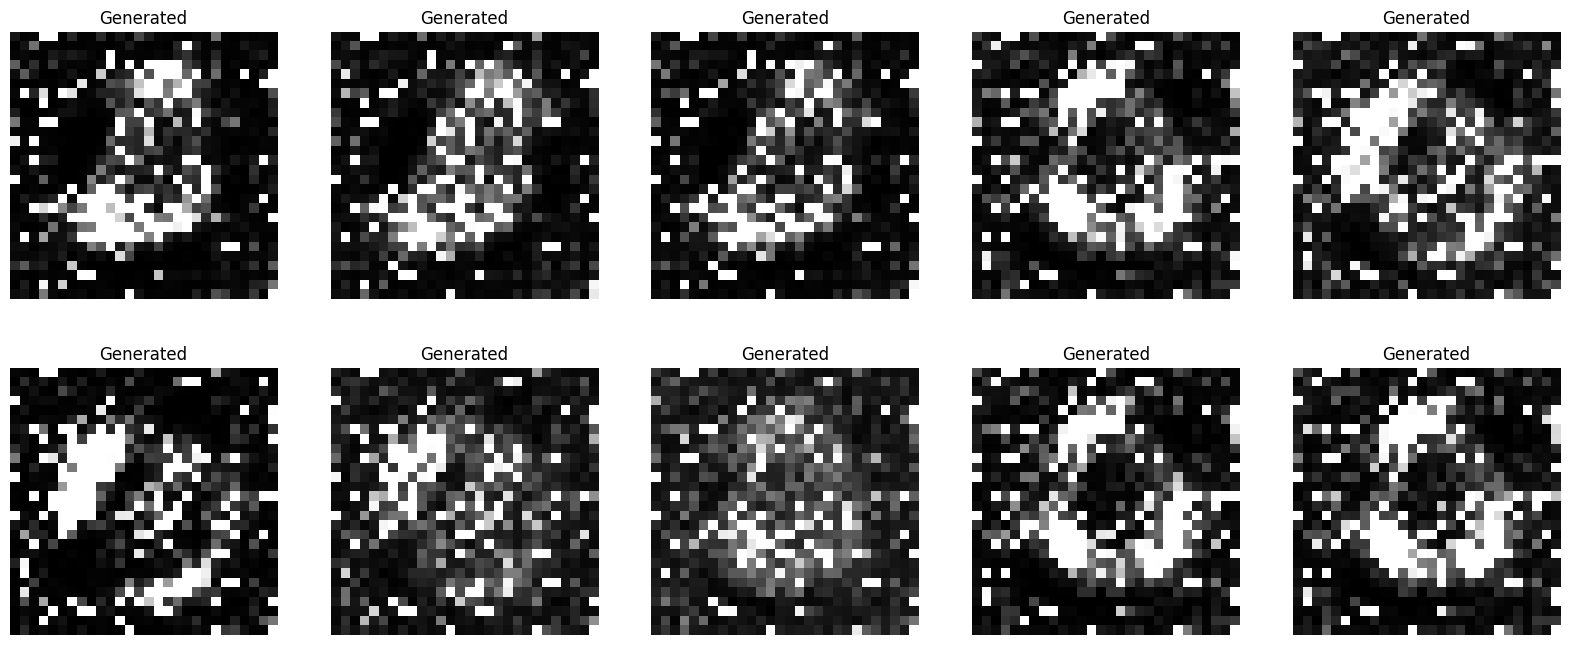

Epoch [42/100]
Loss D 0.0136
Loss G 5.3227


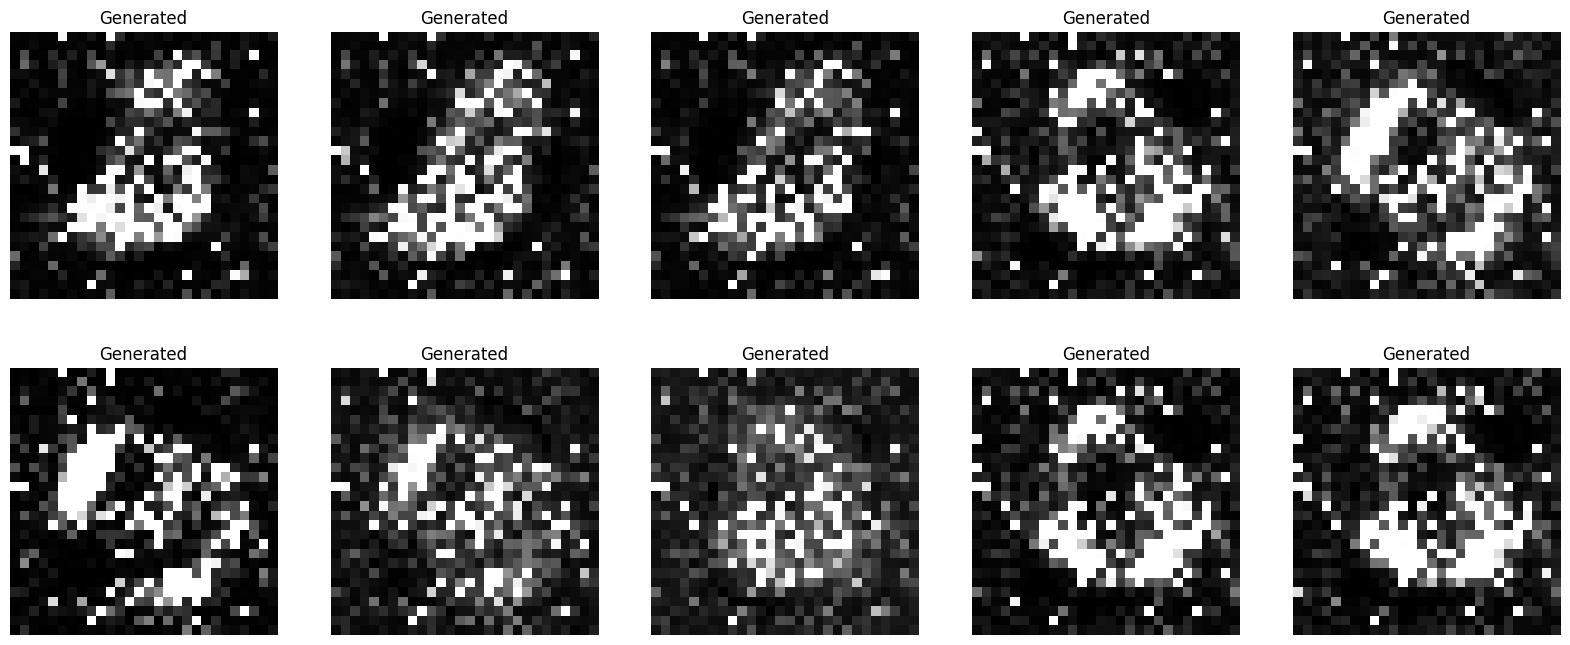

Epoch [43/100]
Loss D 0.0251
Loss G 4.5806


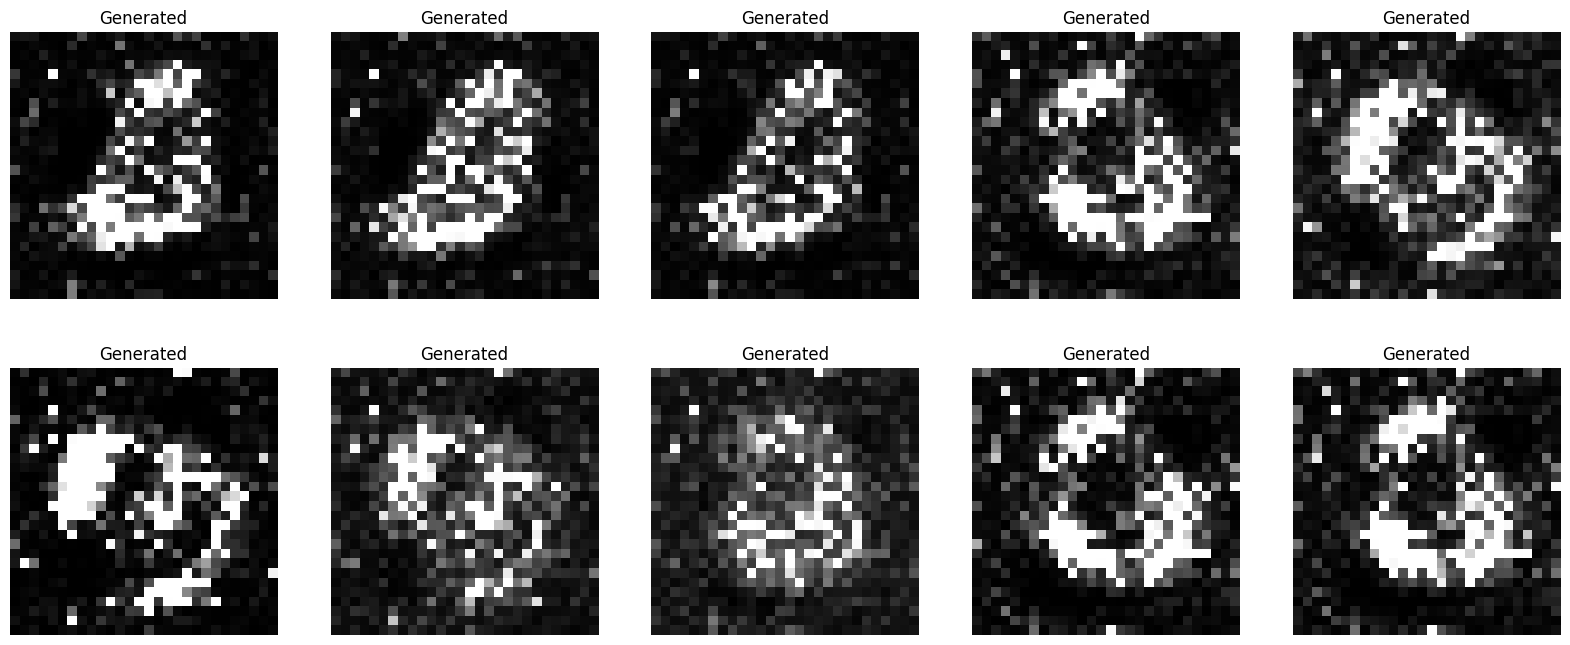

Epoch [44/100]
Loss D 0.0398
Loss G 4.2341


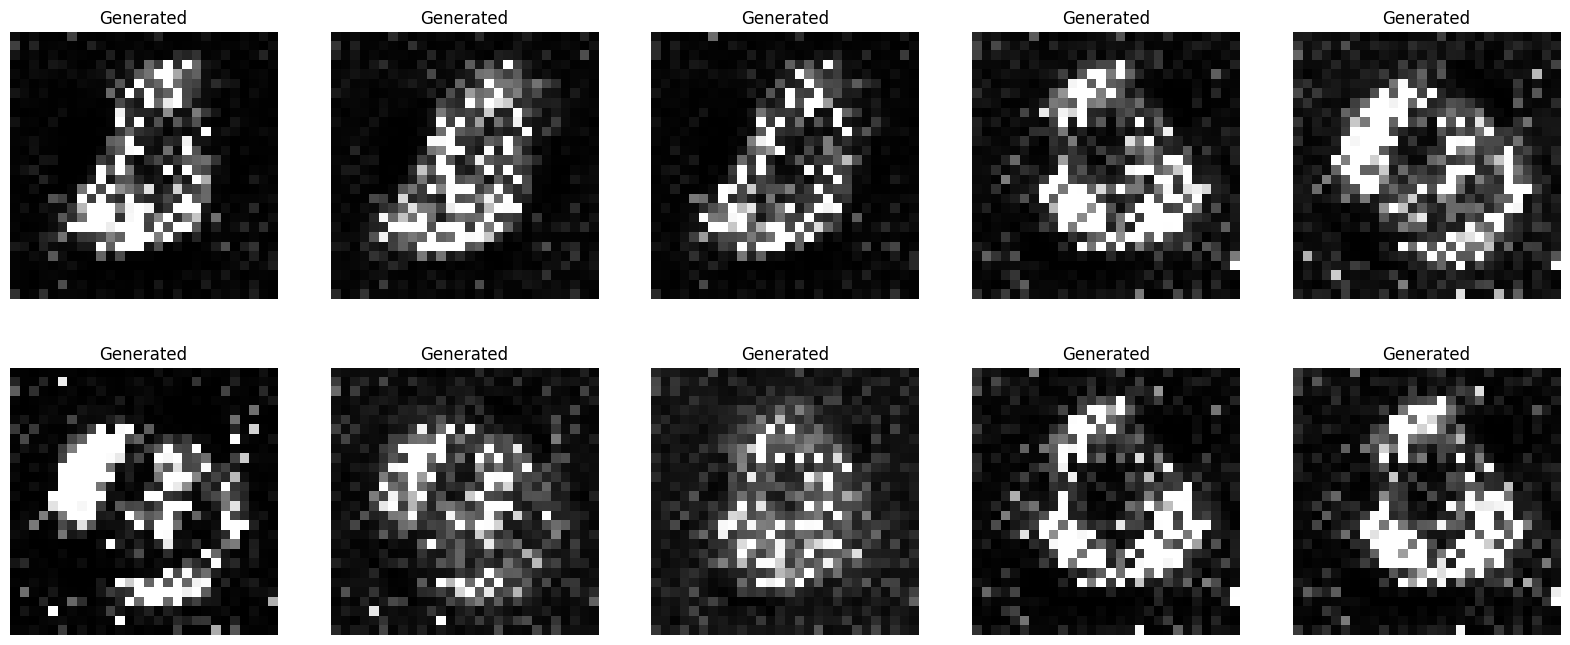

Epoch [45/100]
Loss D 0.0910
Loss G 3.4857


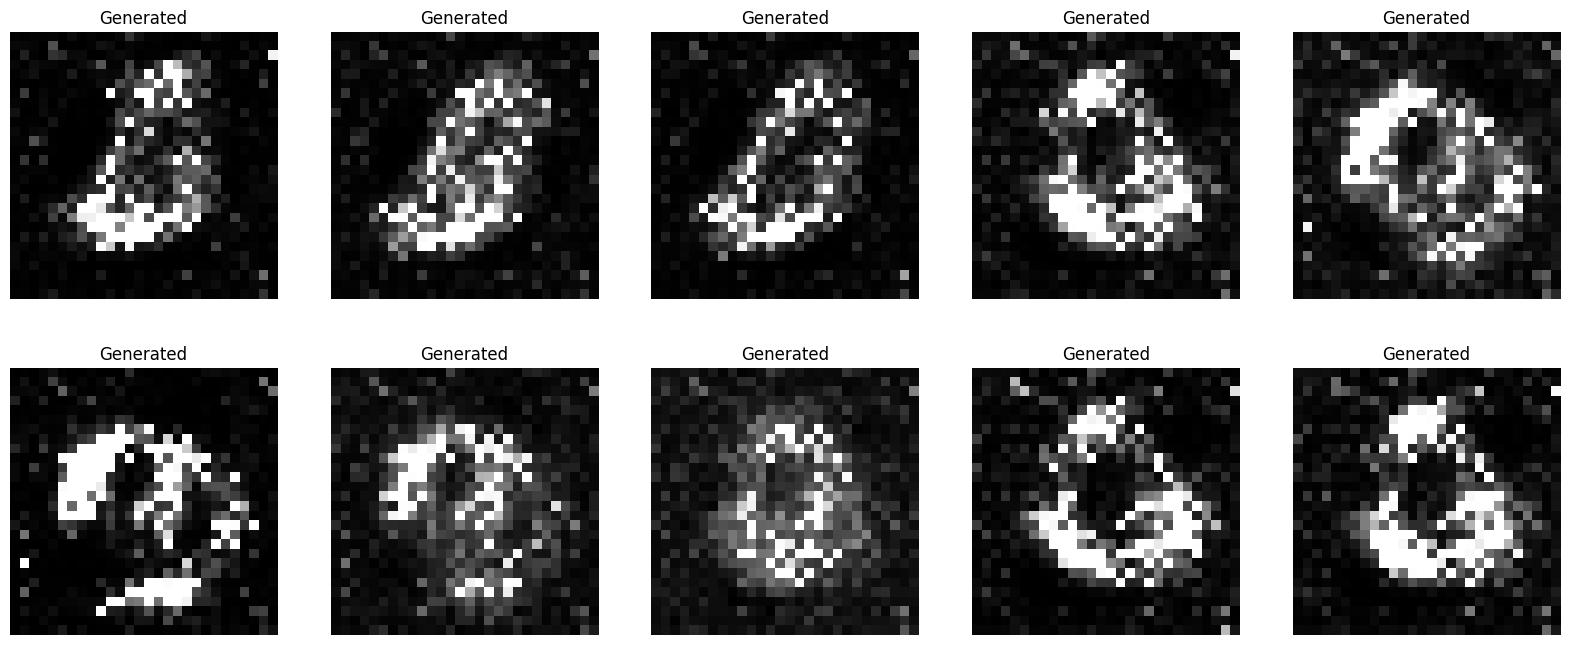

Epoch [46/100]
Loss D 0.1094
Loss G 3.3701


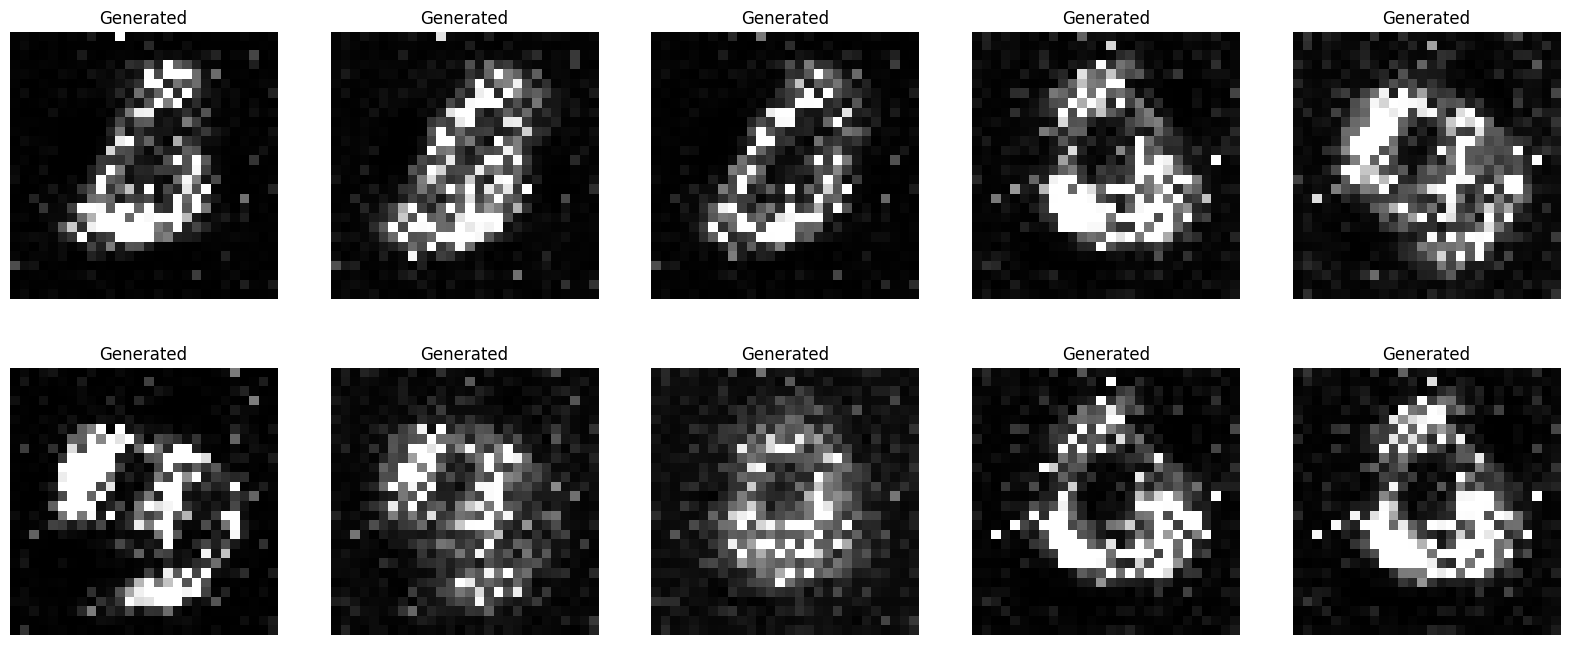

Epoch [47/100]
Loss D 0.1969
Loss G 3.1883


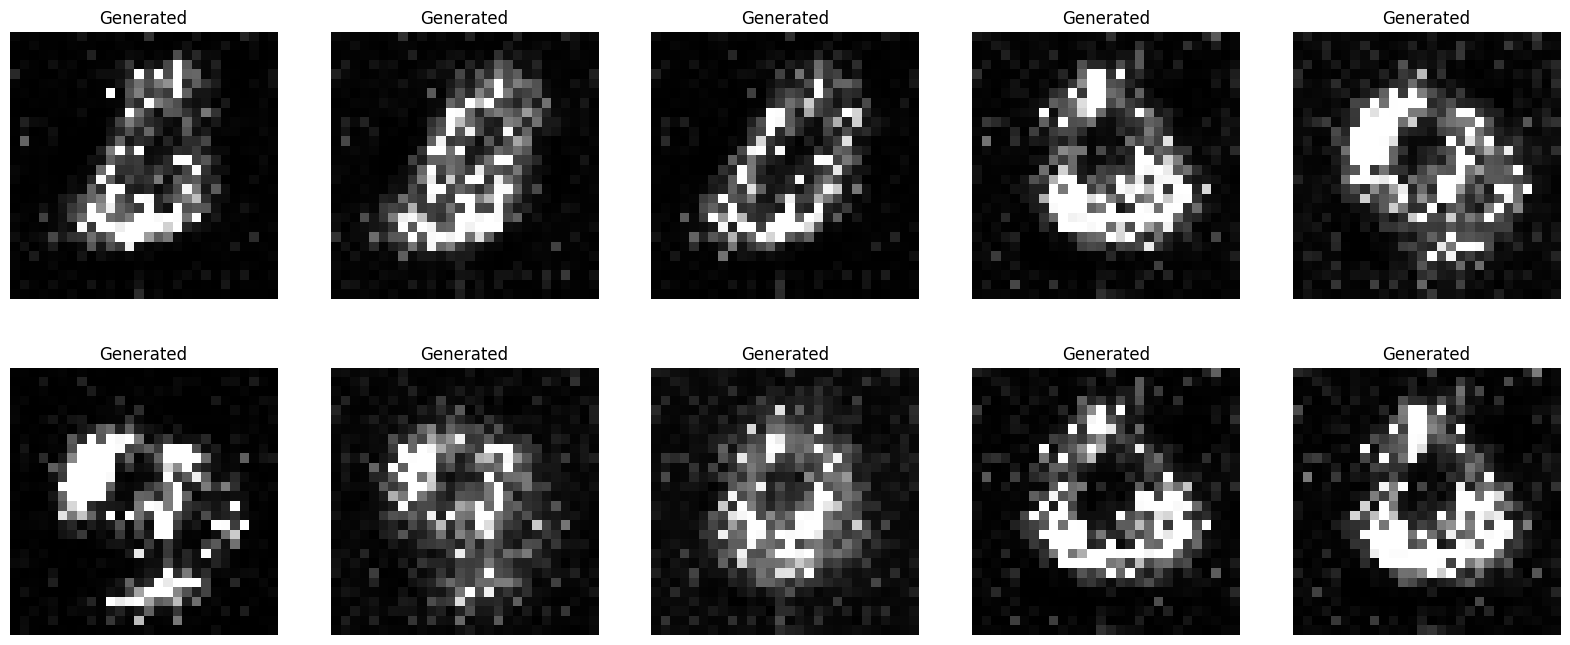

Epoch [48/100]
Loss D 0.2529
Loss G 2.8584


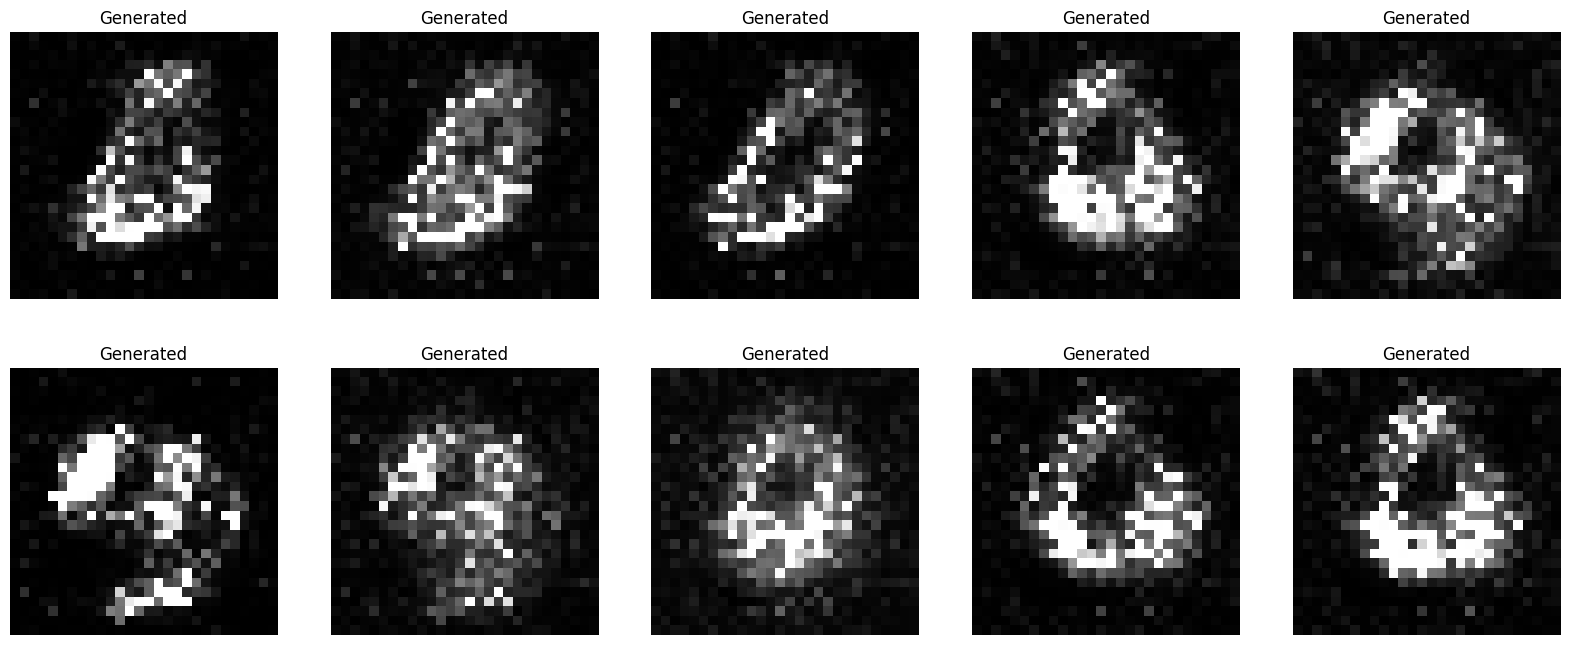

Epoch [49/100]
Loss D 0.2074
Loss G 2.6732


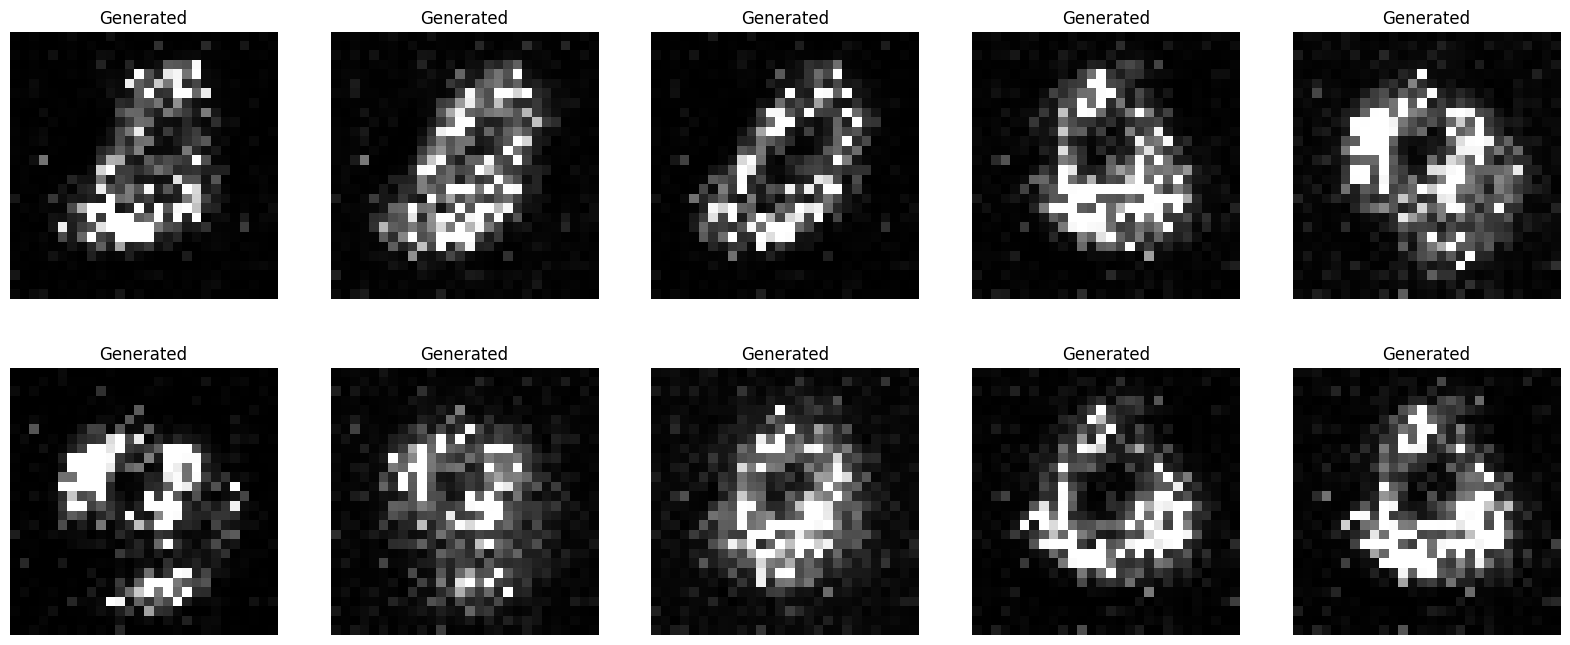

Epoch [50/100]
Loss D 0.2458
Loss G 2.2814


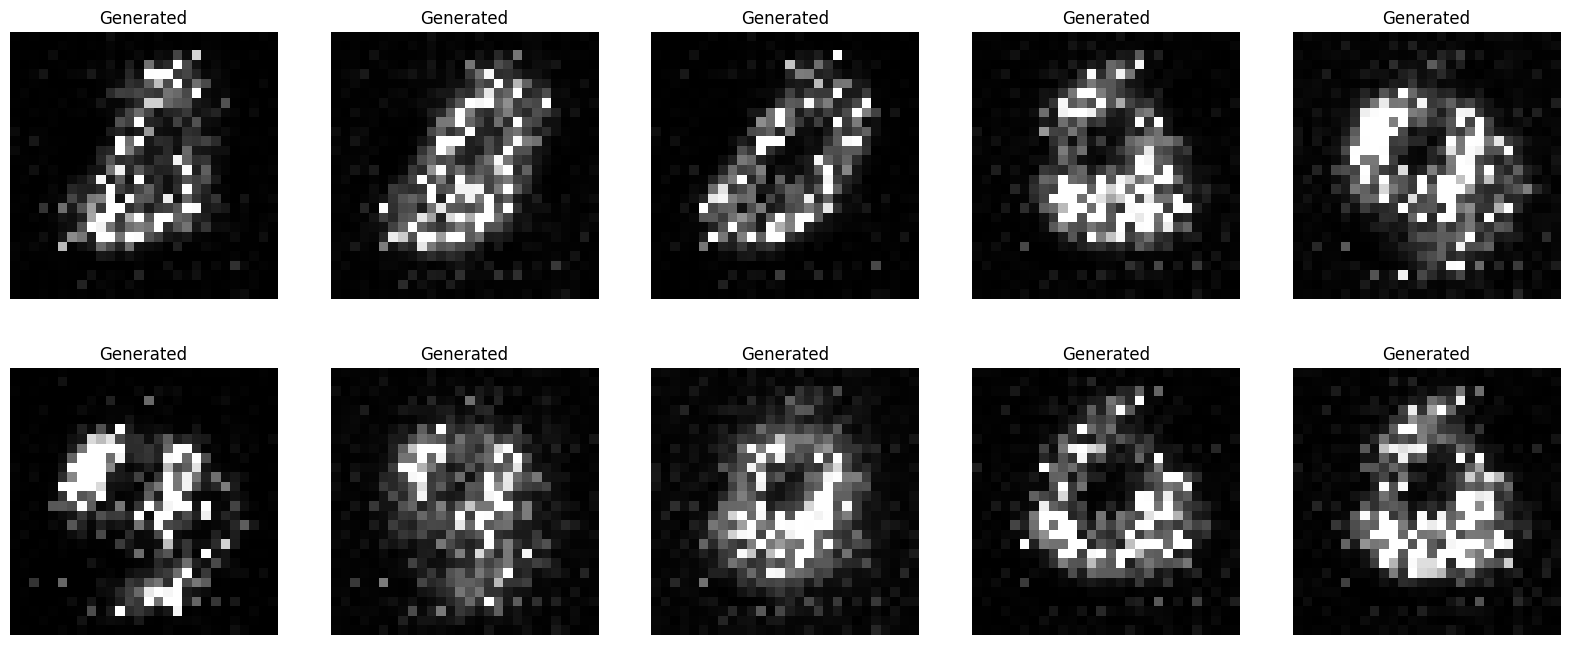

Epoch [51/100]
Loss D 0.3248
Loss G 2.0681


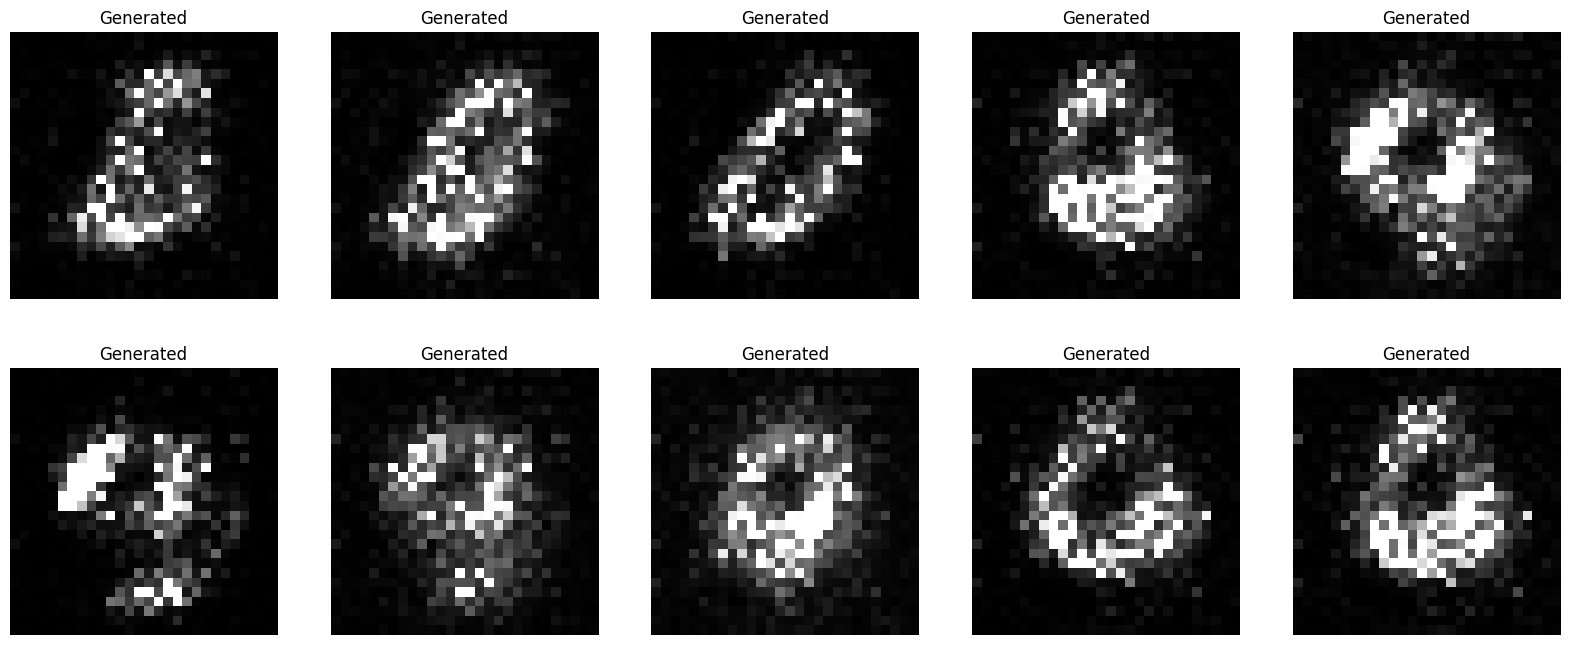

Epoch [52/100]
Loss D 0.2991
Loss G 2.3439


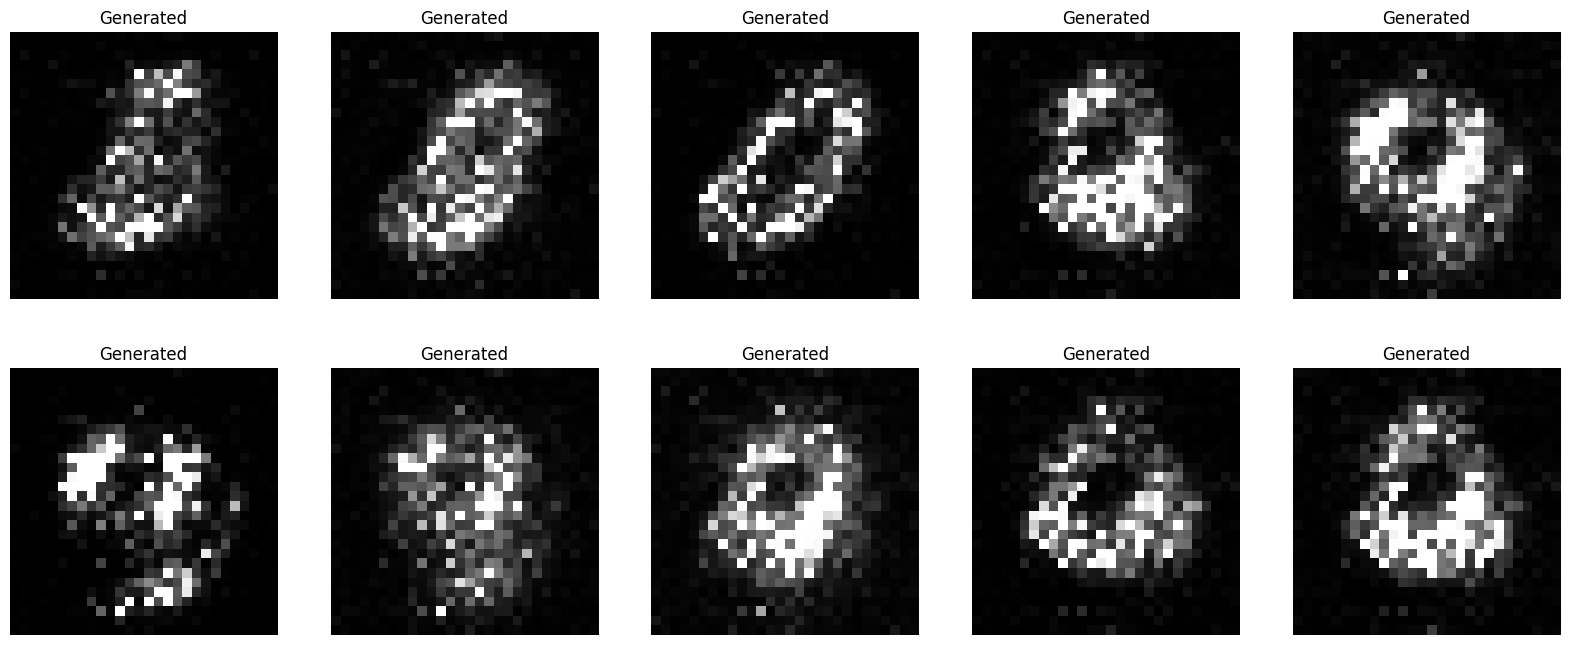

Epoch [53/100]
Loss D 0.5015
Loss G 1.6943


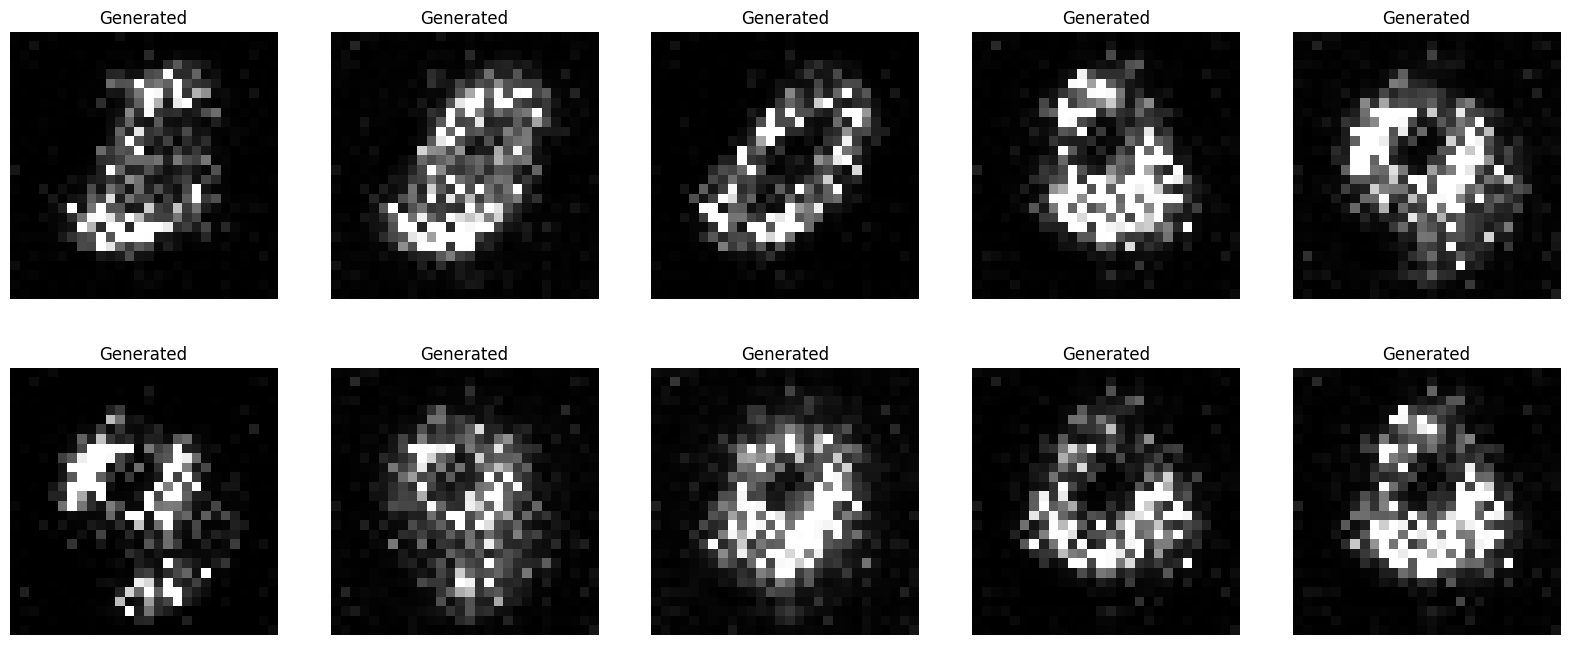

Epoch [54/100]
Loss D 0.4169
Loss G 2.1987


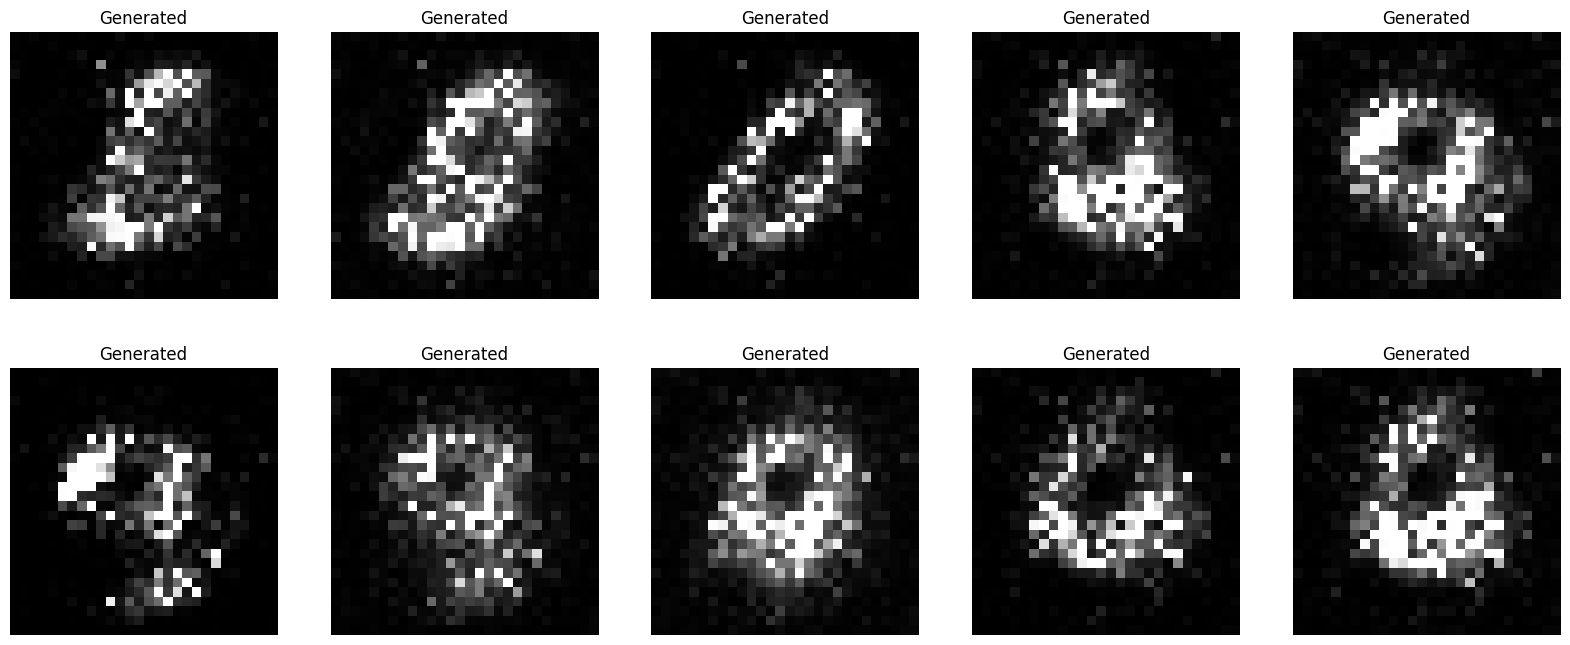

Epoch [55/100]
Loss D 0.3715
Loss G 2.2901


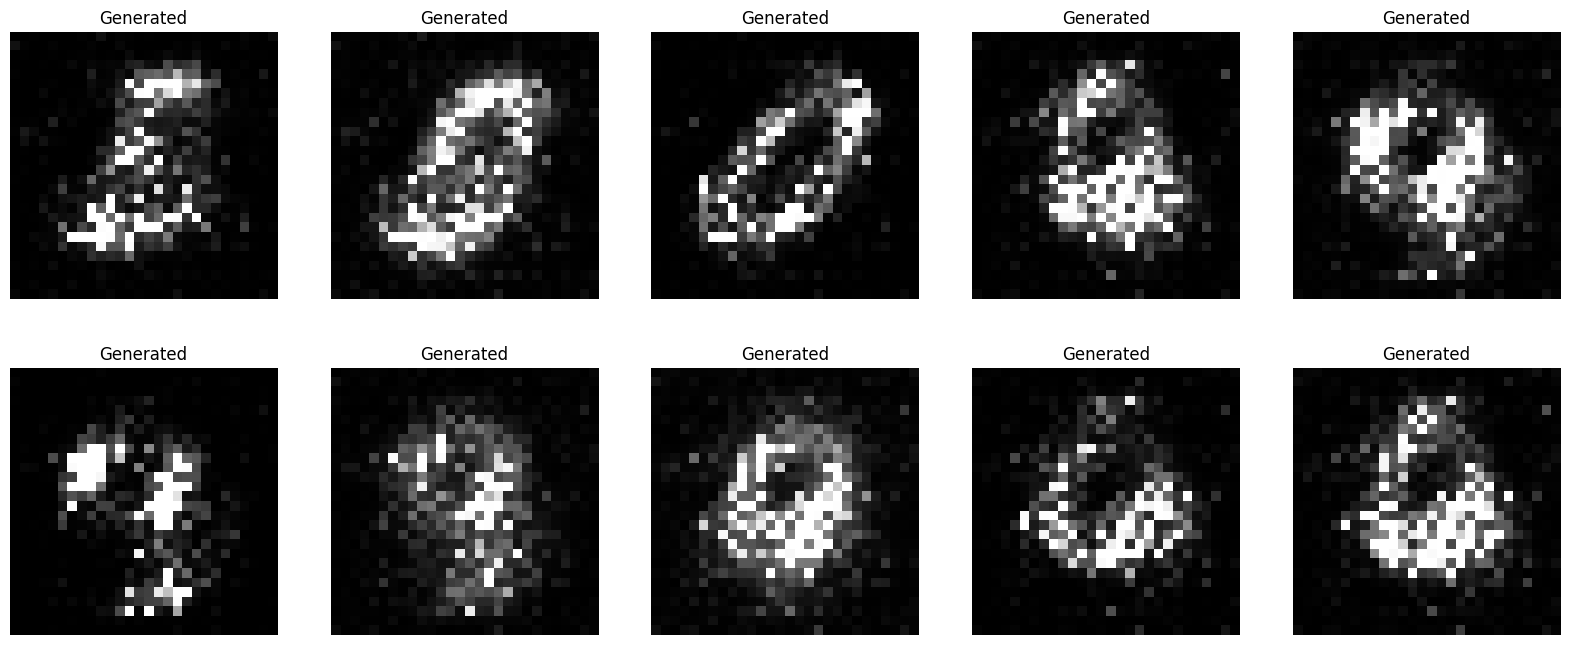

Epoch [56/100]
Loss D 0.3528
Loss G 1.9586


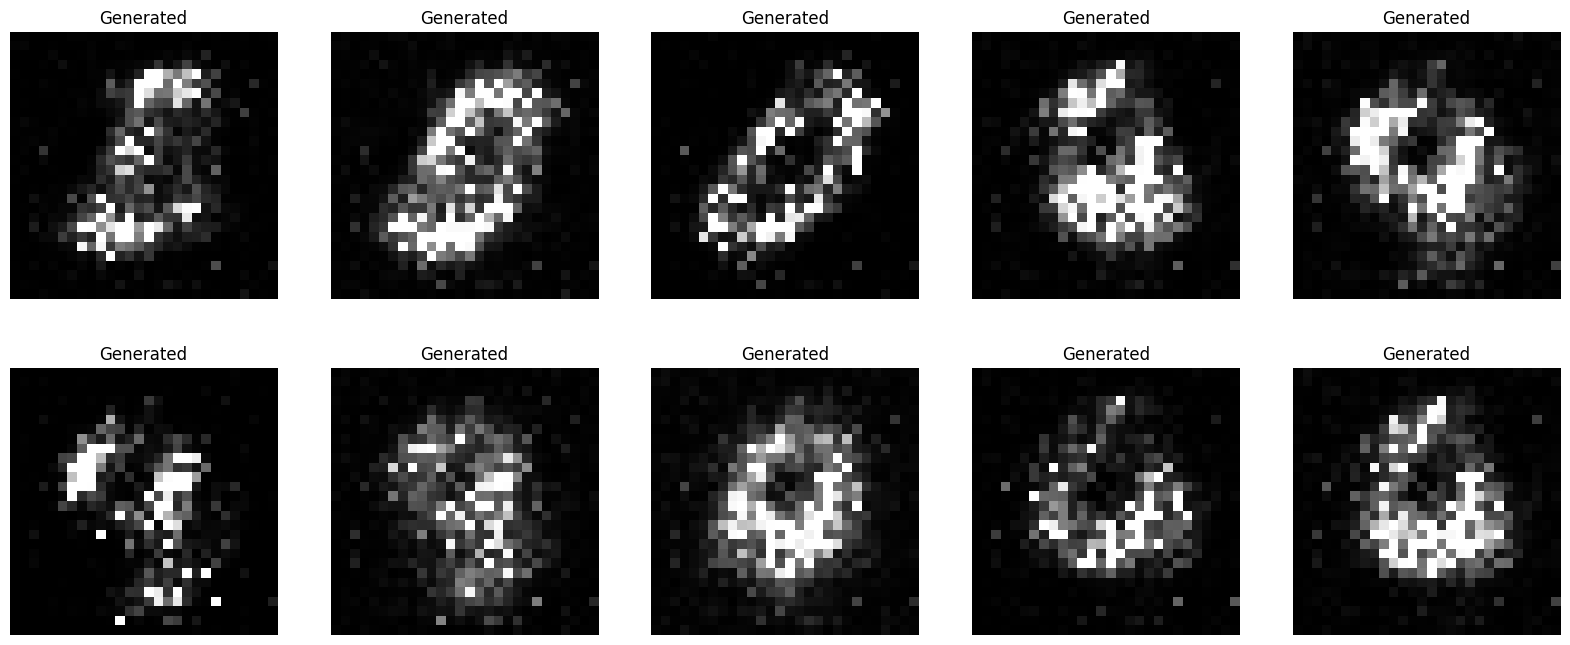

Epoch [57/100]
Loss D 0.4228
Loss G 1.7832


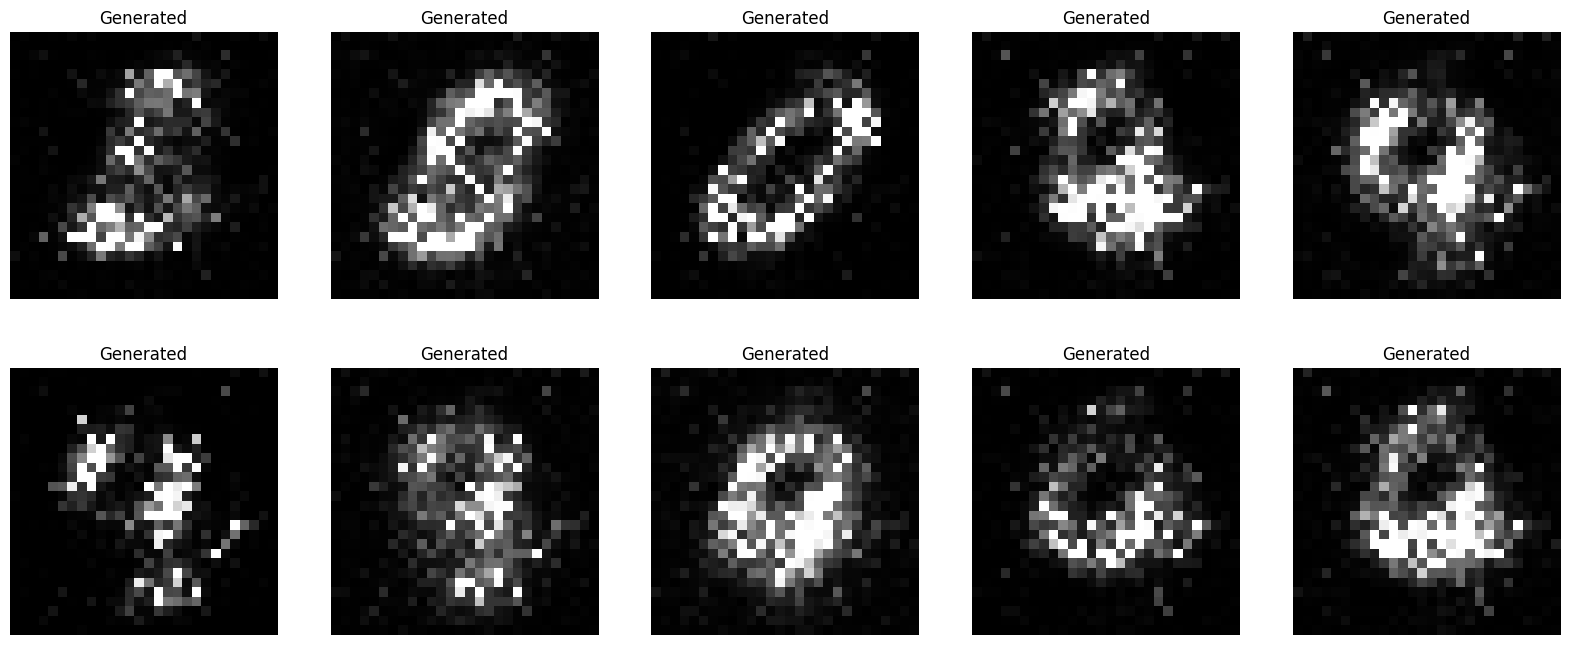

Epoch [58/100]
Loss D 0.3409
Loss G 1.8169


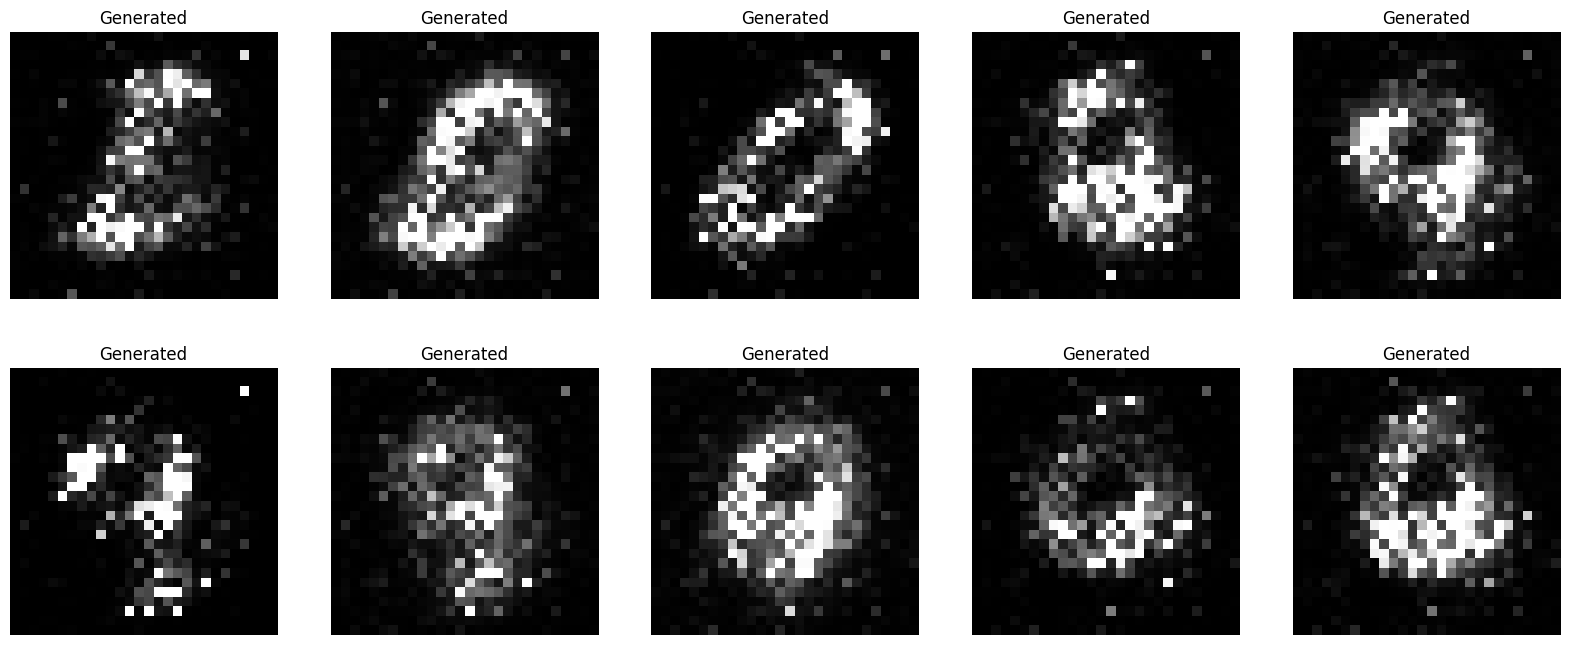

Epoch [59/100]
Loss D 0.2602
Loss G 2.2013


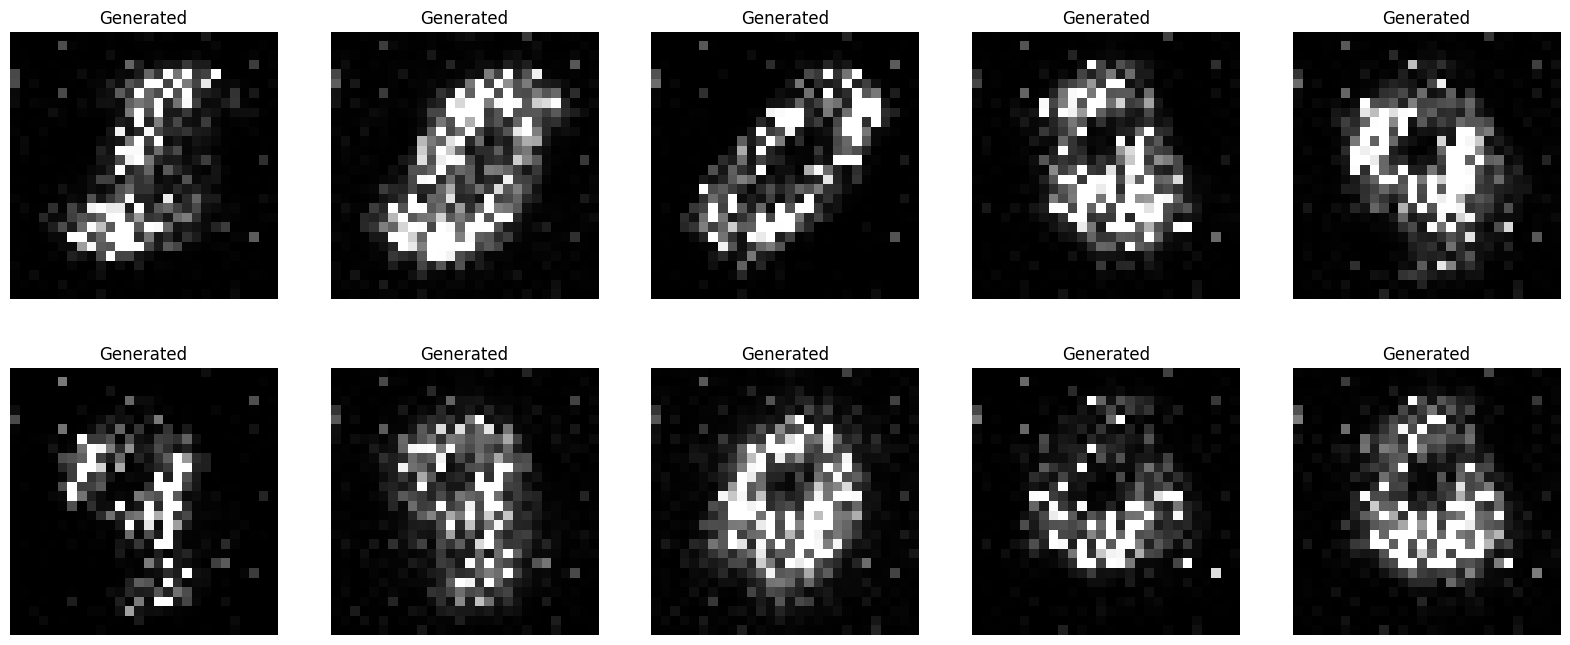

Epoch [60/100]
Loss D 0.3370
Loss G 2.1564


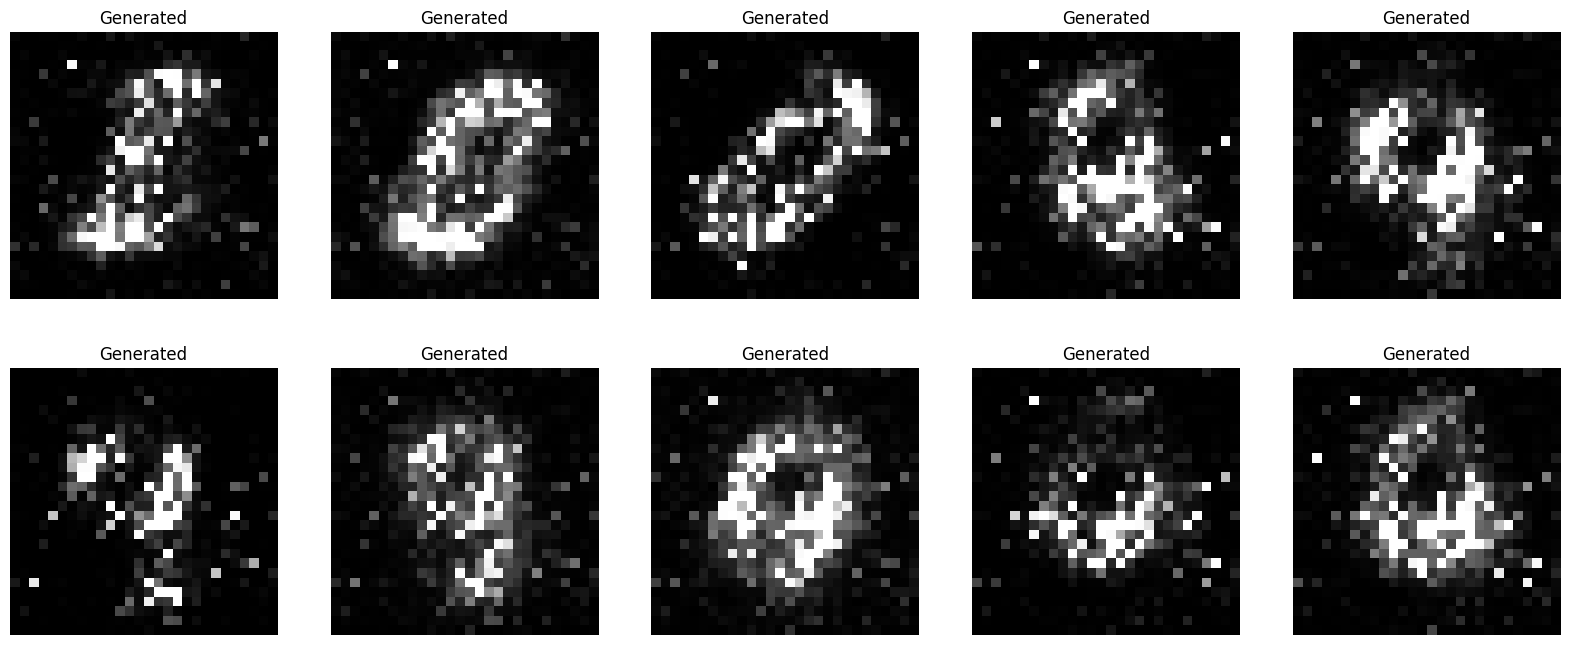

Epoch [61/100]
Loss D 0.2397
Loss G 2.3732


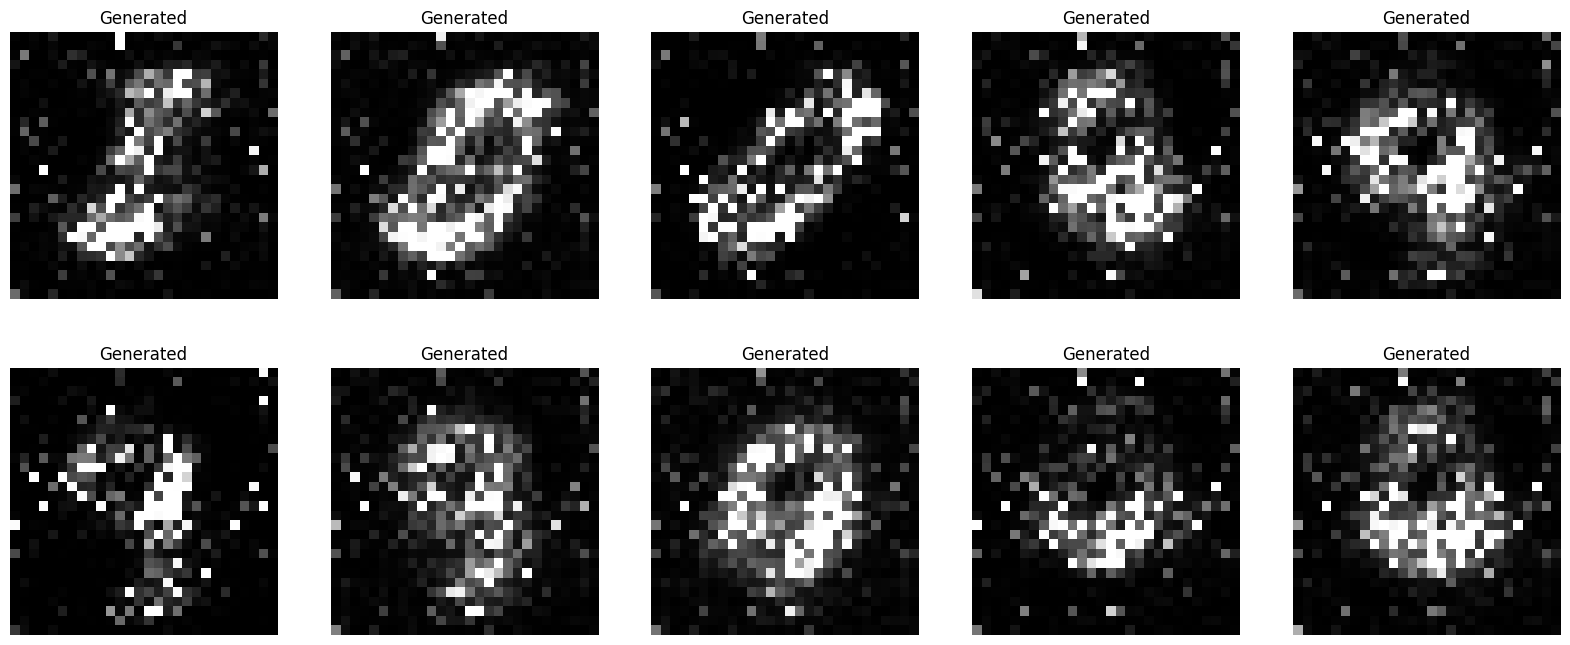

Epoch [62/100]
Loss D 0.1126
Loss G 3.2297


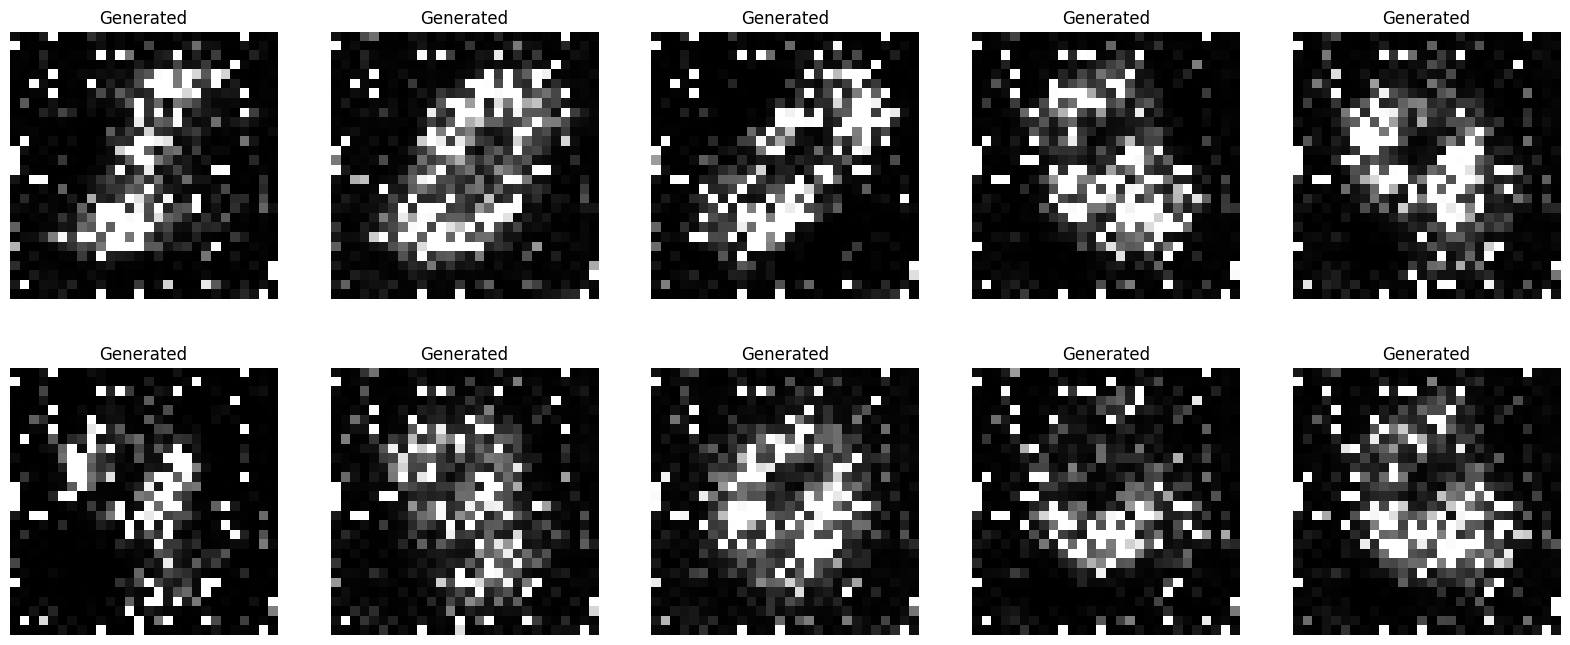

Epoch [63/100]
Loss D 0.0217
Loss G 4.7030


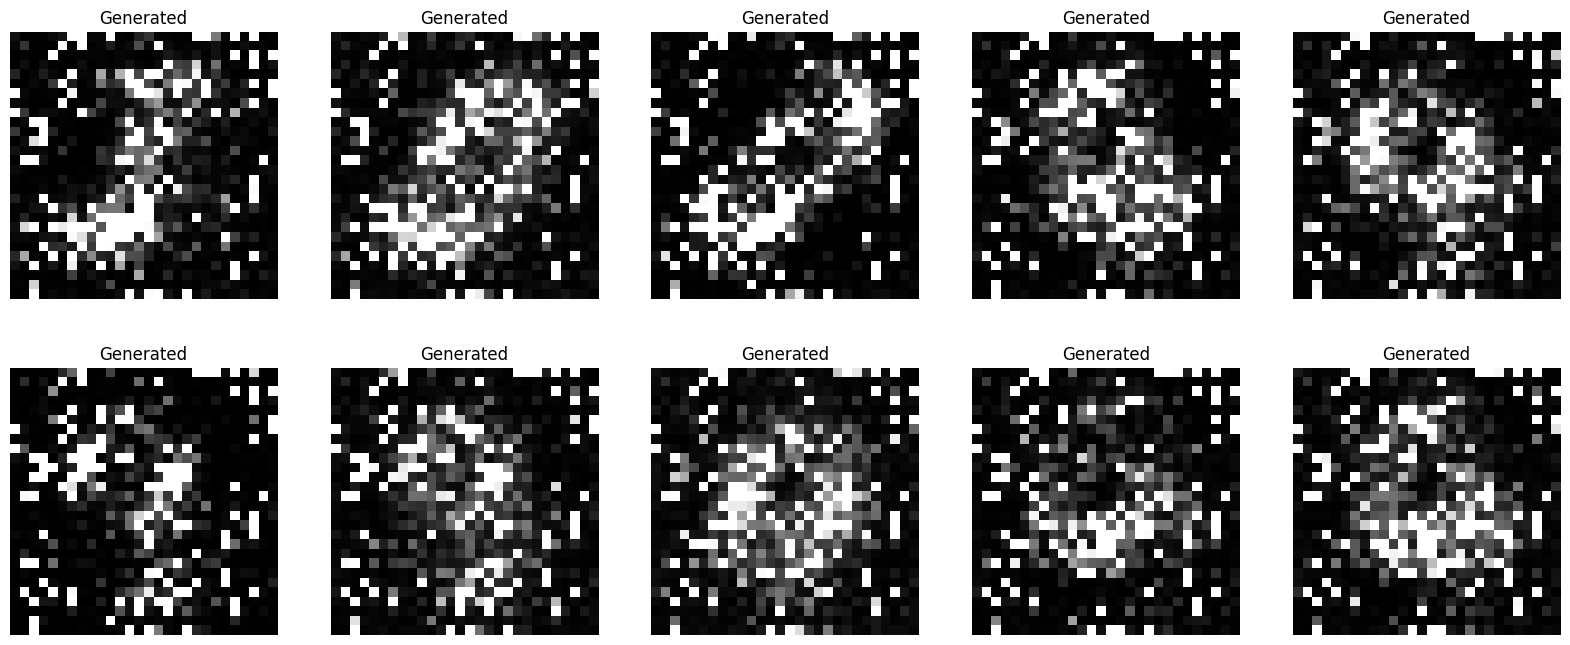

Epoch [64/100]
Loss D 0.0199
Loss G 5.5259


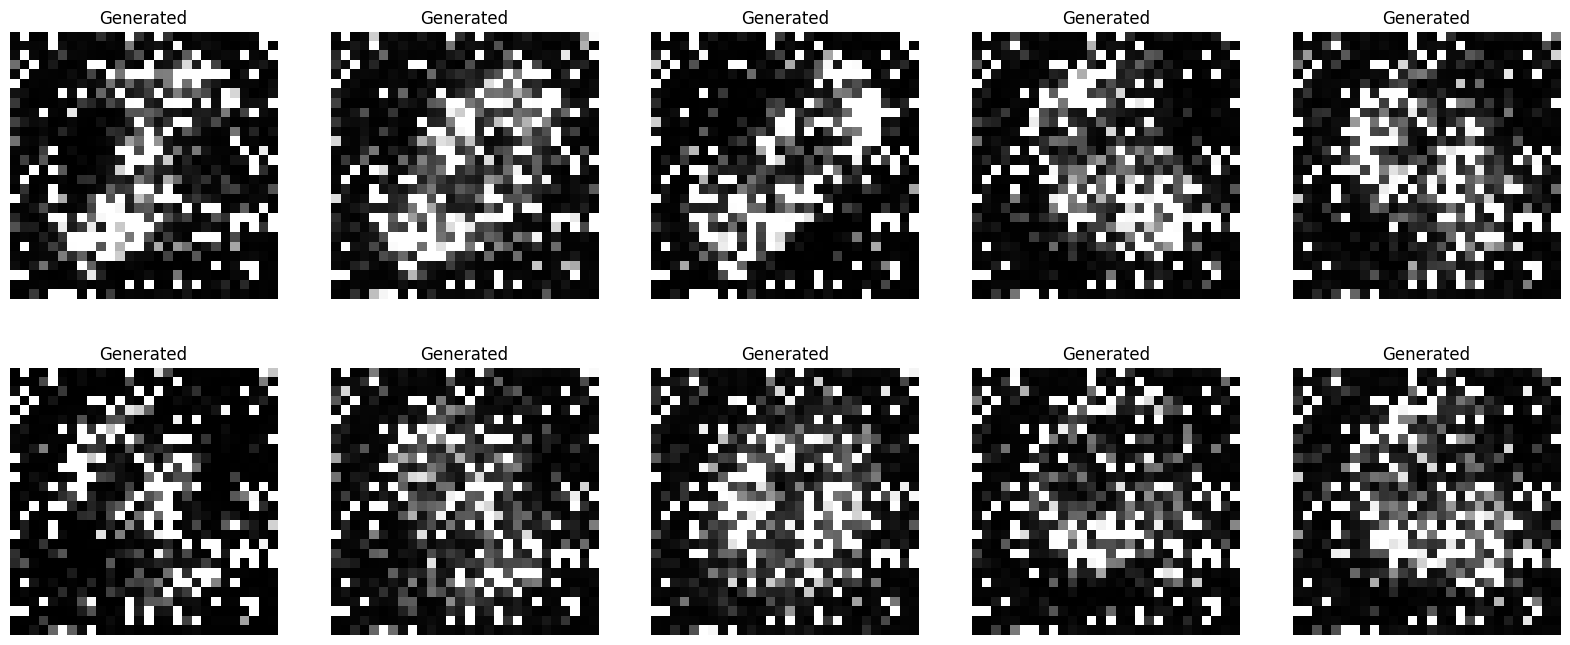

Epoch [65/100]
Loss D 0.0143
Loss G 5.0984


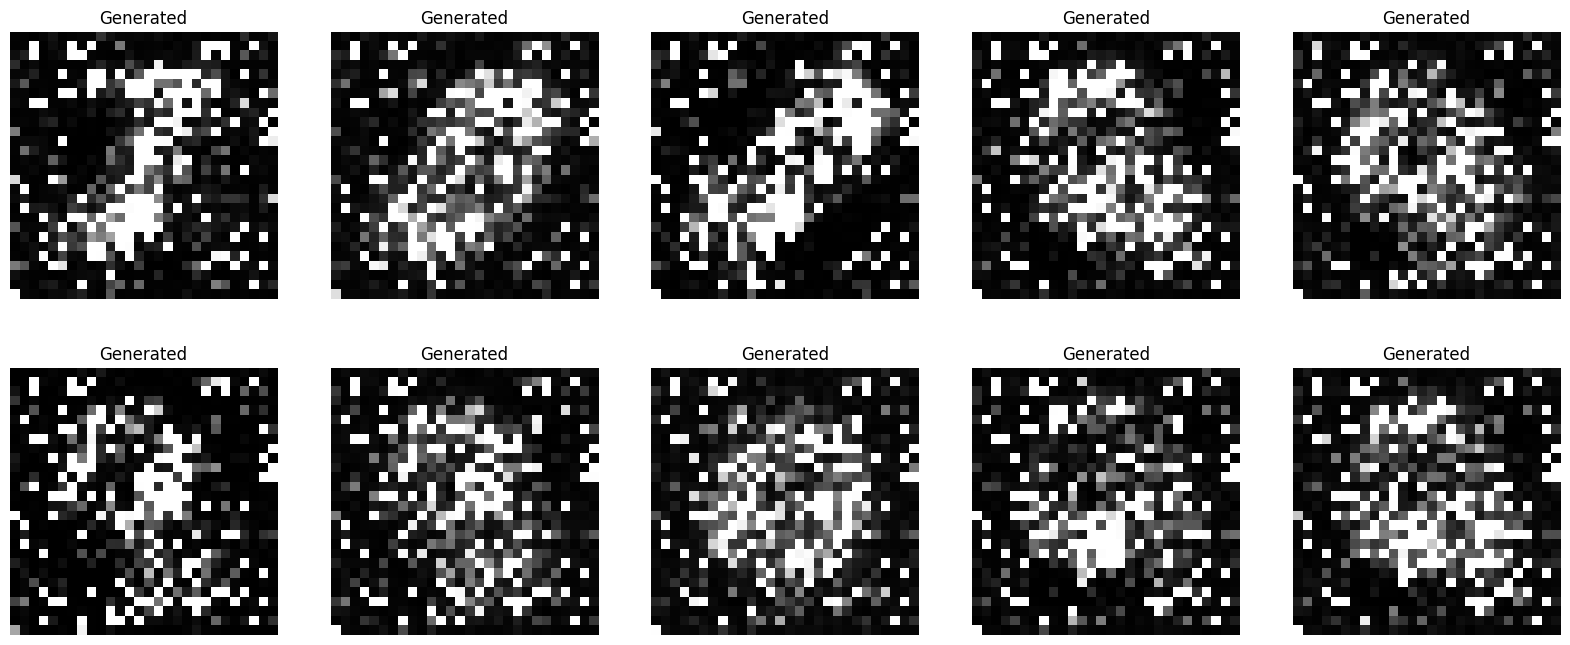

Epoch [66/100]
Loss D 0.0197
Loss G 5.1914


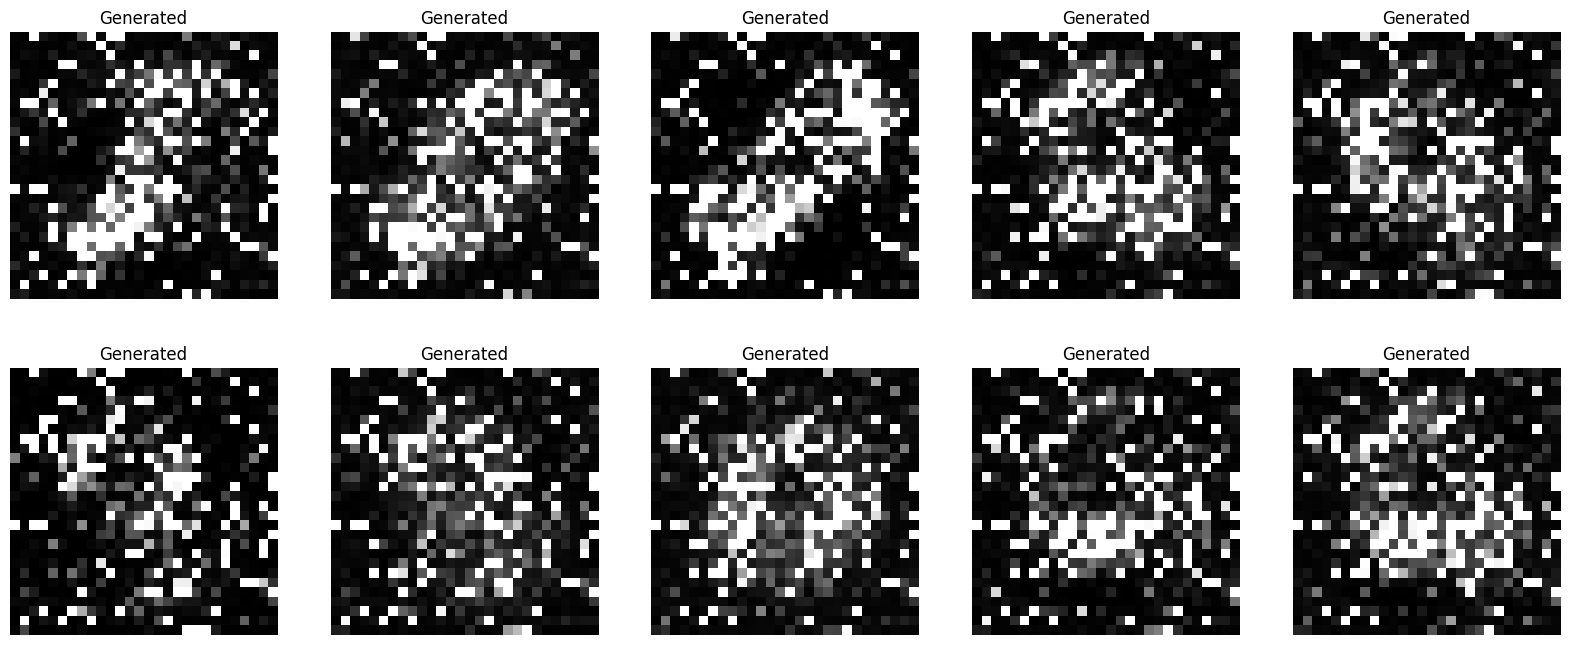

Epoch [67/100]
Loss D 0.0158
Loss G 5.5206


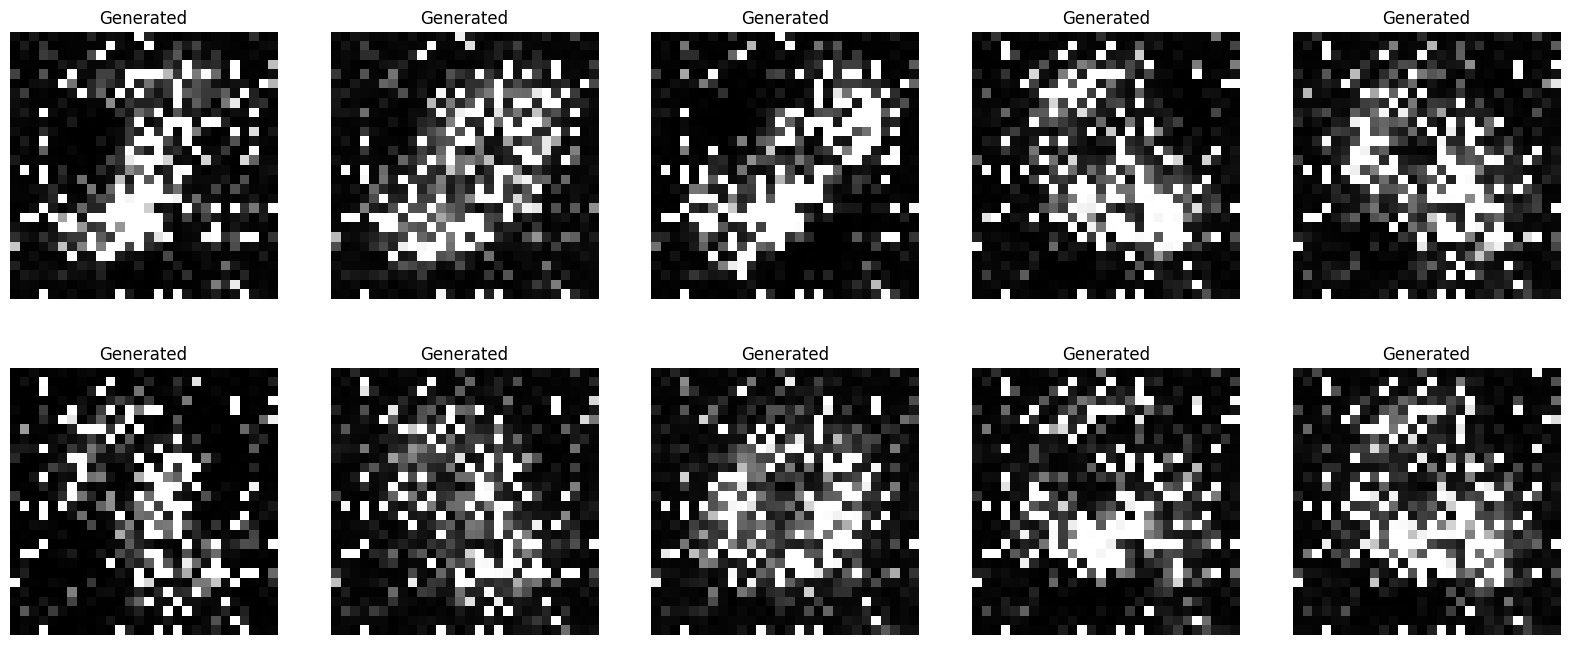

Epoch [68/100]
Loss D 0.0211
Loss G 5.1258


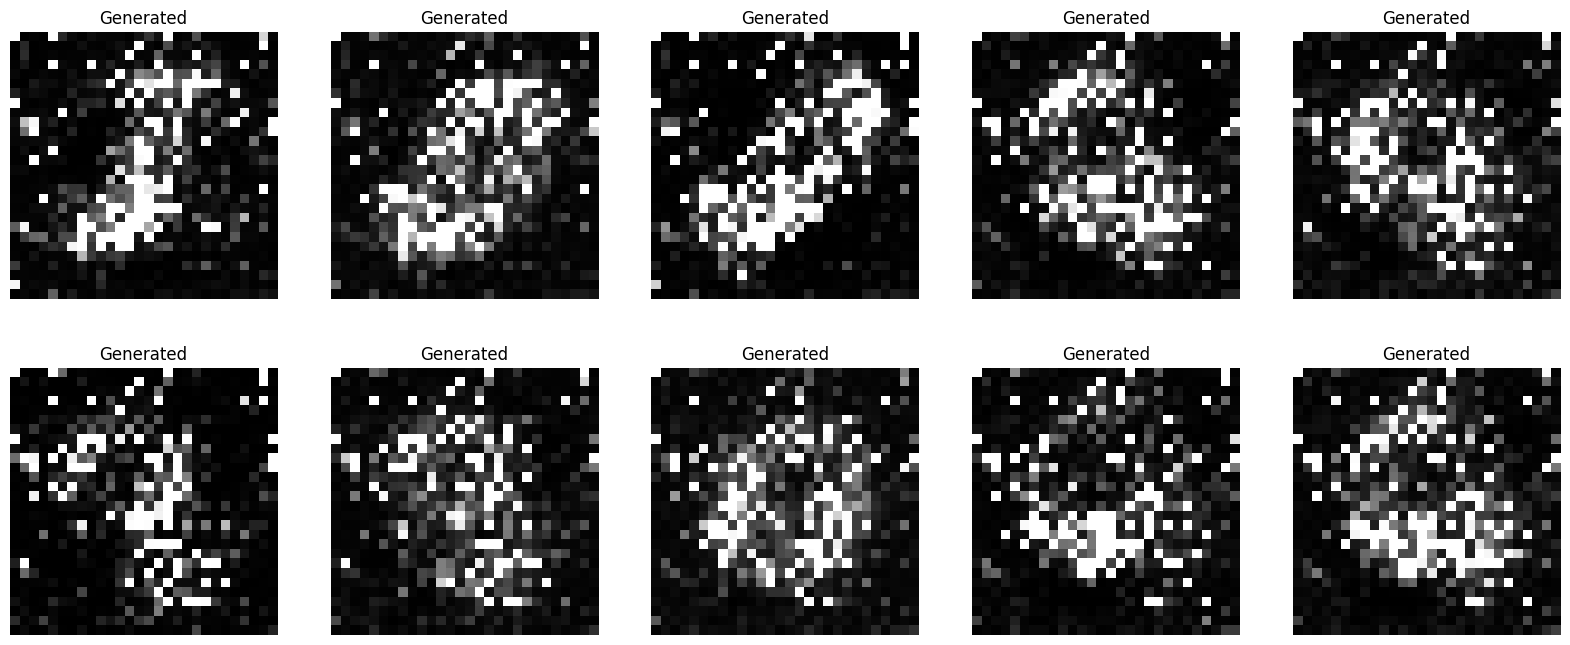

Epoch [69/100]
Loss D 0.0563
Loss G 4.7463


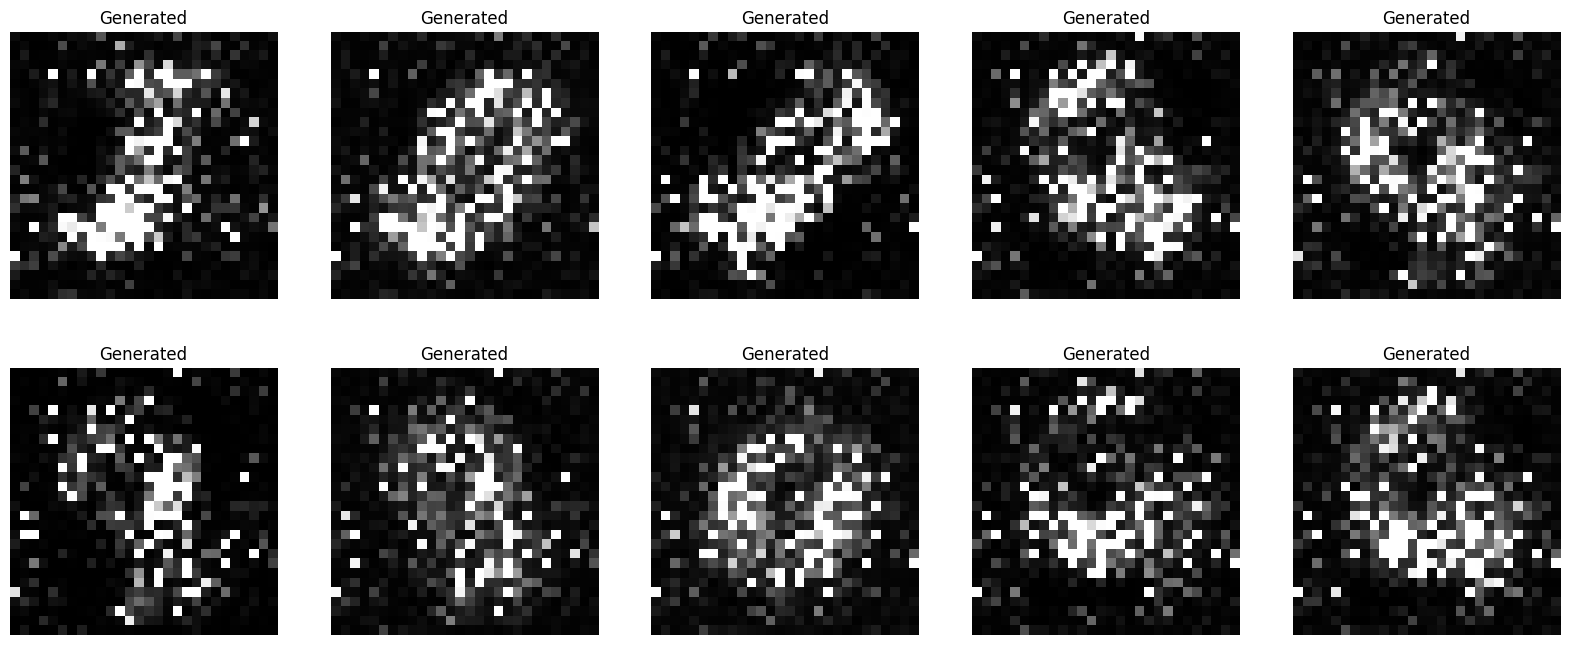

Epoch [70/100]
Loss D 0.0715
Loss G 4.5599


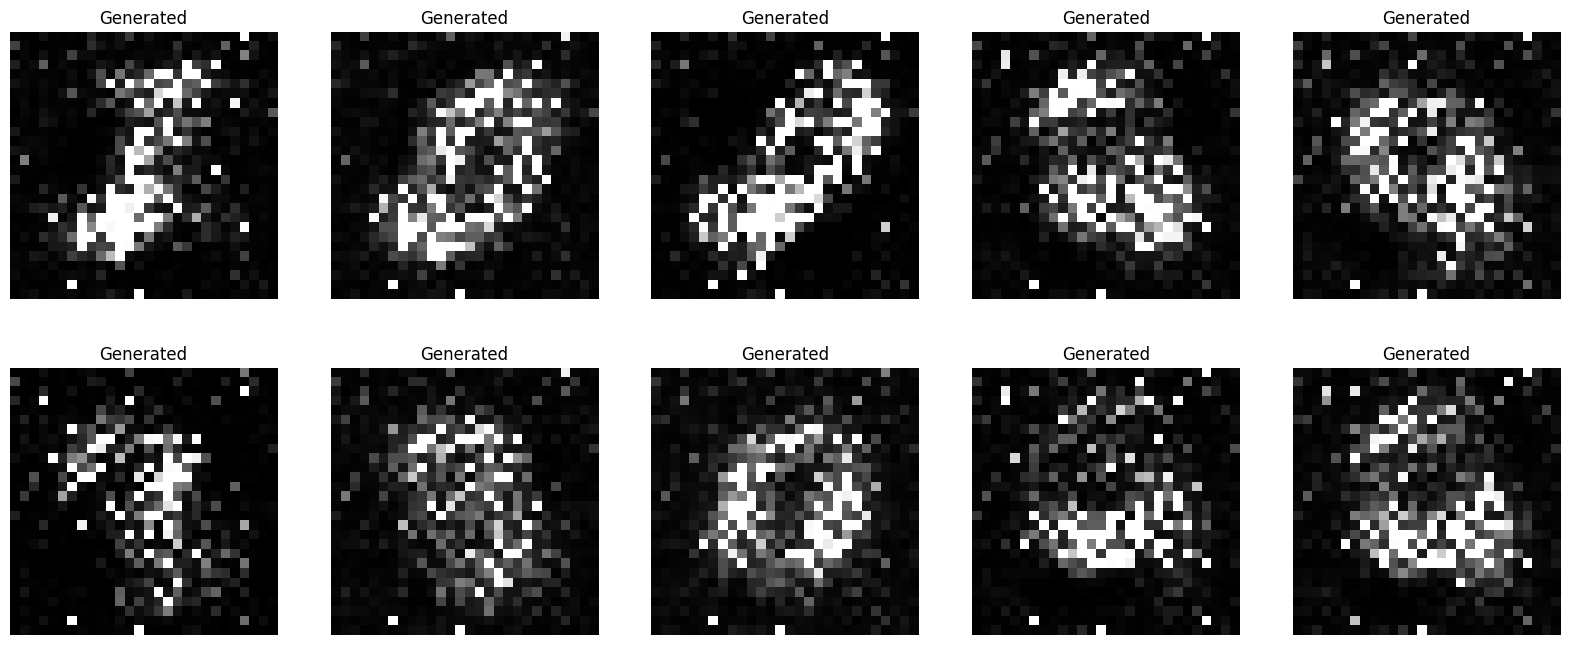

Epoch [71/100]
Loss D 0.1512
Loss G 3.5404


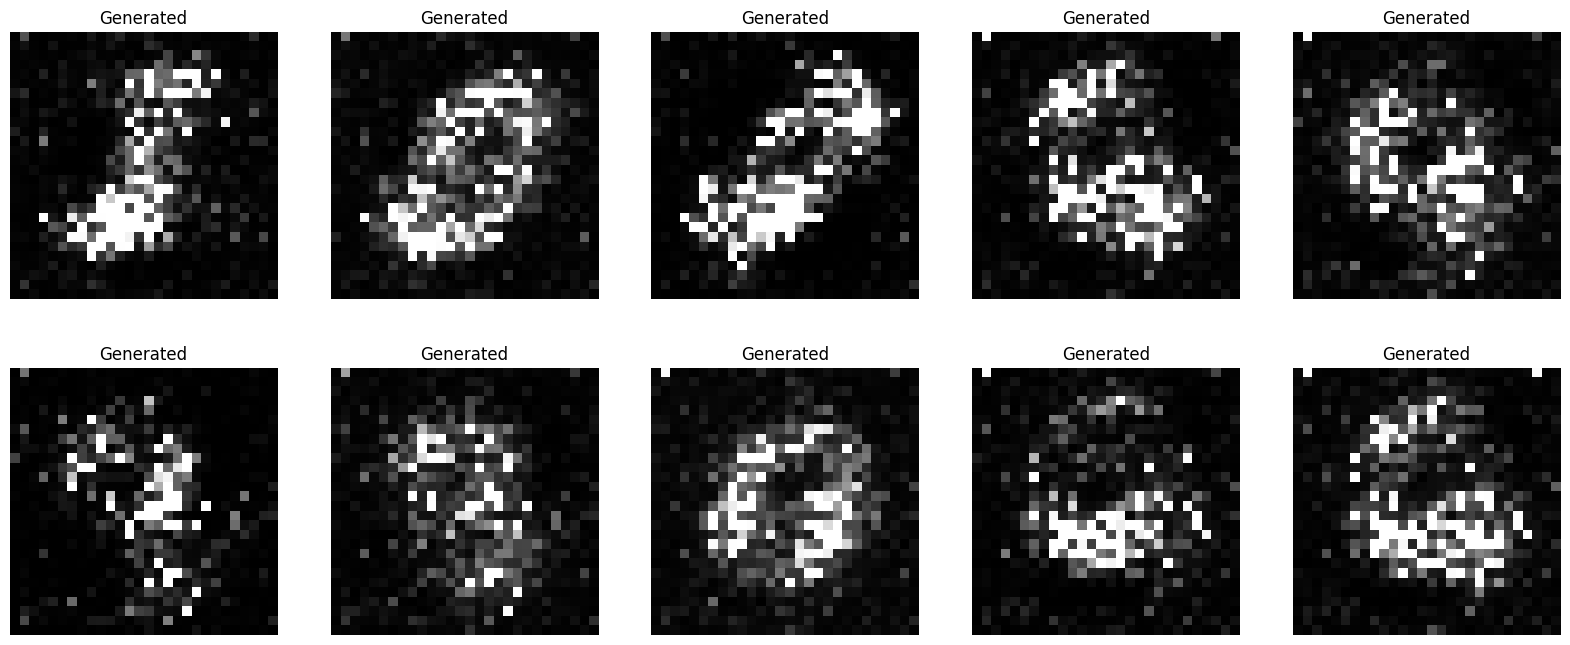

Epoch [72/100]
Loss D 0.2246
Loss G 2.7280


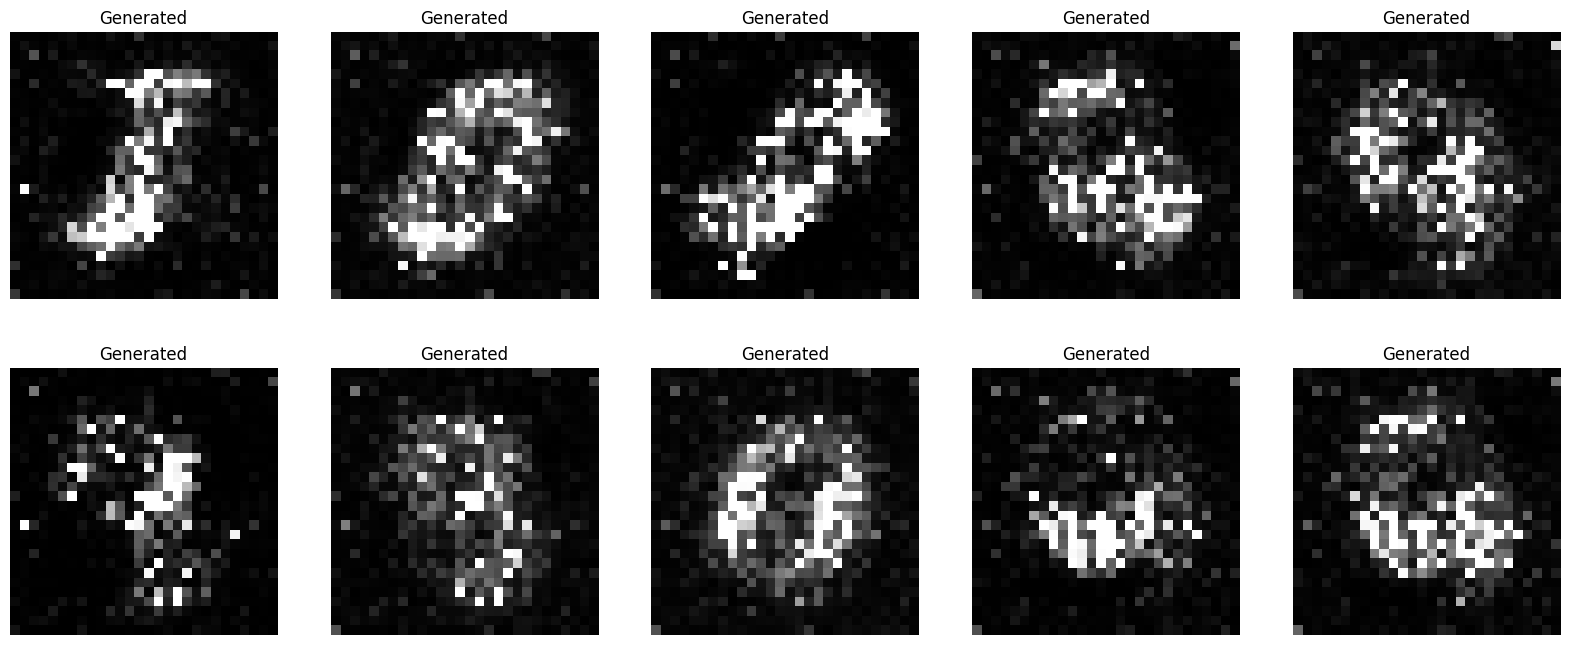

Epoch [73/100]
Loss D 0.3137
Loss G 2.3935


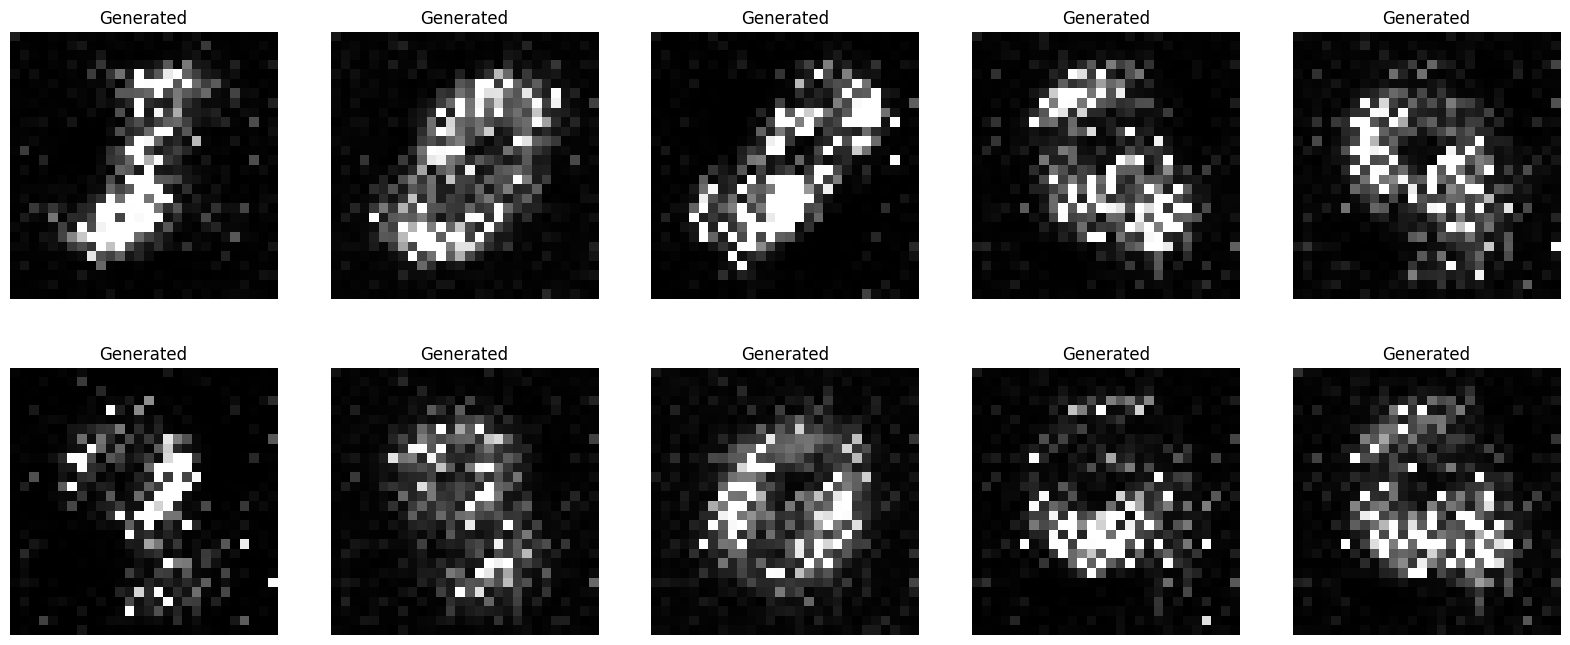

Epoch [74/100]
Loss D 0.3744
Loss G 2.2513


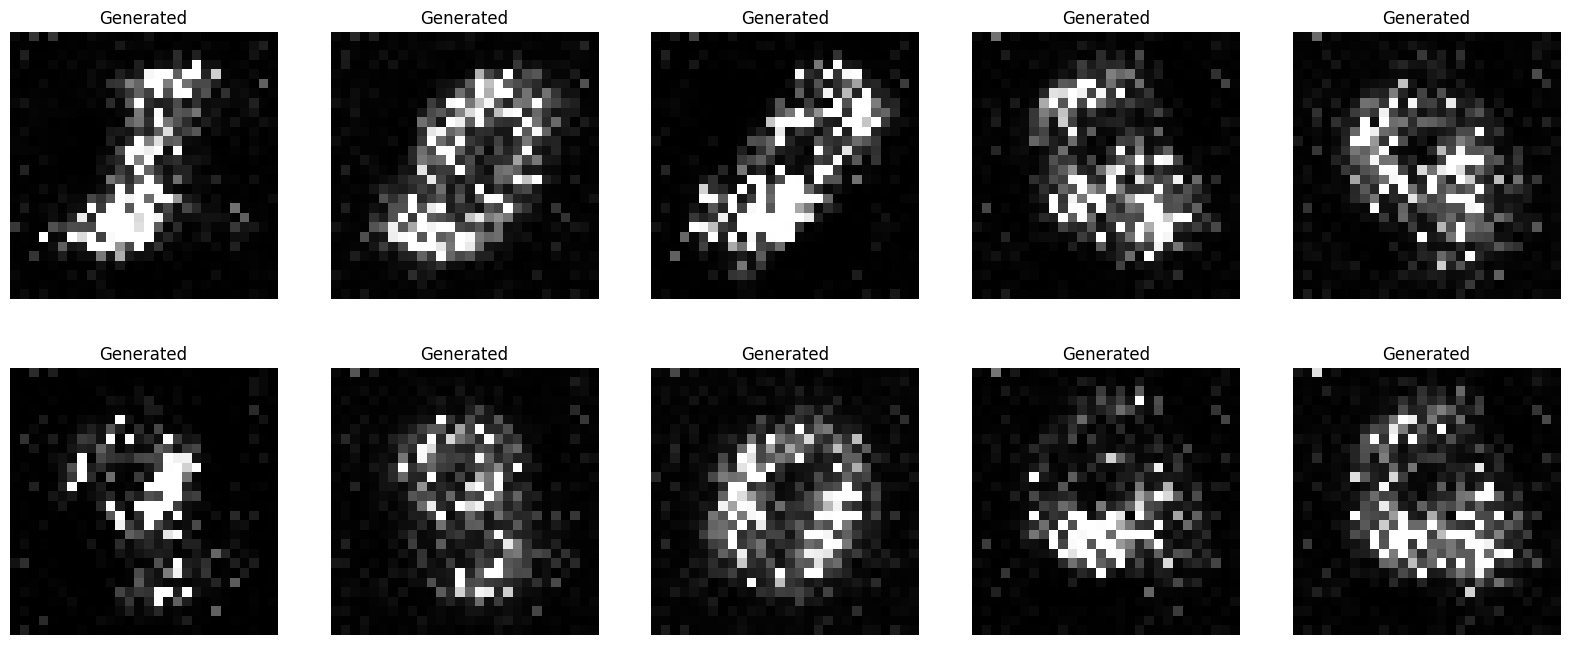

Epoch [75/100]
Loss D 0.3259
Loss G 2.2208


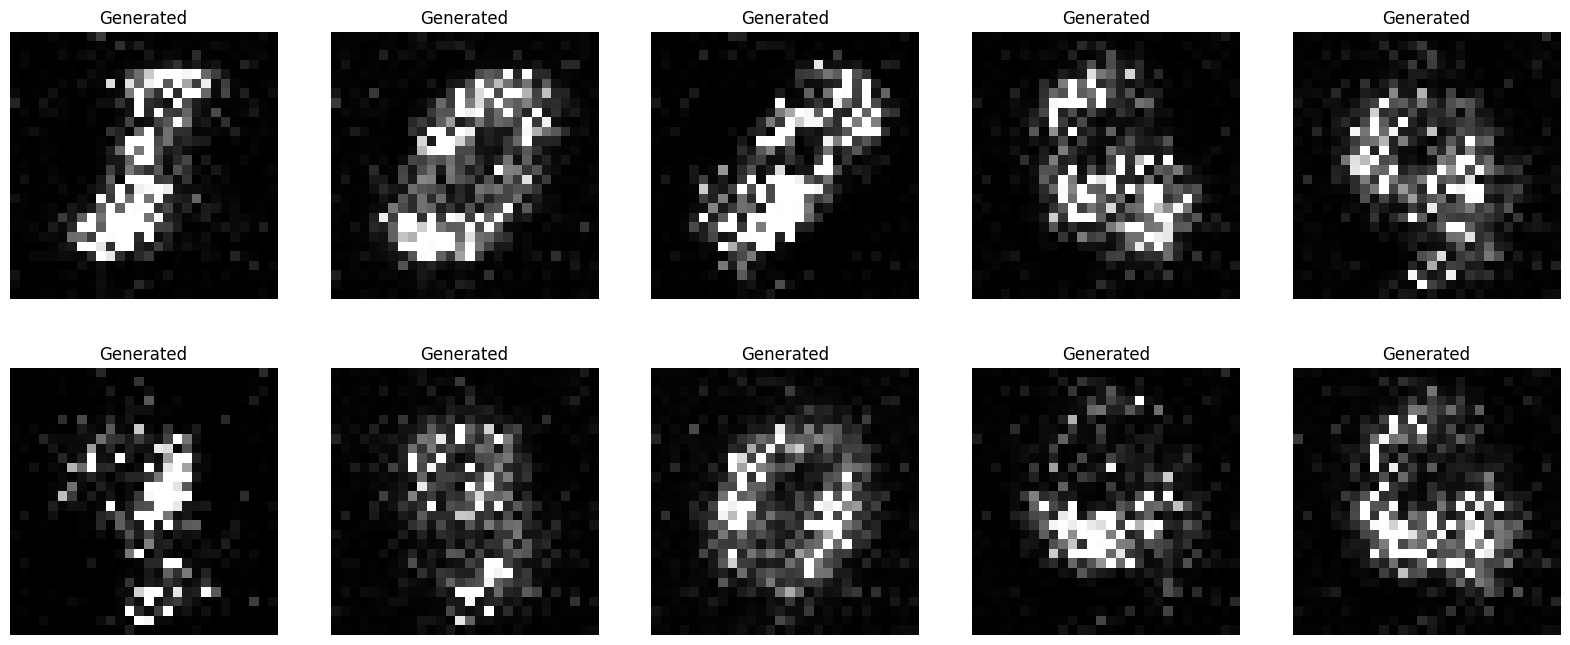

Epoch [76/100]
Loss D 0.5078
Loss G 1.9723


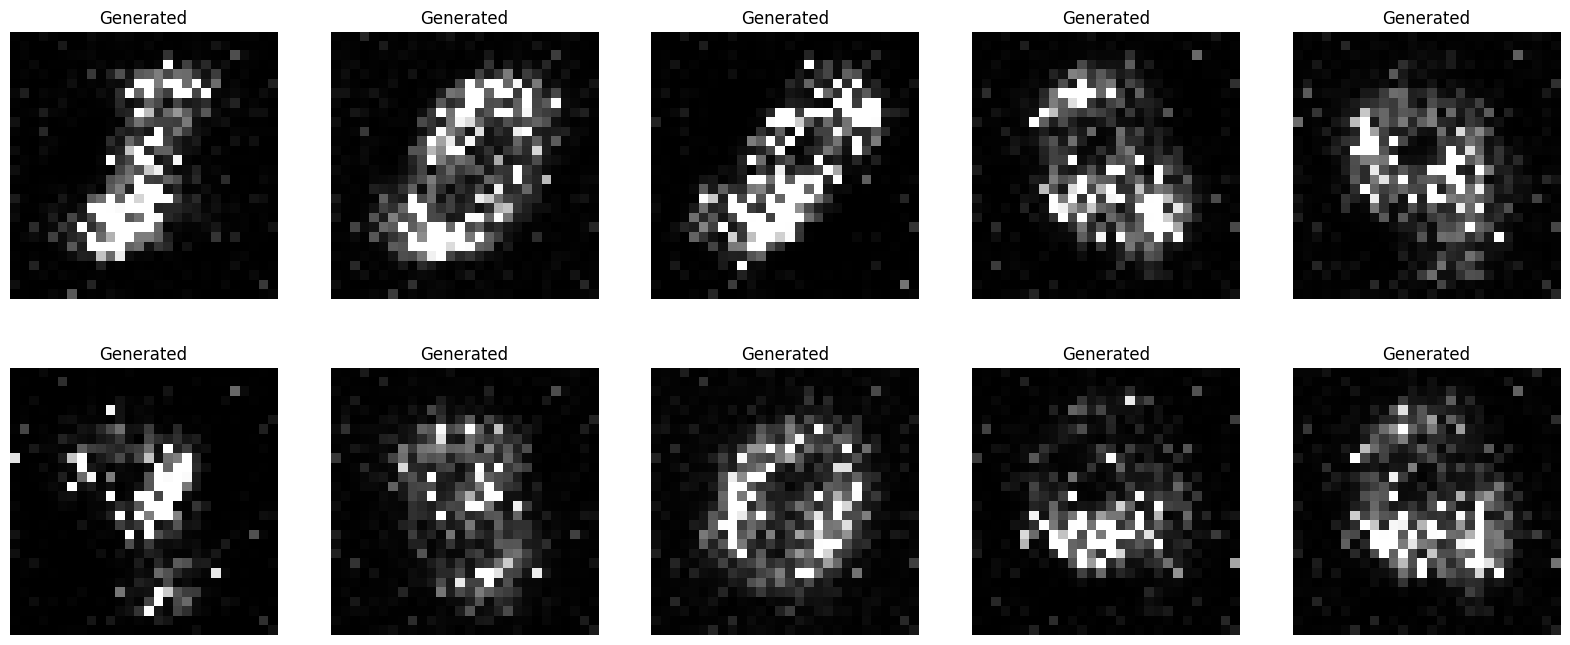

Epoch [77/100]
Loss D 0.4238
Loss G 2.2931


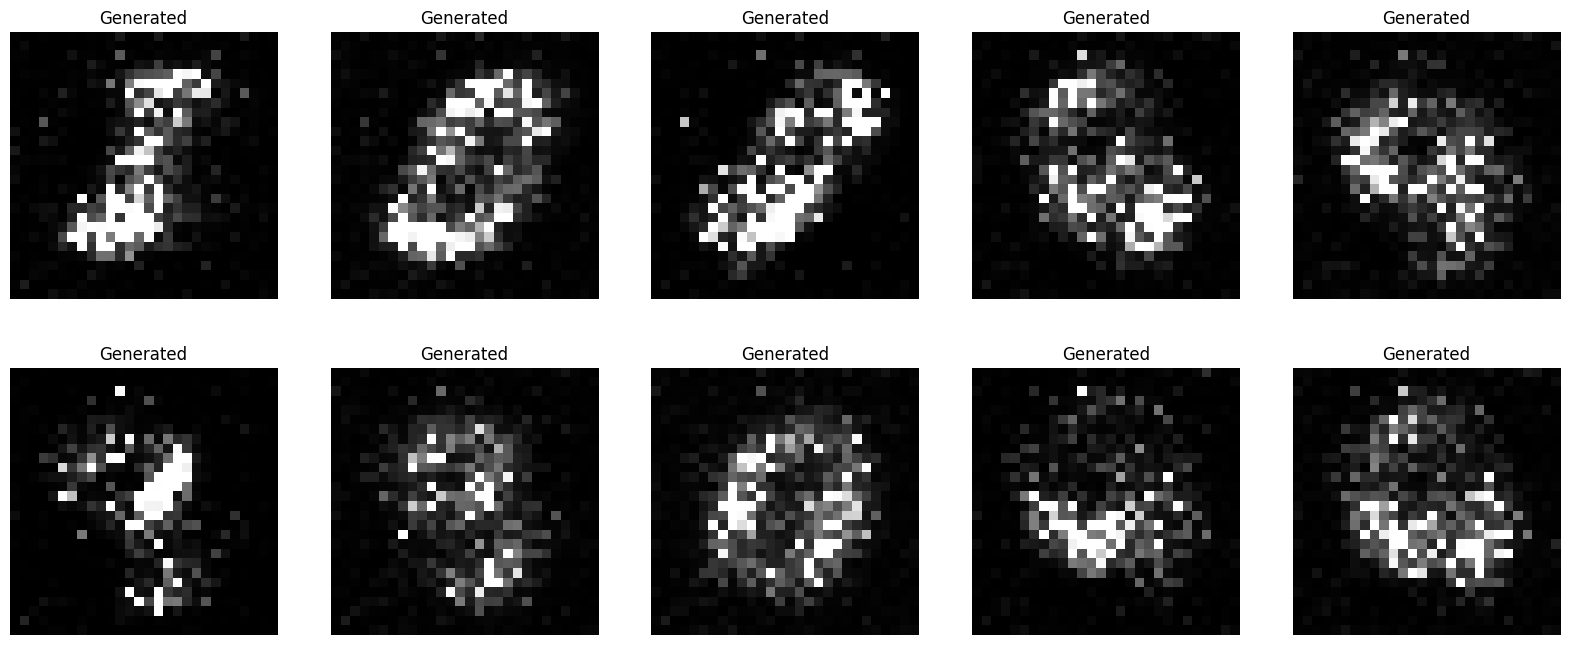

Epoch [78/100]
Loss D 0.4851
Loss G 2.0594


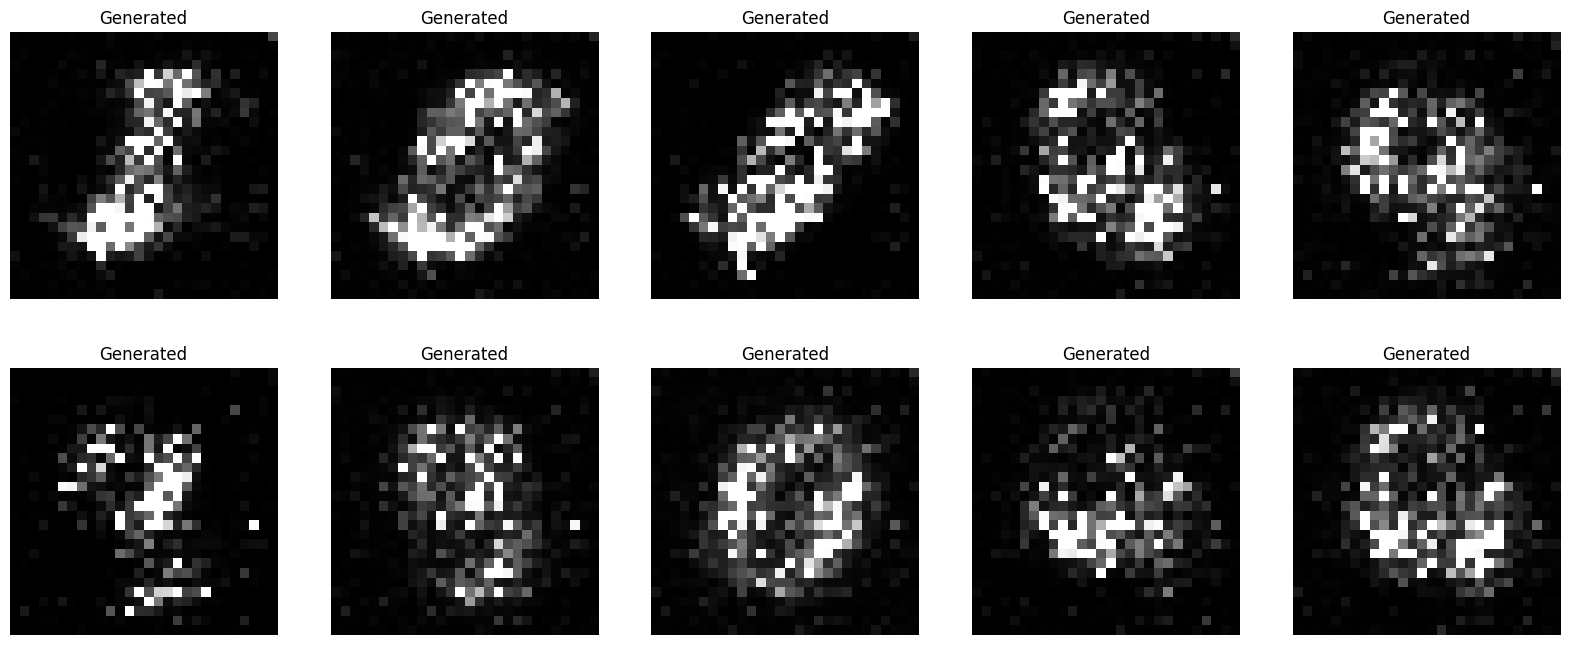

Epoch [79/100]
Loss D 0.4045
Loss G 1.8979


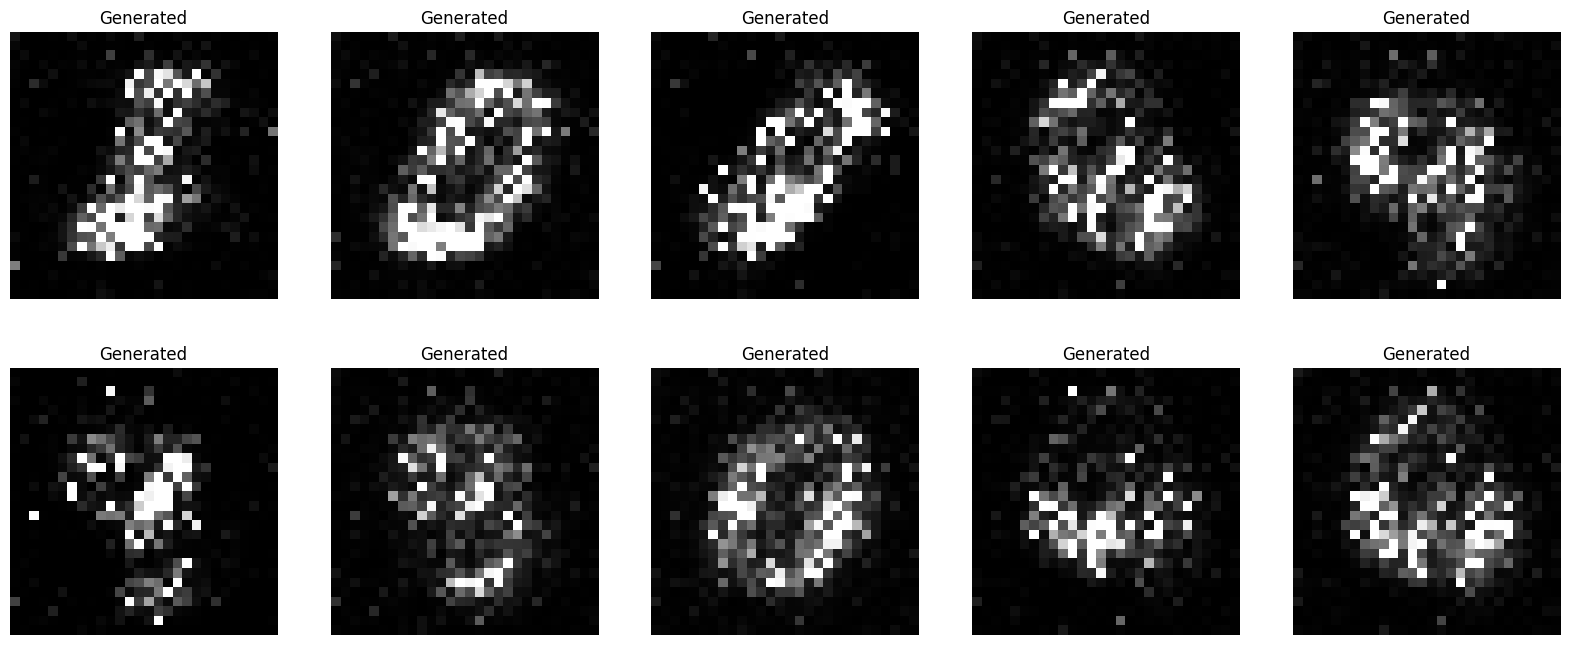

Epoch [80/100]
Loss D 0.3449
Loss G 2.0291


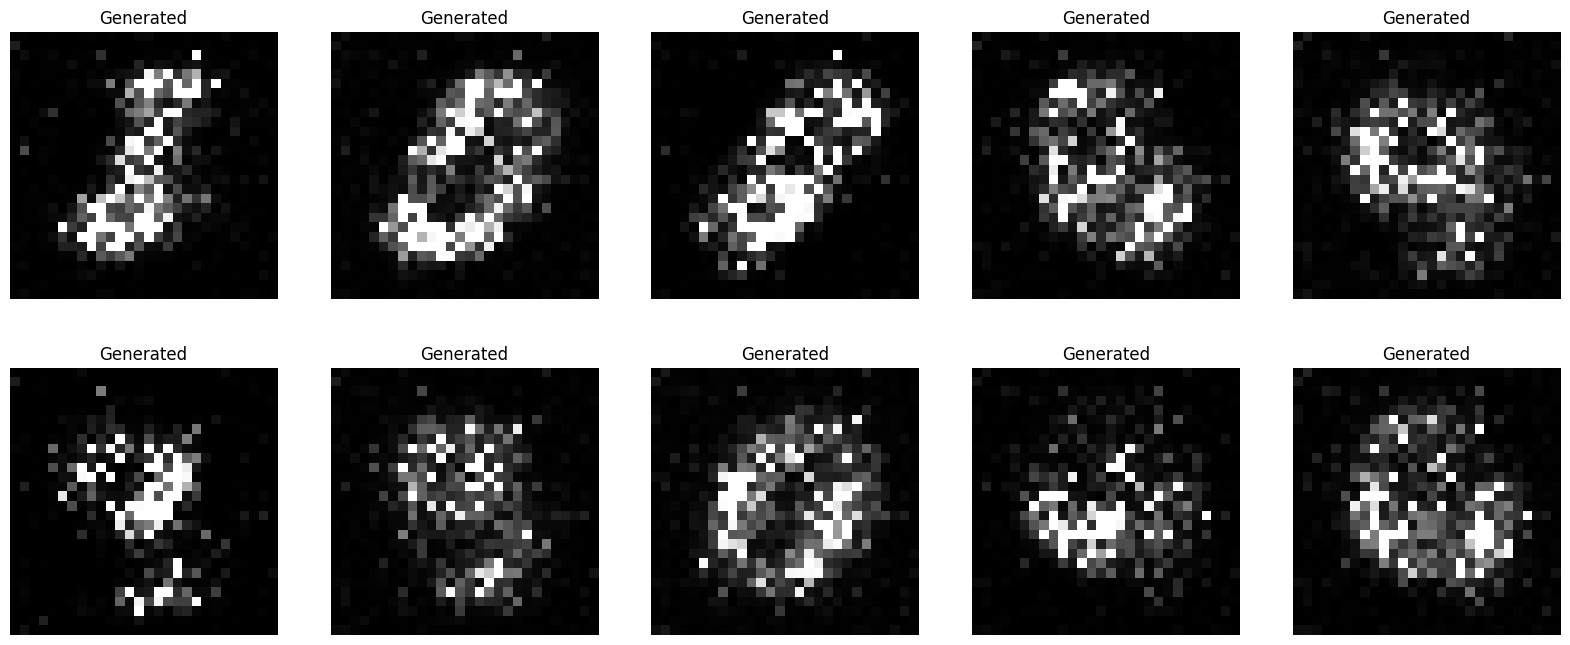

Epoch [81/100]
Loss D 0.4662
Loss G 2.0149


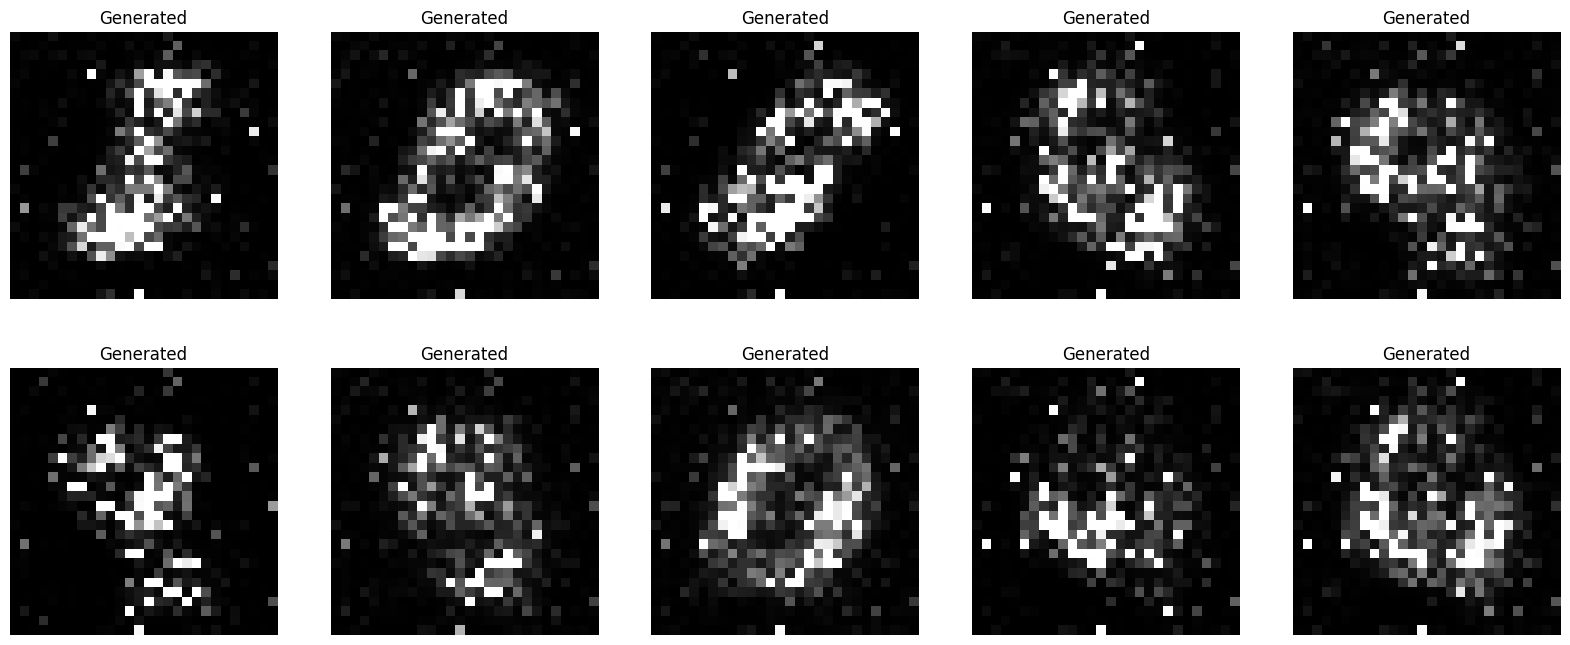

Epoch [82/100]
Loss D 0.3538
Loss G 1.9815


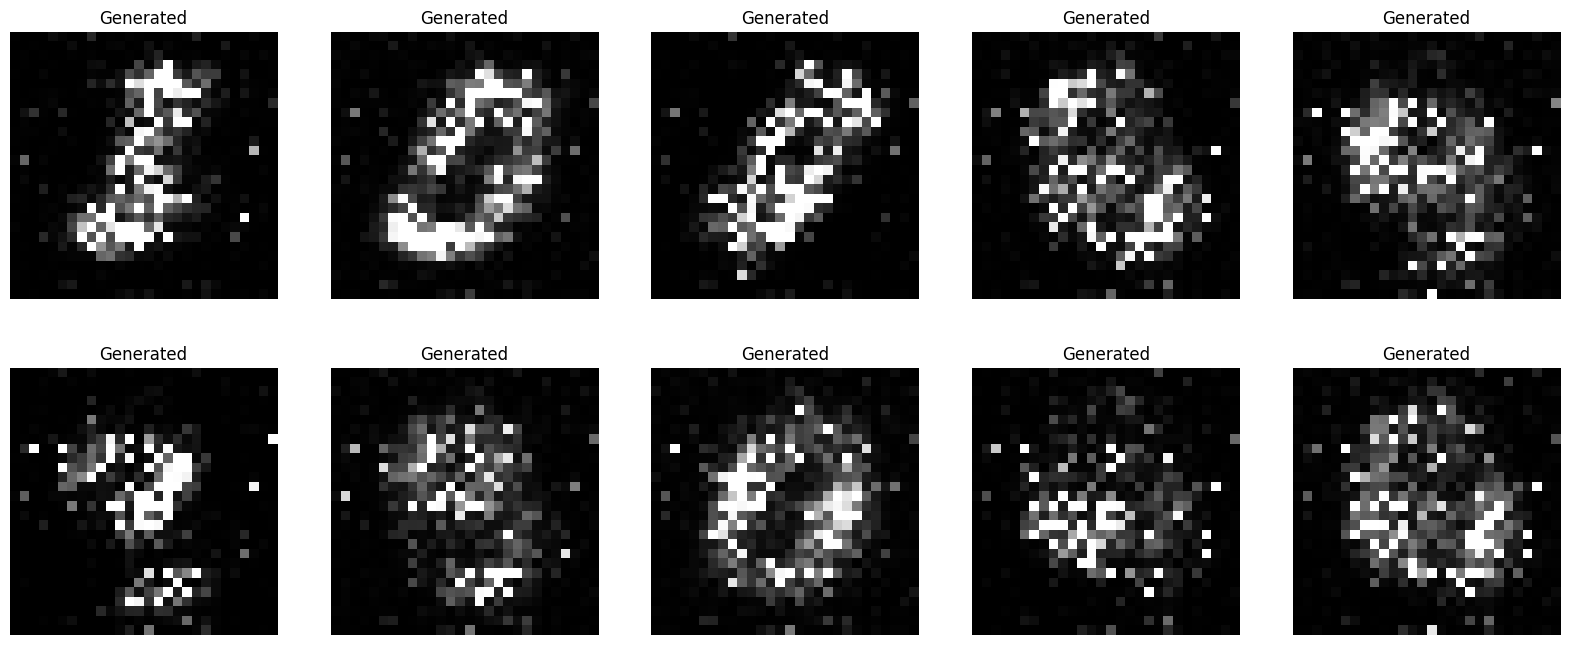

Epoch [83/100]
Loss D 0.3000
Loss G 2.1487


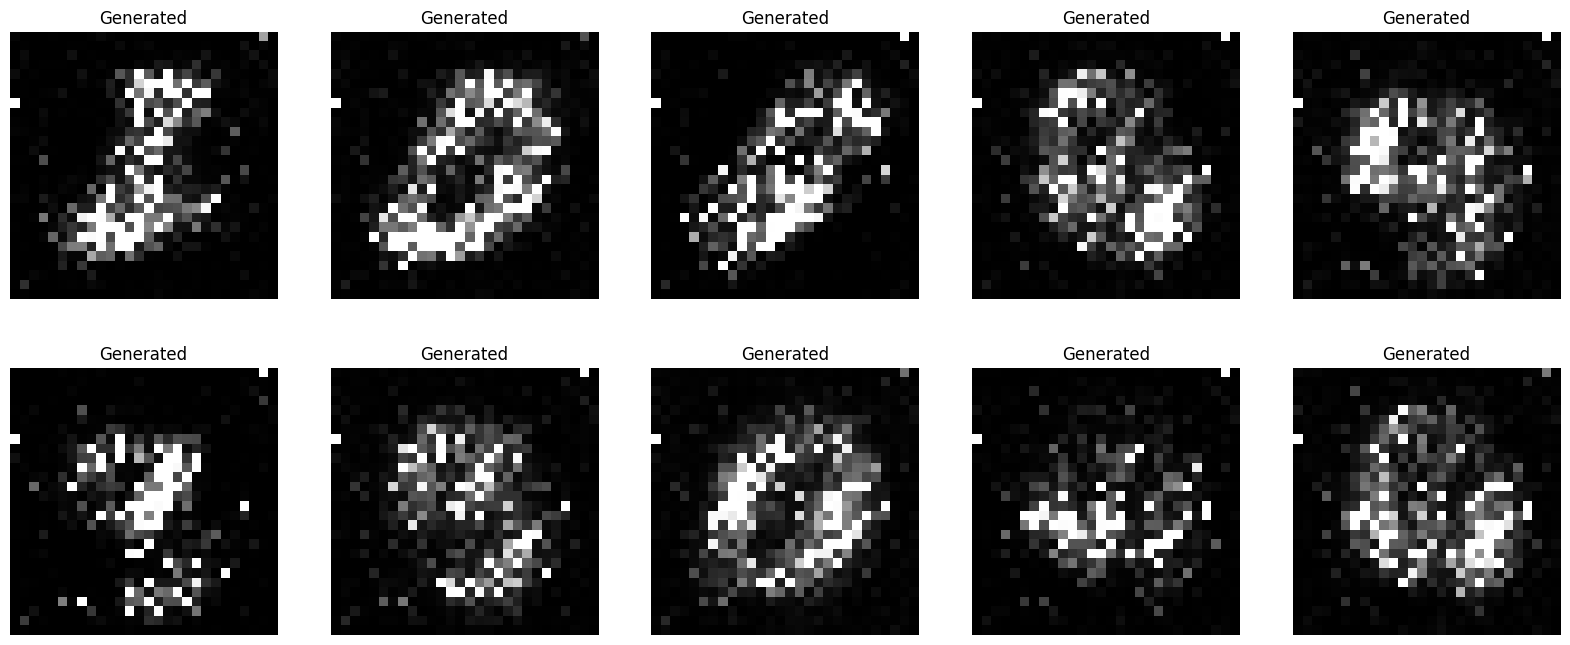

Epoch [84/100]
Loss D 0.1774
Loss G 2.9588


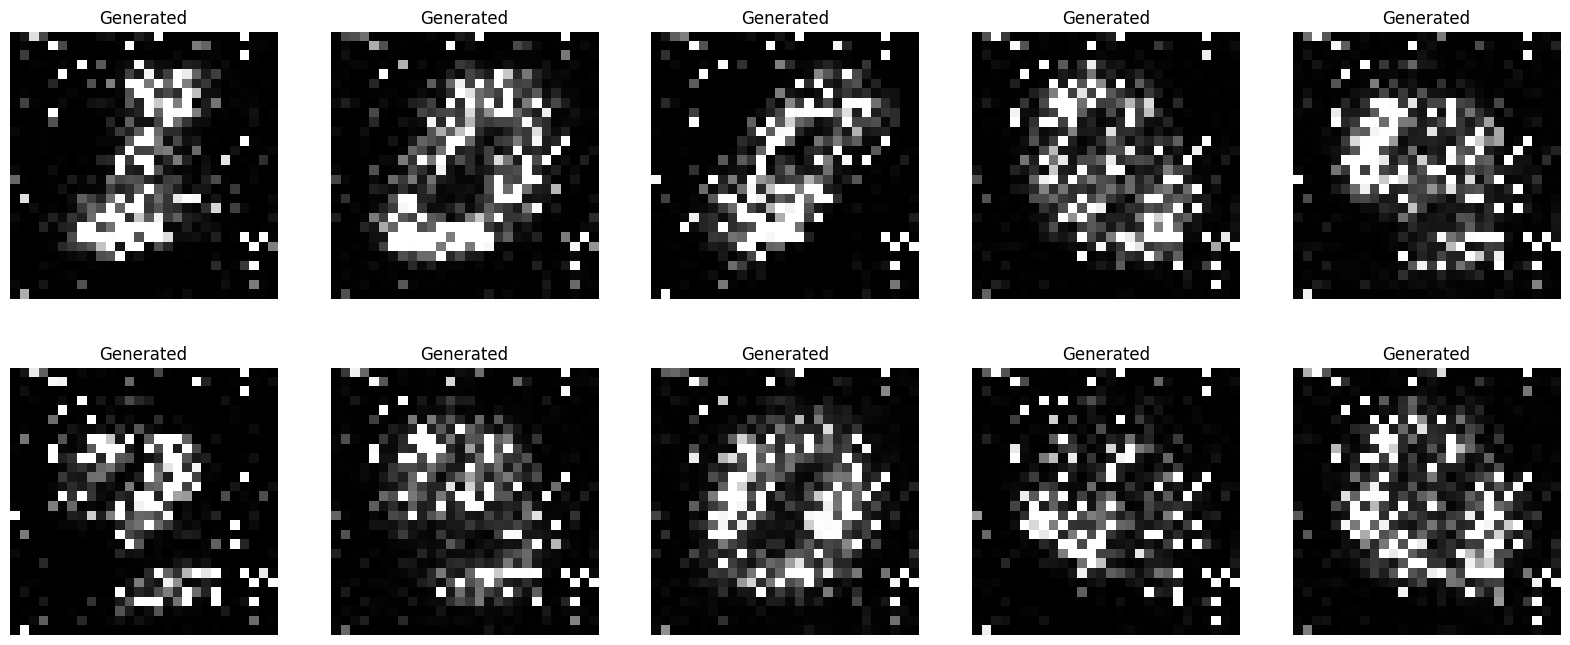

Epoch [85/100]
Loss D 0.1013
Loss G 4.1560


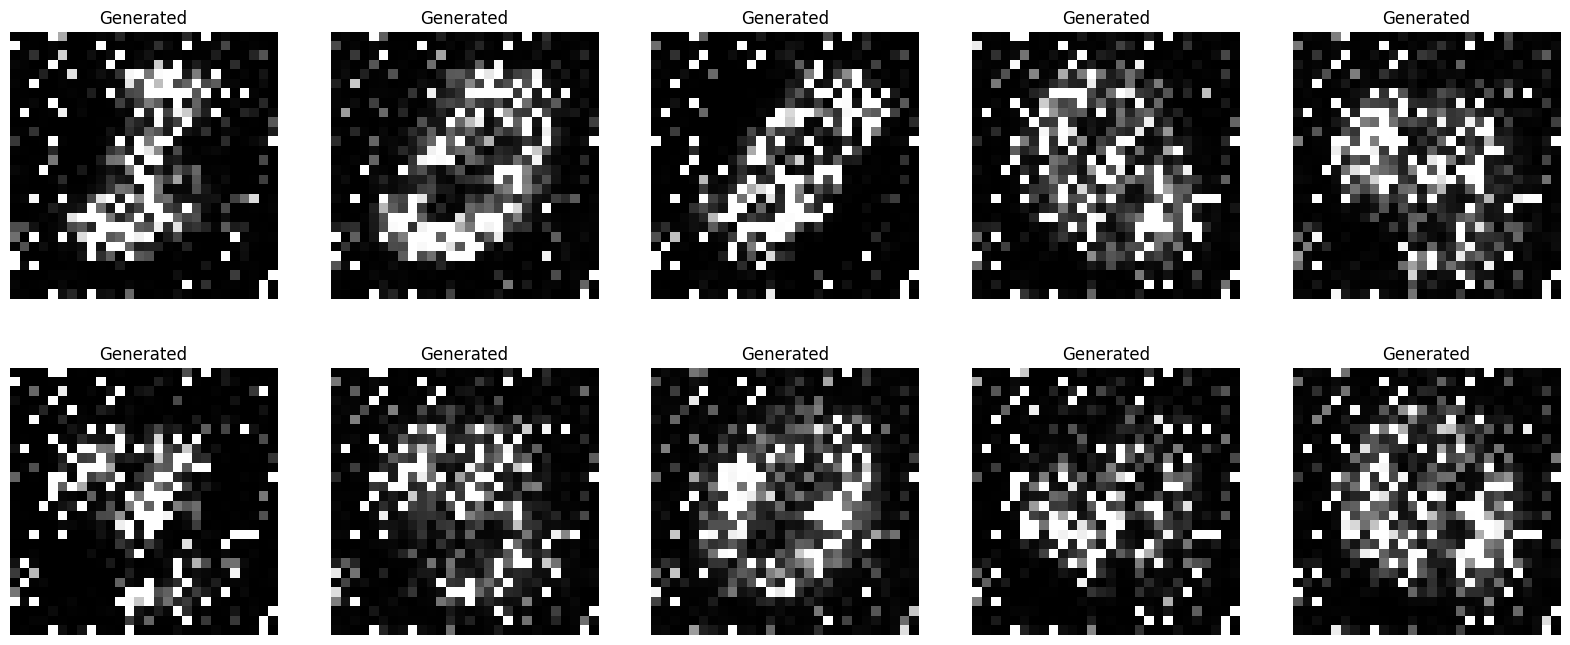

Epoch [86/100]
Loss D 0.0212
Loss G 4.7640


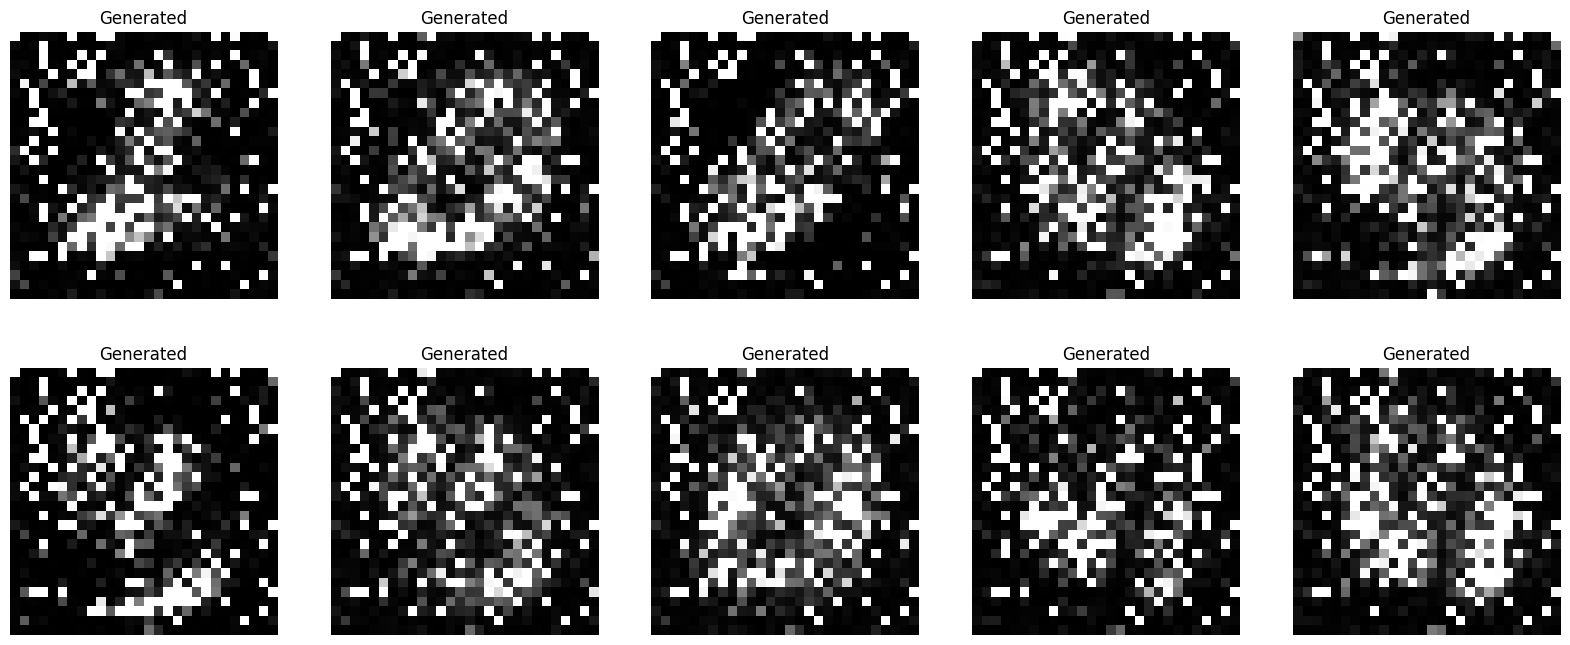

Epoch [87/100]
Loss D 0.0135
Loss G 5.6834


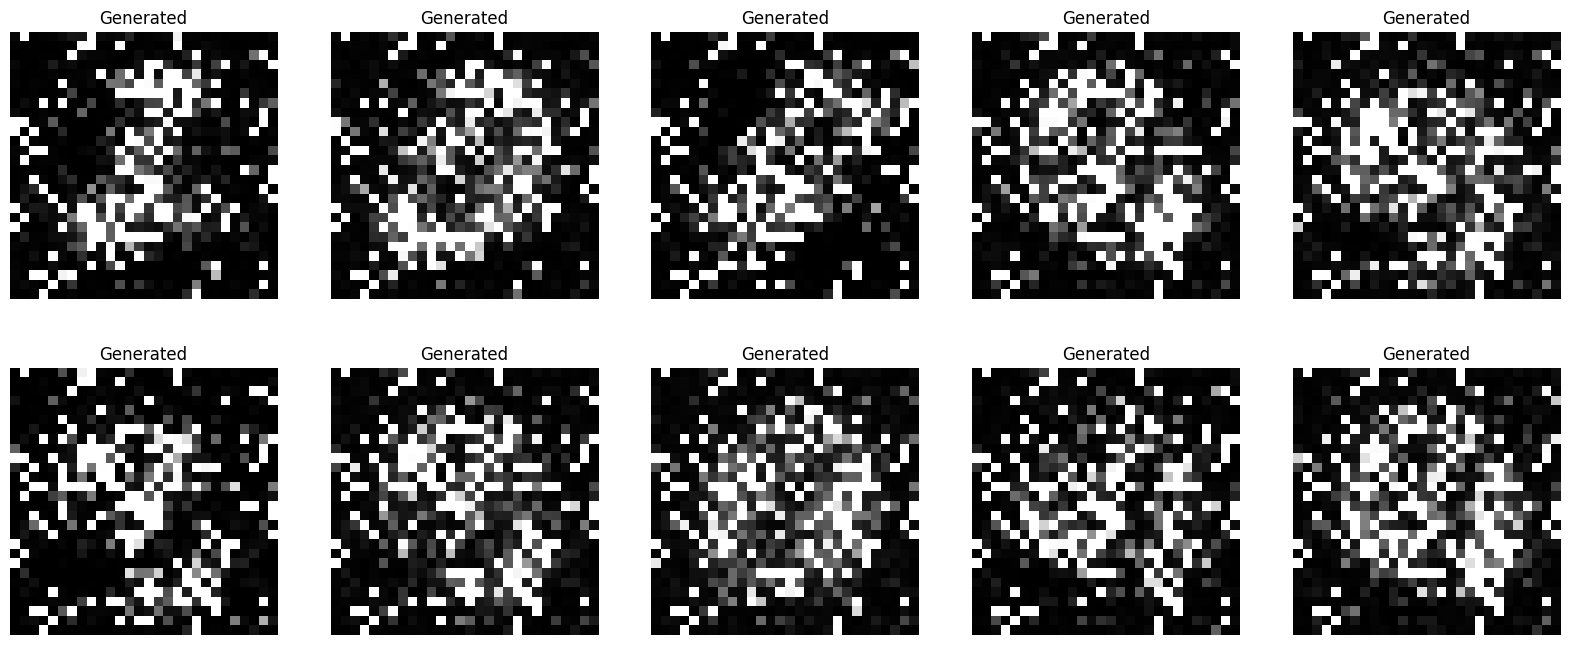

Epoch [88/100]
Loss D 0.0135
Loss G 5.4908


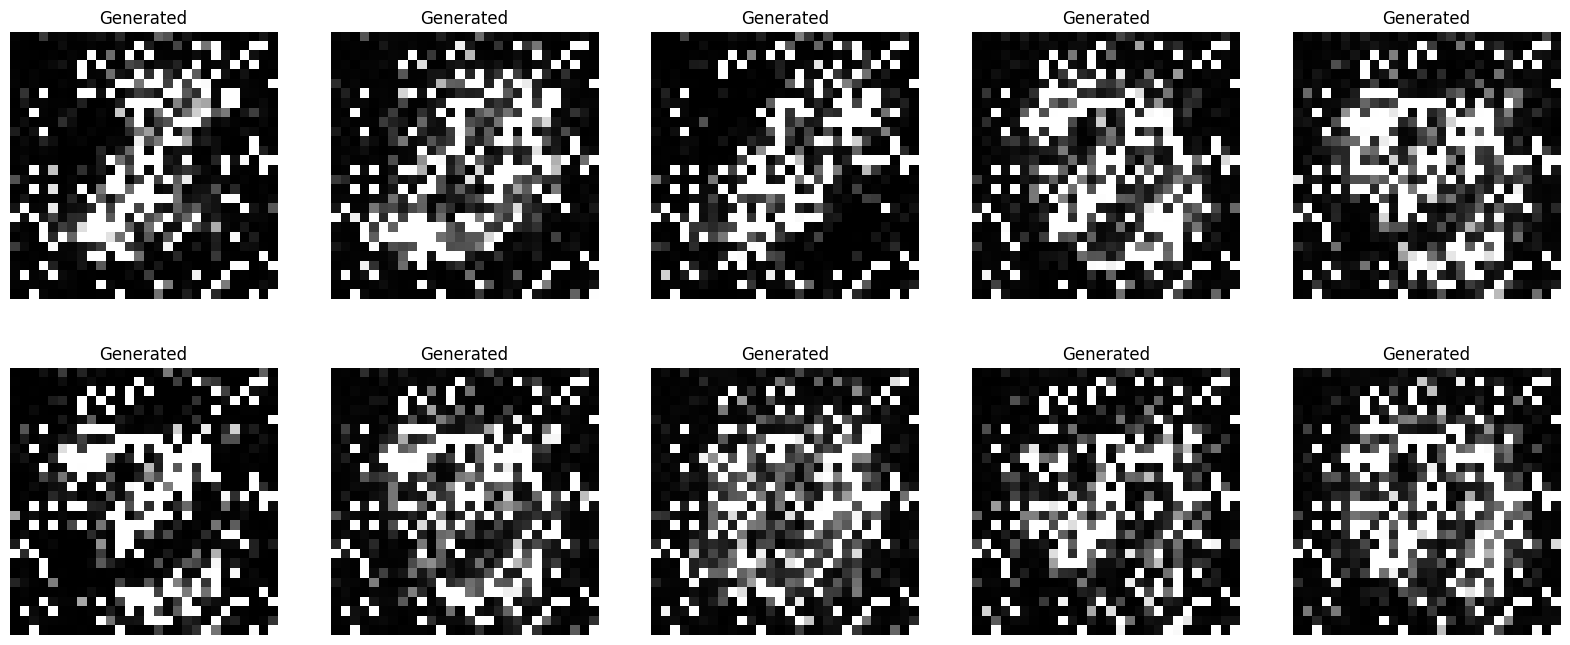

Epoch [89/100]
Loss D 0.0072
Loss G 6.1258


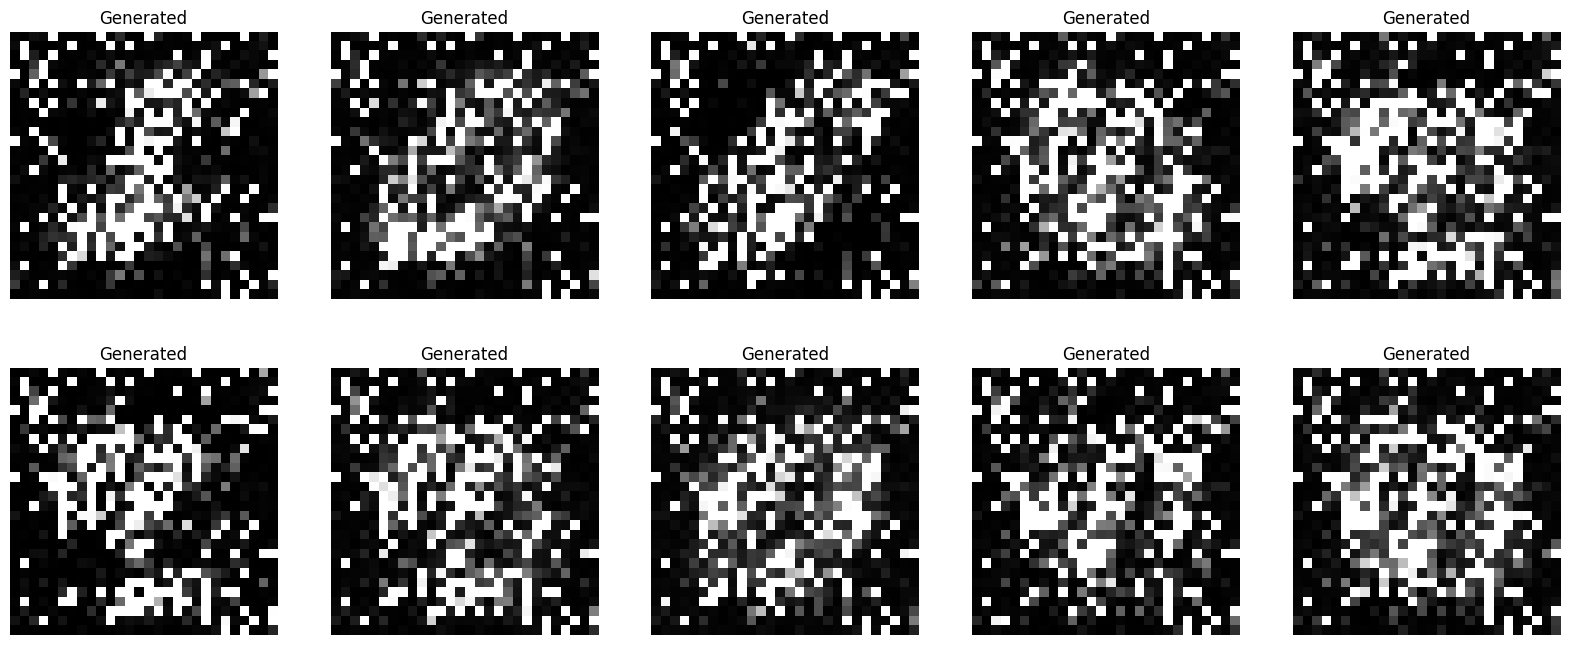

Epoch [90/100]
Loss D 0.0191
Loss G 6.2055


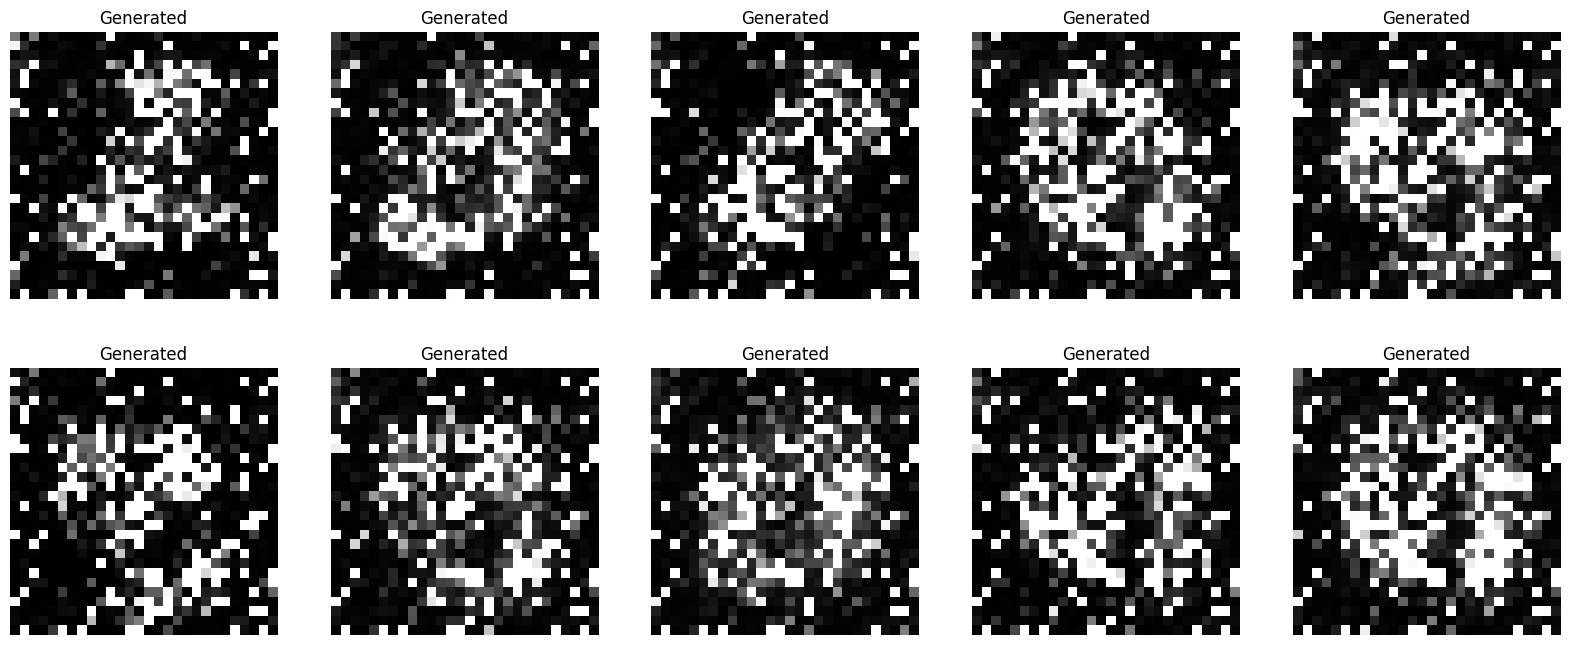

Epoch [91/100]
Loss D 0.0106
Loss G 5.9249


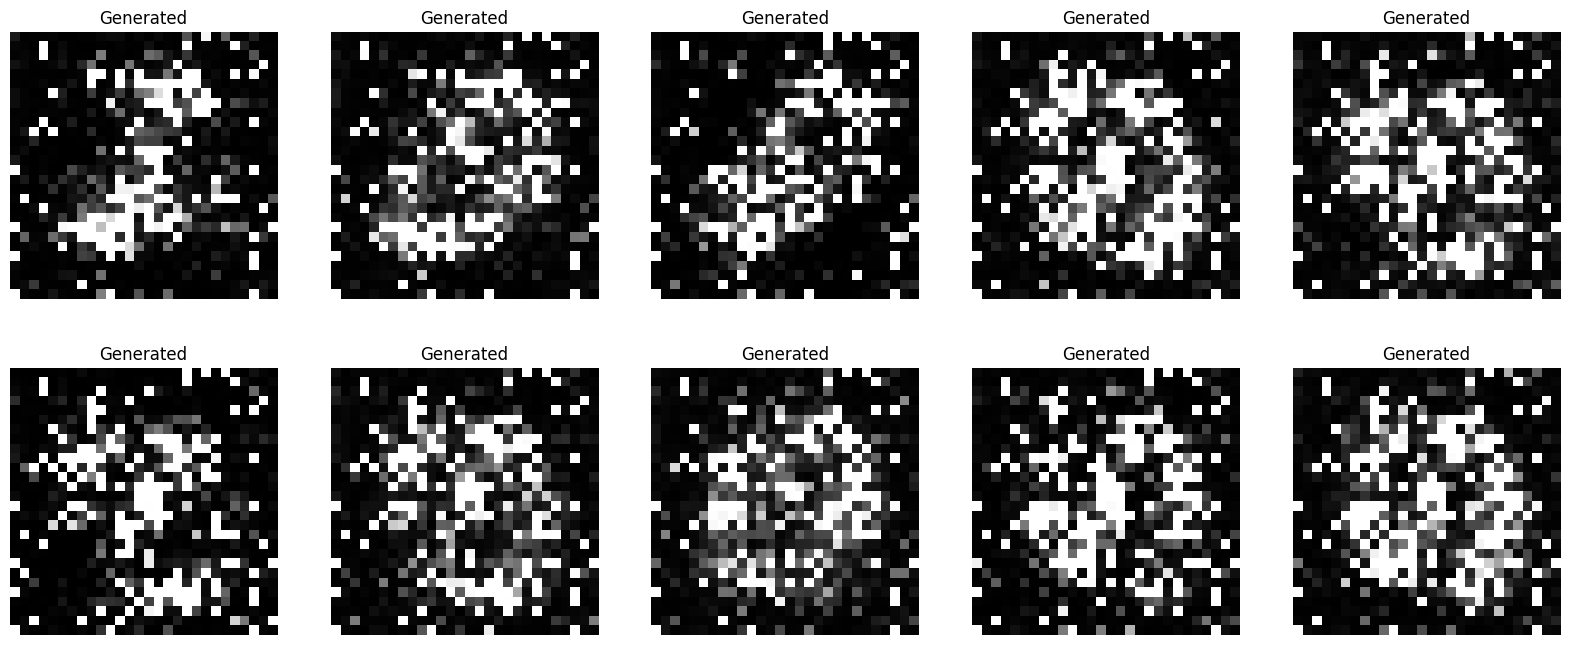

Epoch [92/100]
Loss D 0.0120
Loss G 5.2938


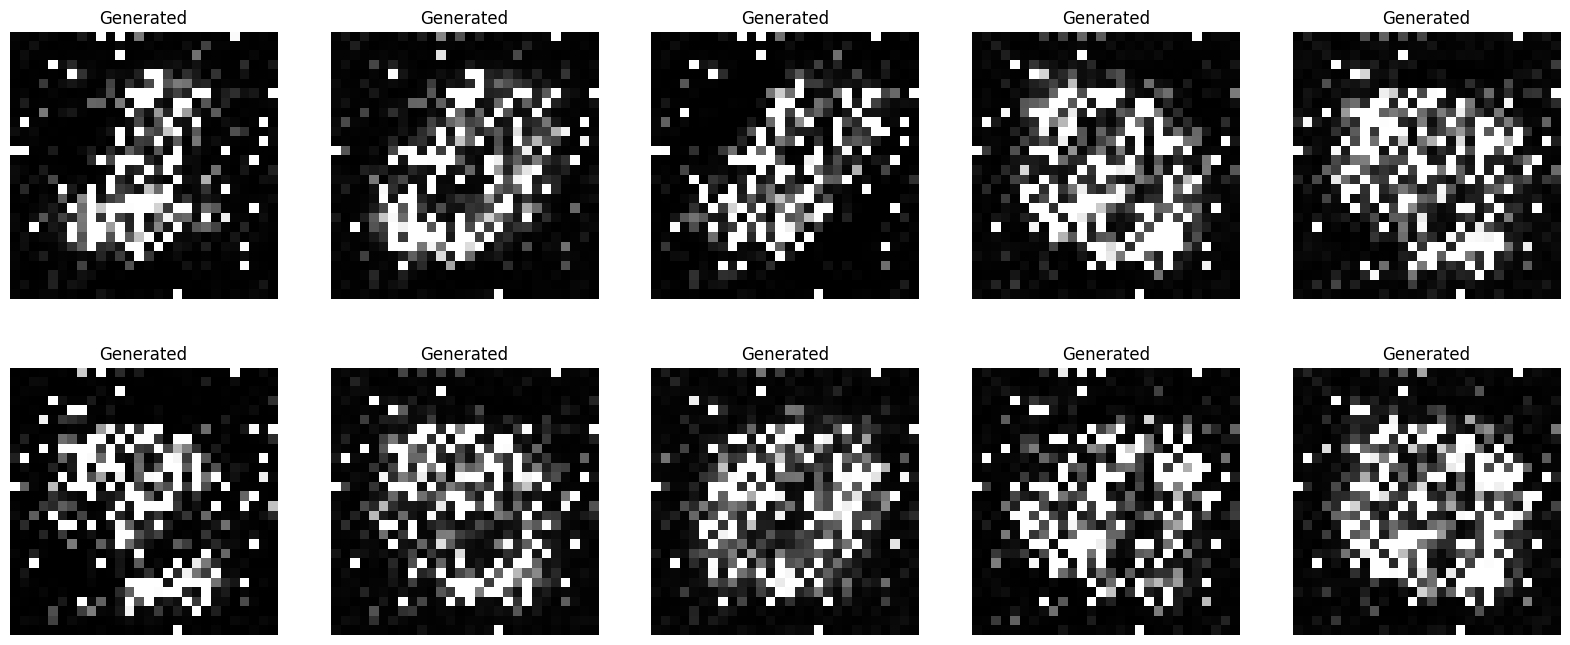

Epoch [93/100]
Loss D 0.0350
Loss G 4.7548


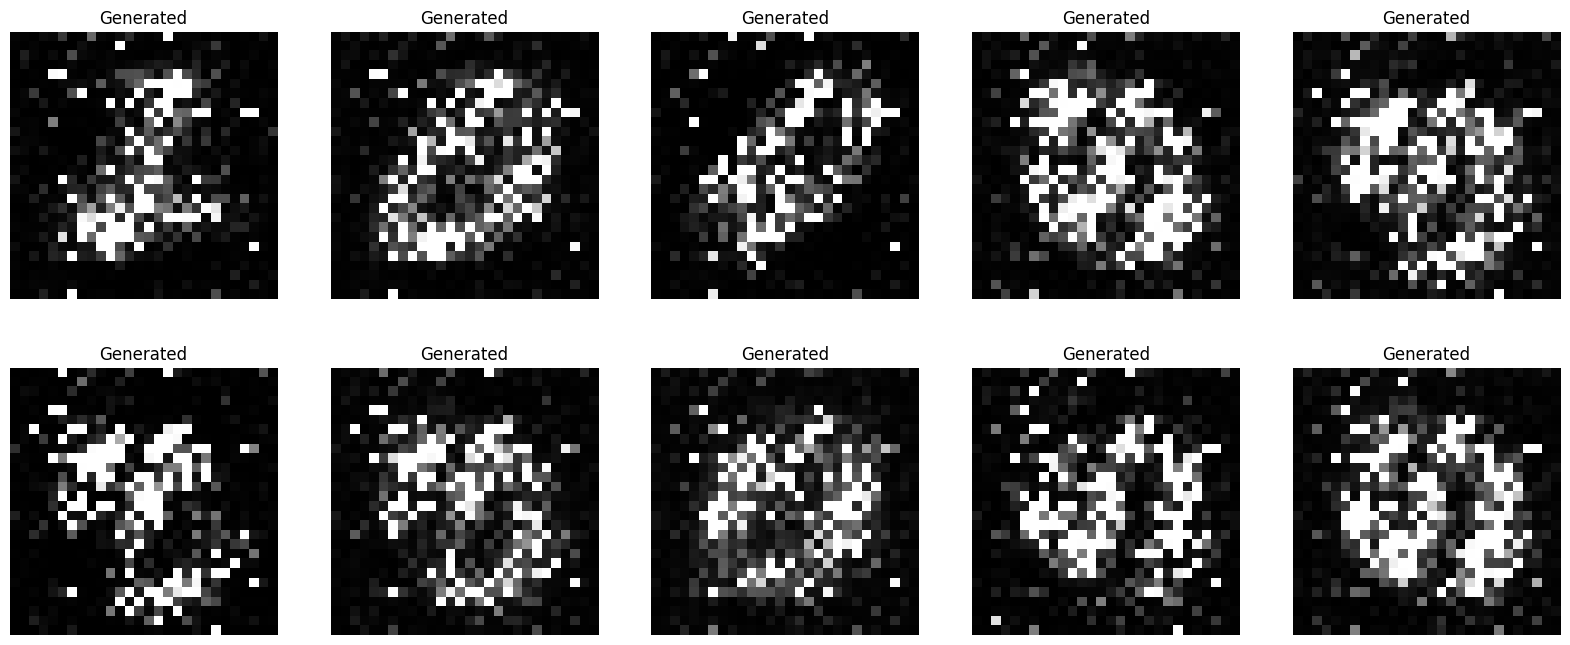

Epoch [94/100]
Loss D 0.0735
Loss G 5.0910


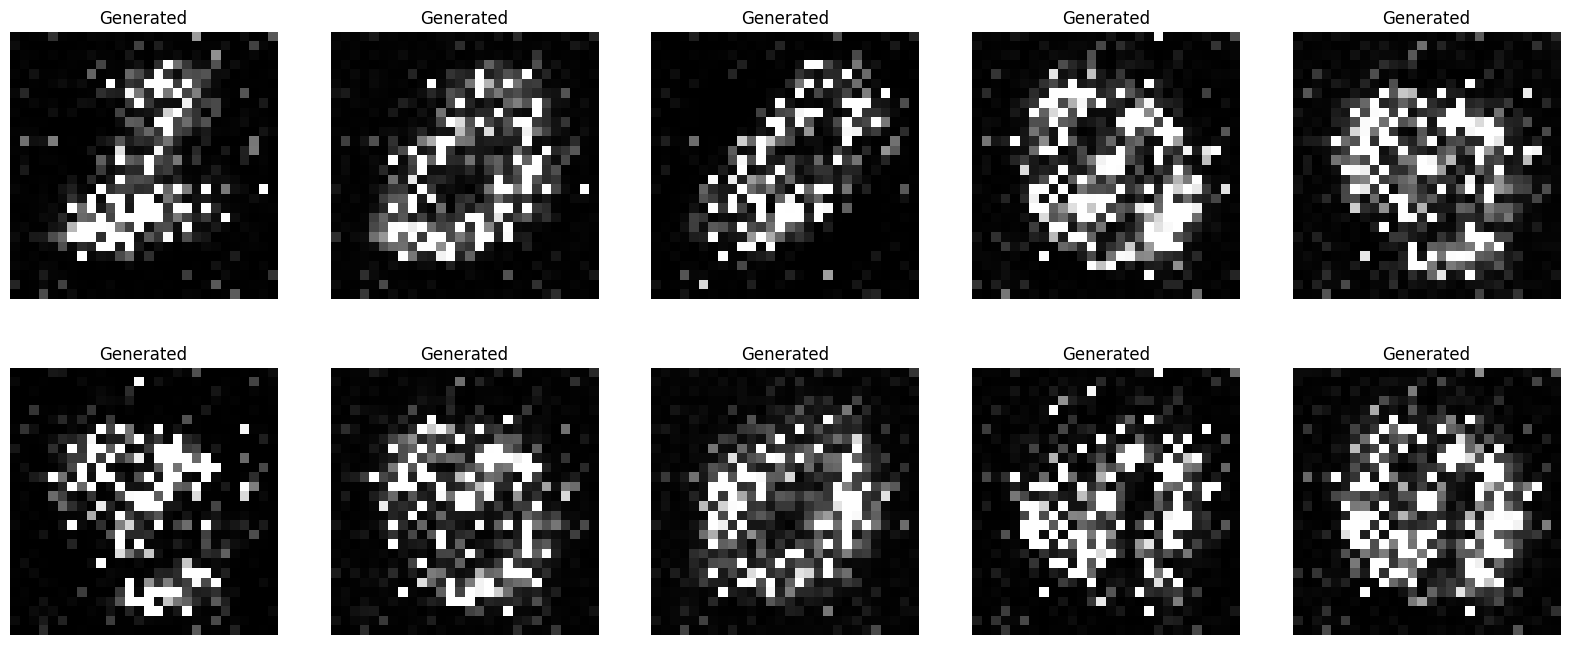

Epoch [95/100]
Loss D 0.1126
Loss G 4.6345


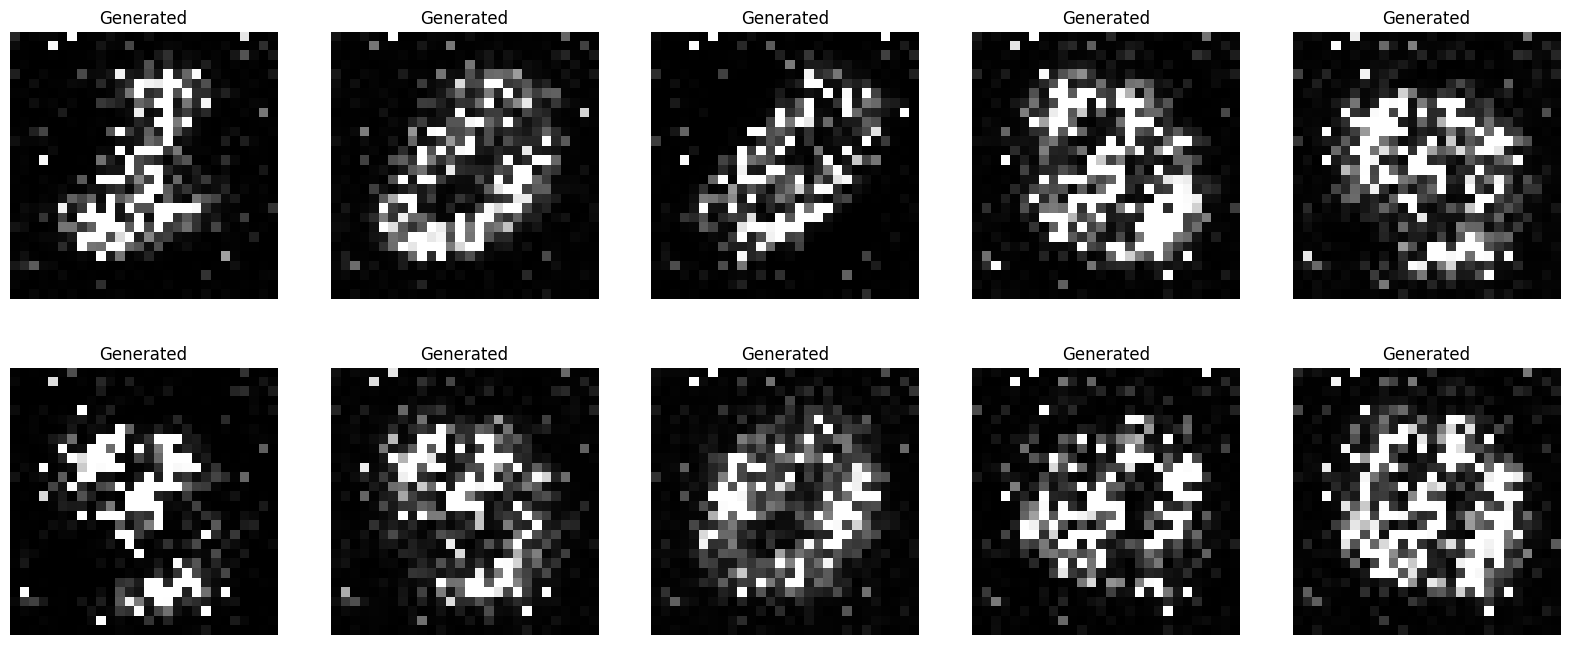

Epoch [96/100]
Loss D 0.2455
Loss G 4.0170


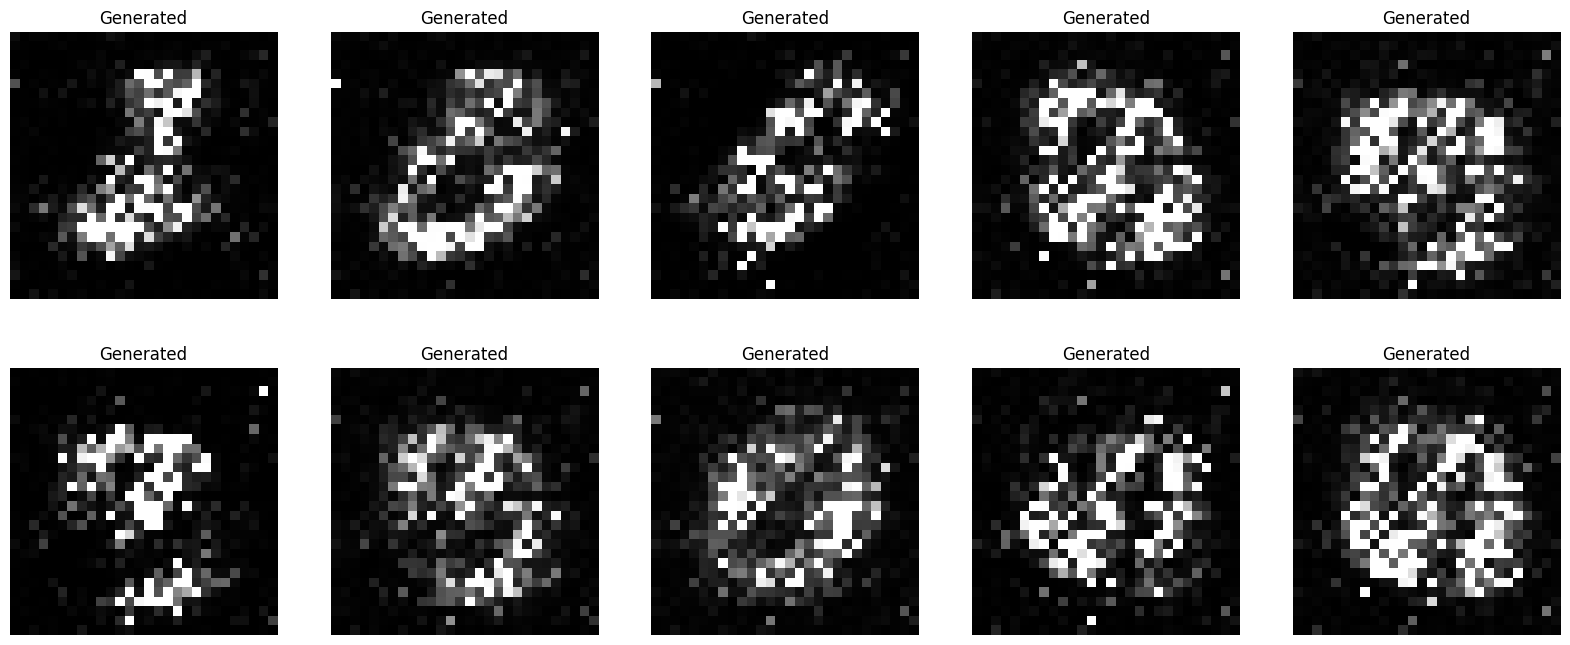

Epoch [97/100]
Loss D 0.2398
Loss G 3.0400


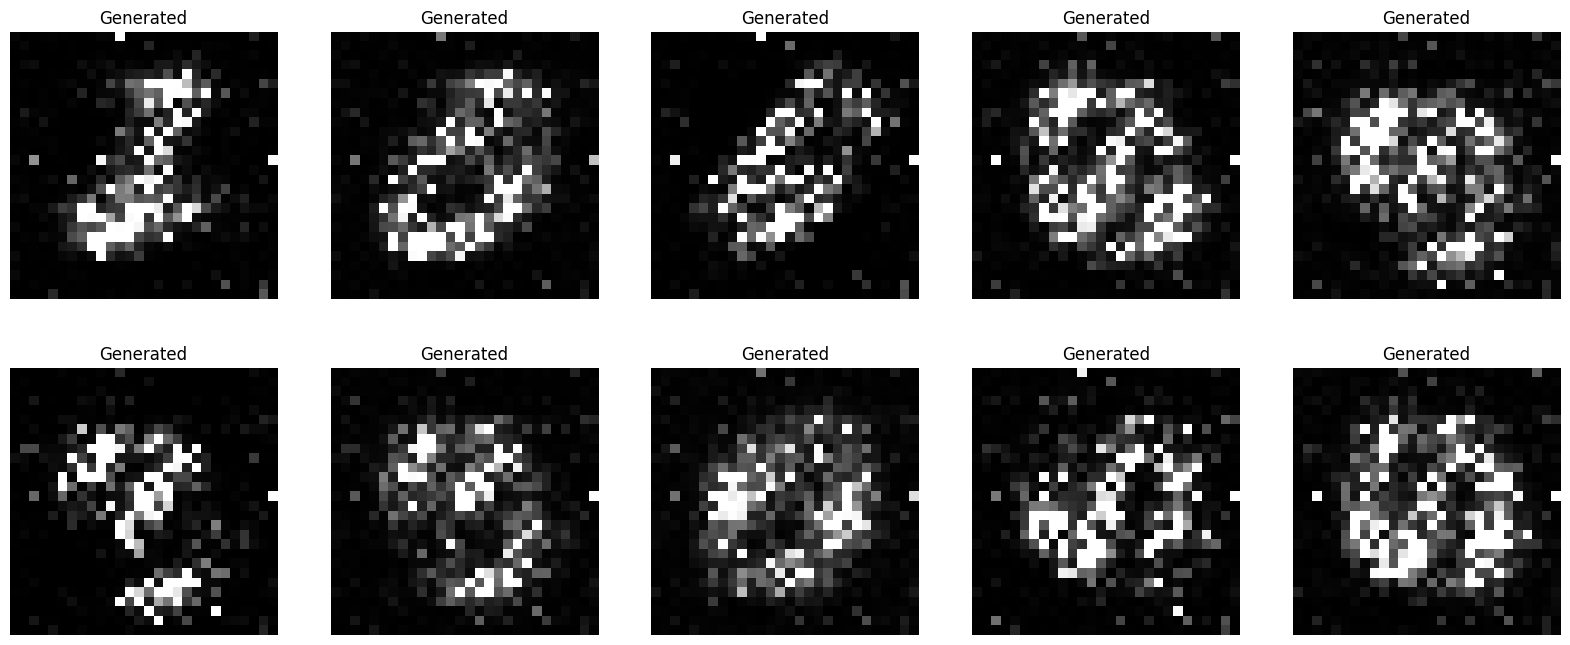

Epoch [98/100]
Loss D 0.2104
Loss G 3.3558


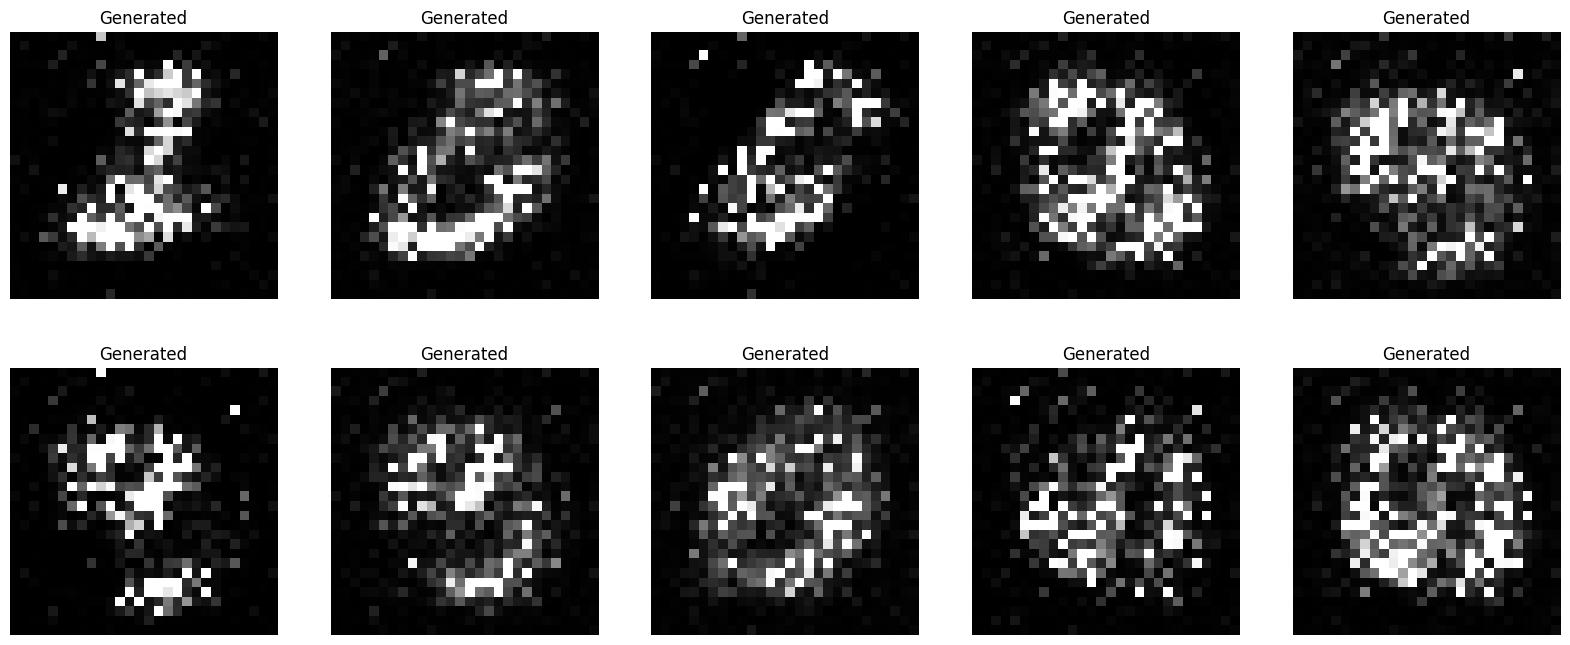

Epoch [99/100]
Loss D 0.2229
Loss G 2.8553


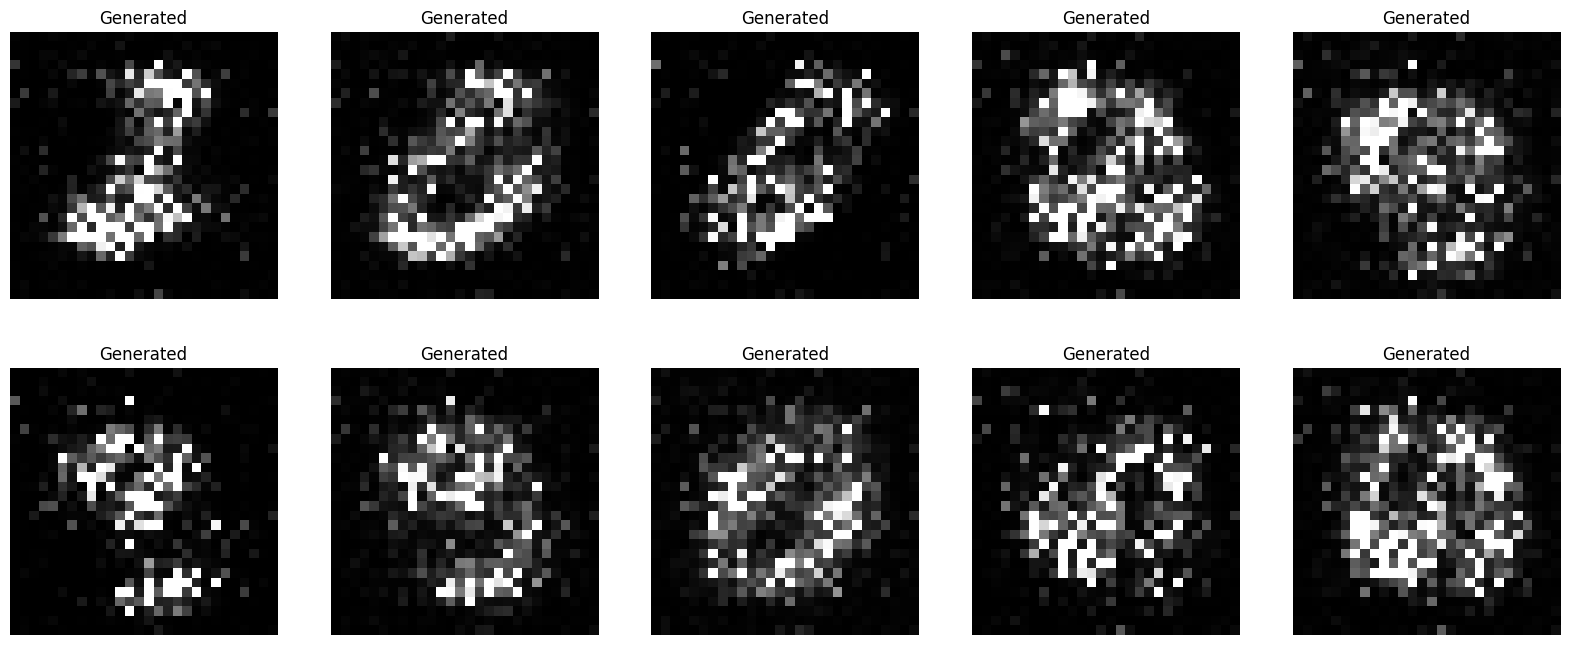

Epoch [100/100]
Loss D 0.3334
Loss G 2.4545


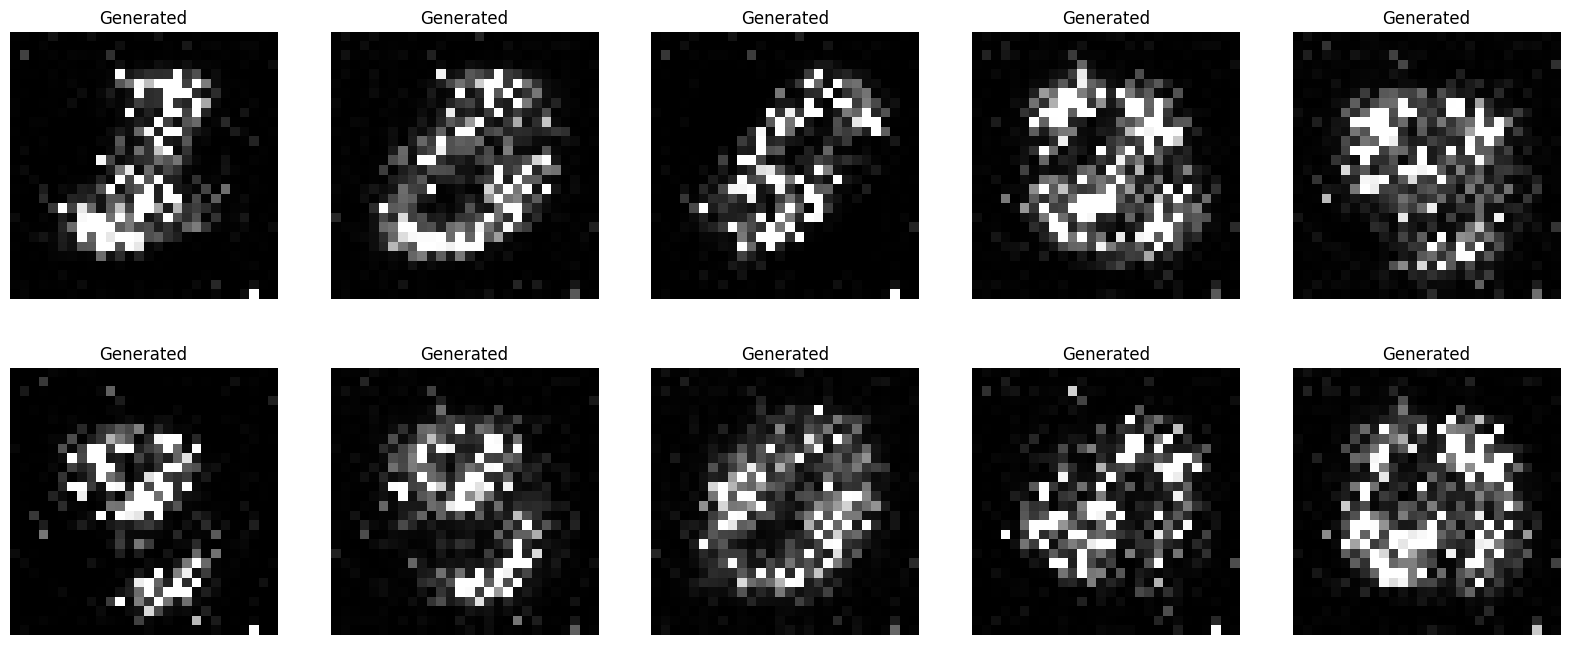

In [9]:
fixed_noise = torch.randn(batch_size, z_dim).to(device)
for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(loader):
        real = real.view(-1, 784).to(device)
        batch_size = real.shape[0]
        
        ### Train Discriminator: max log(D(real)) + log(1-D(G(z))
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = gen(noise)
        disc_real = disc(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        lossD = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward(retain_graph=True)
        opt_disc.step()
        
        ### Train Generator min log(1-D(G(z))) <-> max log(D(G(z)))
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()
        
        
    print(f"Epoch [{epoch+1}/{num_epochs}]\nLoss D {lossD:.4f}\nLoss G {lossG:.4f}")
    real = real.view(-1, 1, 28, 28)
    with torch.no_grad():
        fake = gen(fixed_noise)
    fake = fake.view(-1, 1, 28, 28)

            # Display 10 images
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    for i in range(10):
        axes[i // 5, i % 5].imshow(torch.mean(fake, dim=1).detach().cpu().numpy()[i], cmap='gray')
        axes[i // 5, i % 5].set_title('Generated')
        axes[i // 5, i % 5].axis('off')

    plt.pause(0.01)
    plt.show()